## Arm Simulation

In [1]:
import sys
sys.path.append('../_utils/')

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib inline
from JSAnimation.IPython_display import display_animation
import Box2D as box2d
import Box2DWorld

nparts = 2
Box2DWorld.Arm(position=(0,0),nparts=nparts)   # Box2DWorld.arm for the update in the animateWorld

<Box2DWorld.Arm instance at 0x1064383f8>

### Motor Babbling Learning with LWPR

In [2]:
from Box2DWorld import TIME_STEP, vel_iters, pos_iters
from lwpr import LWPR

model = LWPR(2, nparts)                 # input, outputs 
print model
model.init_D = 20 * np.eye(2)
model.update_D = True
model.init_alpha = 40 * np.eye(2)
model.meta = False

for i in range(5000):
    t = [2*num-1 for num in np.random.rand(nparts)]
    Box2DWorld.arm.gotoTargetJoints(t)    
    endpos = np.asarray(Box2DWorld.arm.getFinalPos())
    jangles =  np.asarray(Box2DWorld.arm.getJointAngles())
    jangles_lwpr = model.update(endpos,jangles)


LWPR model
          nIn : 2
         nOut : 2
       n_data : 0
      penalty : 1e-06
      init_S2 : 1e-10
      w_prune : 1
        w_gen : 0.1
    diag_only : True
     update_D : True
         meta : False
    meta_rate : 250
  init_lambda : 0.999
 final_lambda : 0.99999
   tau_lambda : 0.9999
add_threshold : 0.5
       kernel : Gaussian
(+ norm_in, norm_out, init_M, init_D, init_alpha, mean_x, var_x, num_rfs)



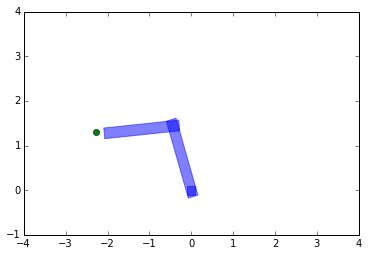

In [27]:
p = np.array([ 6.0*np.random.rand()-3.0,  3.3*np.random.rand()])
lwpr_pred = model.predict_conf(p)  # nice use of the confidence interval

fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-1, 4))

if(sum(lwpr_pred[1]) < 1):
    Box2DWorld.arm.gotoTargetJoints(lwpr_pred[0])    
    endpos = Box2DWorld.arm.getFinalPos()
    ax.plot(*p, marker='o', color='green')
    Box2DWorld.plotWorld(ax)
else:
    ax.plot(*p, marker='o', color='red')

plt.show()

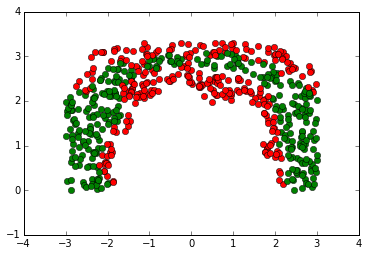

In [8]:
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-1, 4))
for i in range(1000):
    p = np.array([ 6.0*np.random.rand()-3.0,  3.3*np.random.rand()])
    lwpr_pred = model.predict_conf(p)  # nice use of the confidence interval
    t = lwpr_pred[0]
    if(sum(lwpr_pred[1]) < 1):
        ax.plot(*p, marker='o', color='green')
    elif(sum(lwpr_pred[1]) < 10):
        ax.plot(*p, marker='o', color='red')

plt.show()

### Animtion of Arm moving


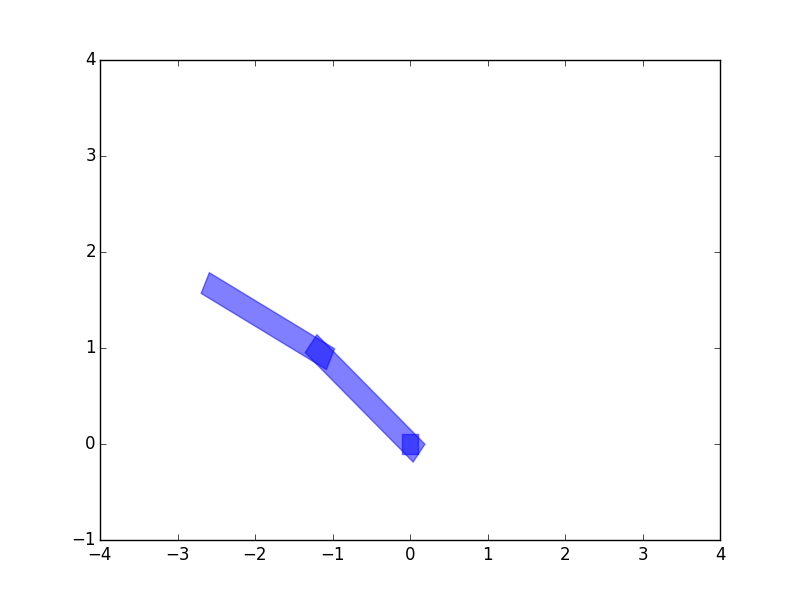
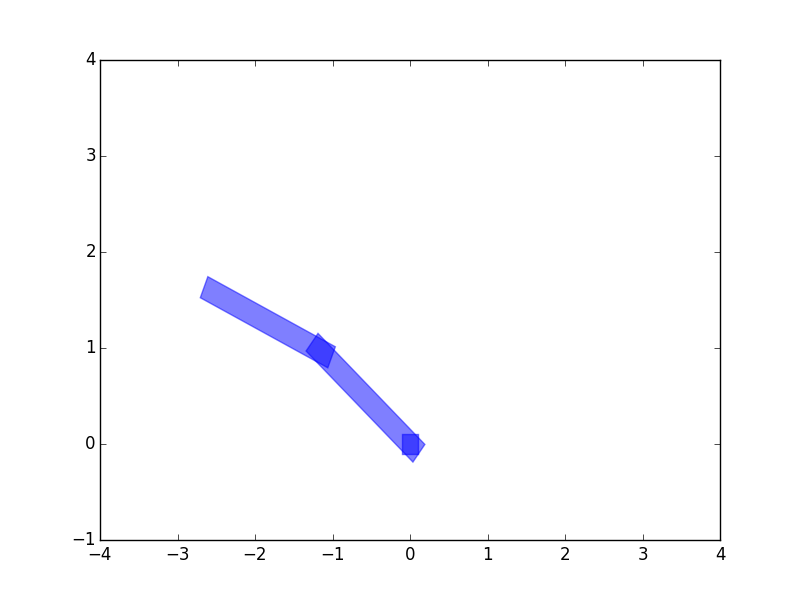
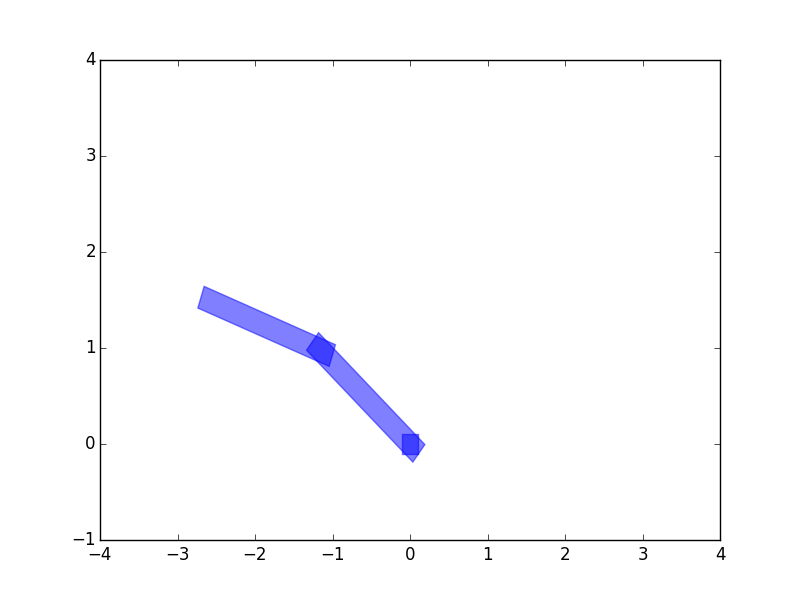
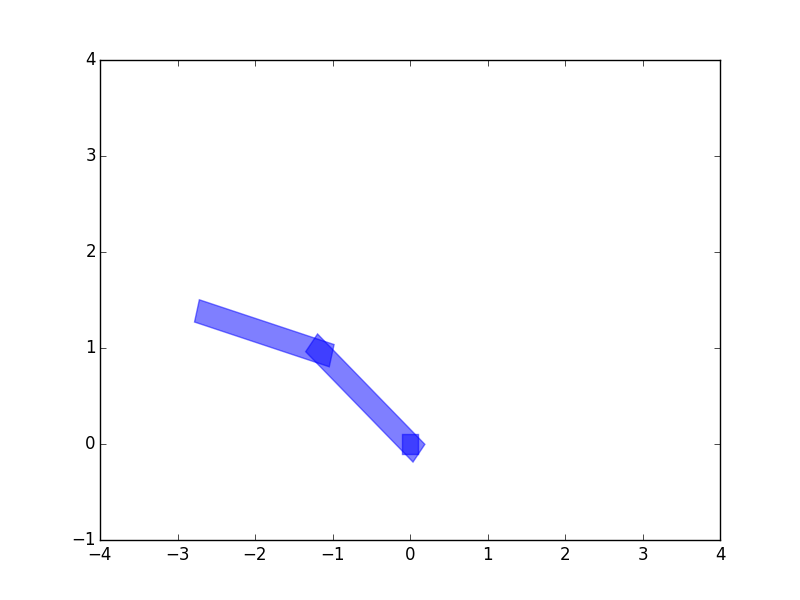
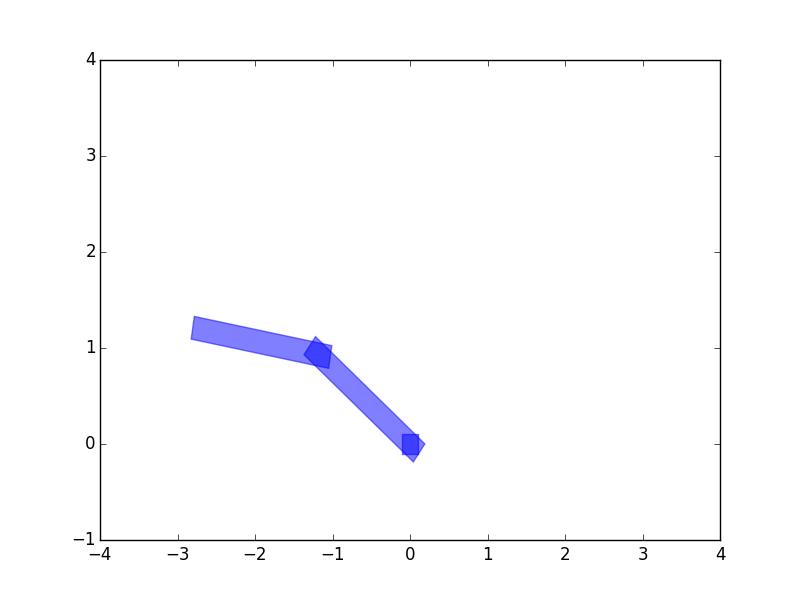
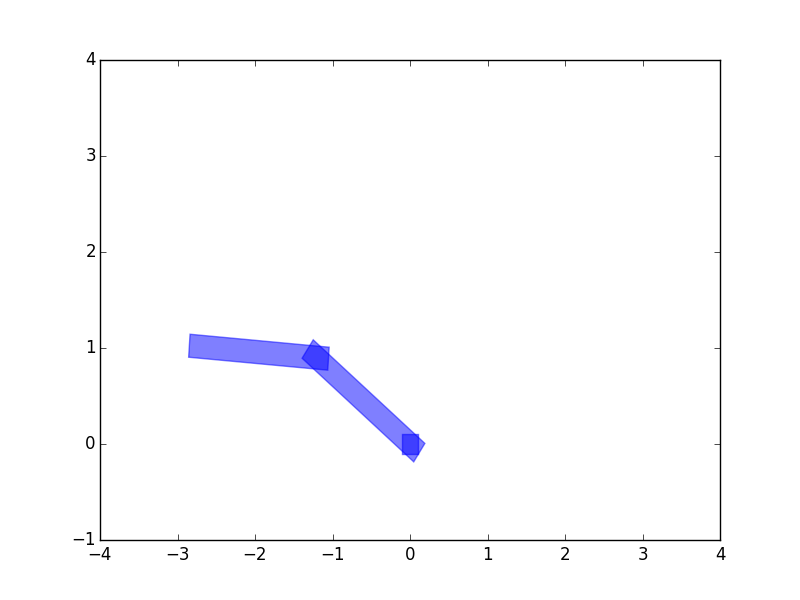
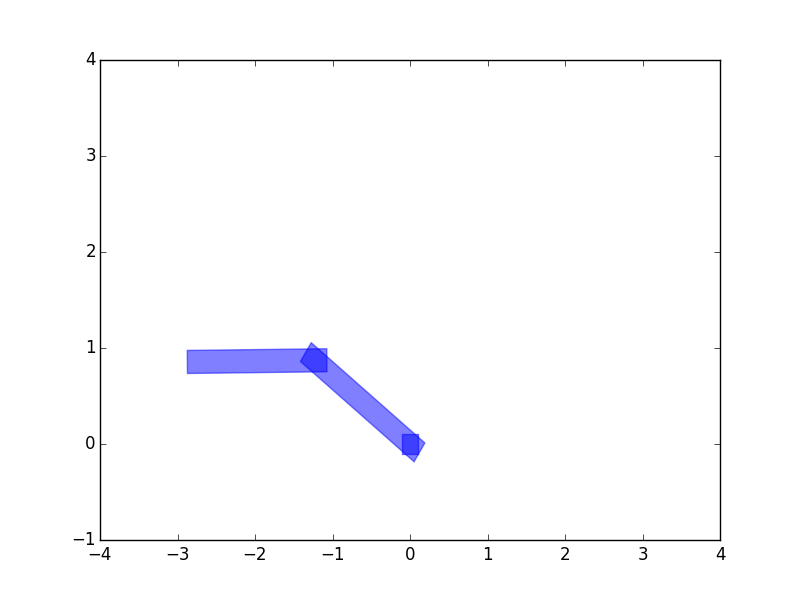
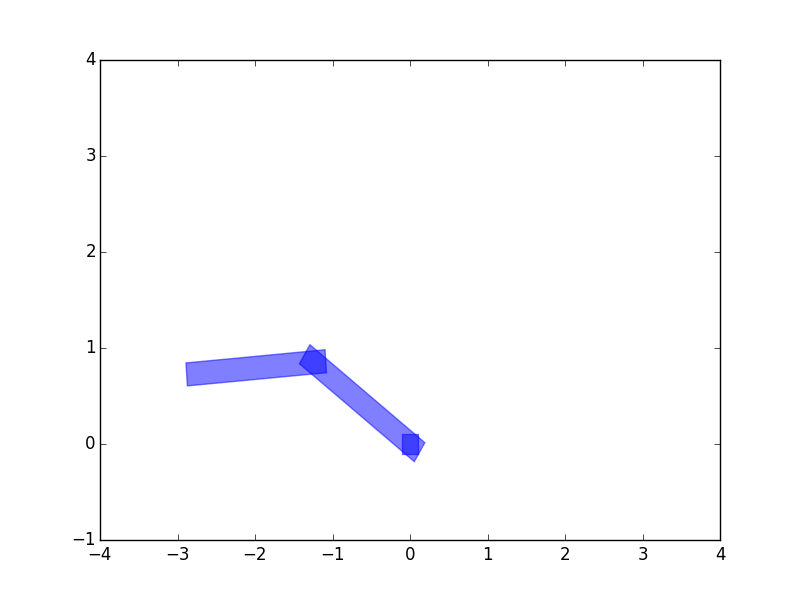
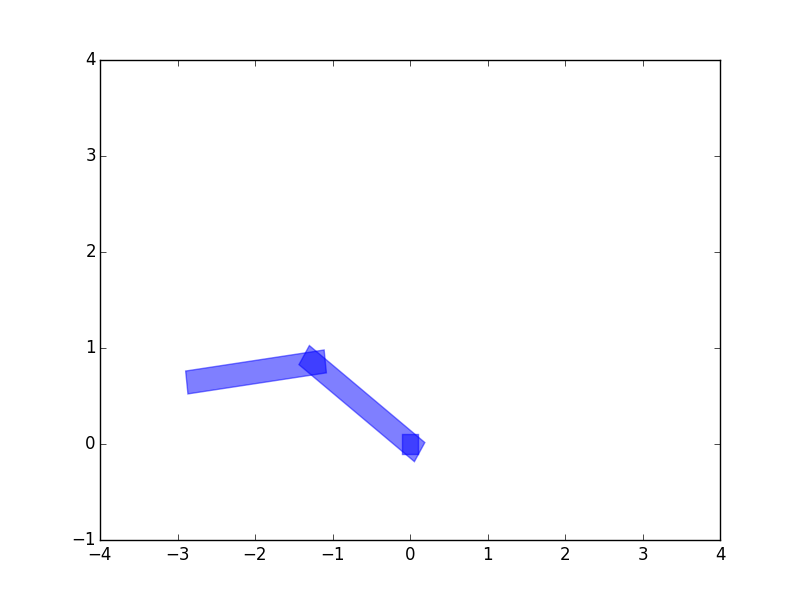
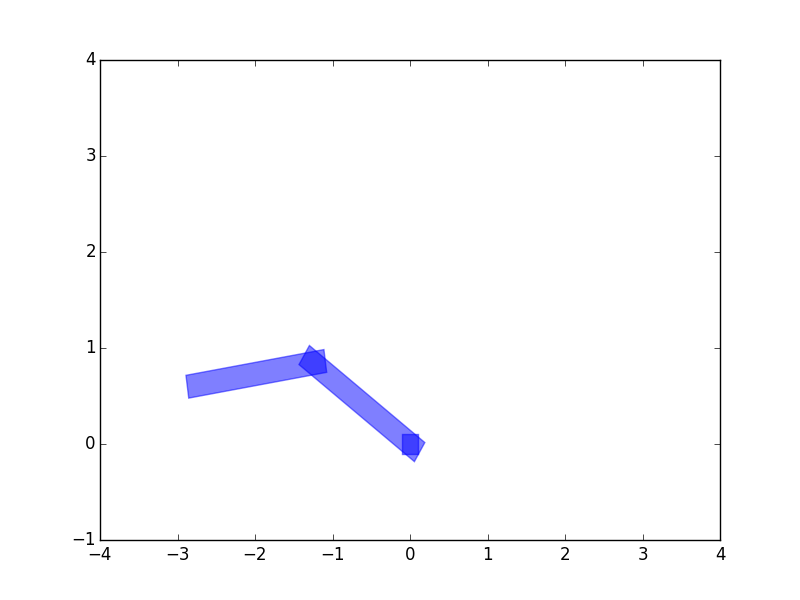
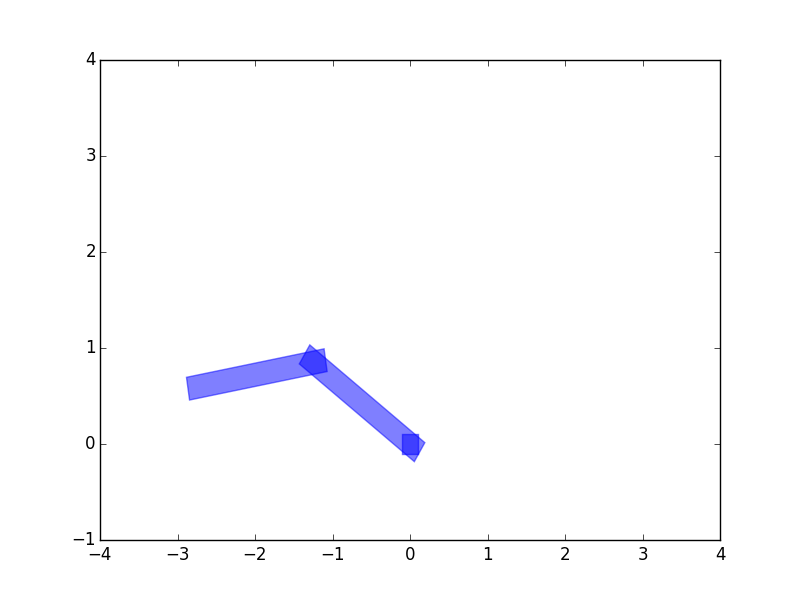
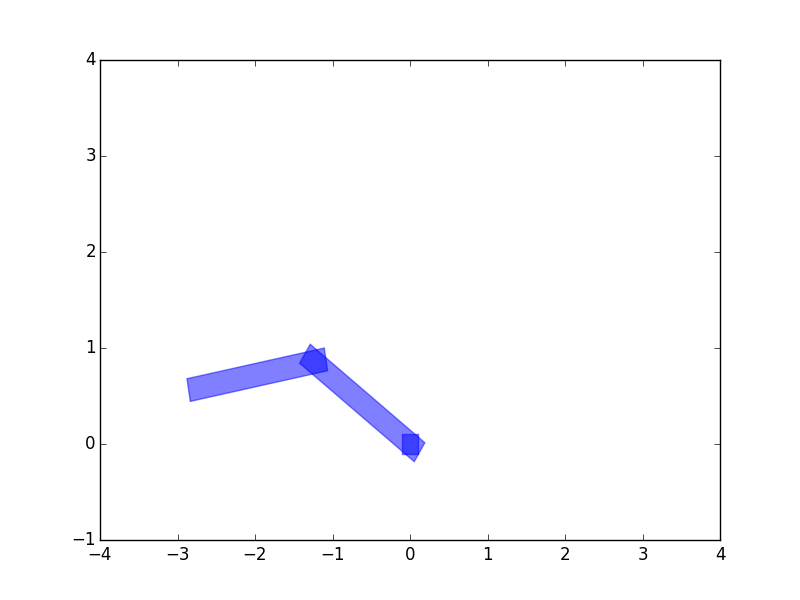
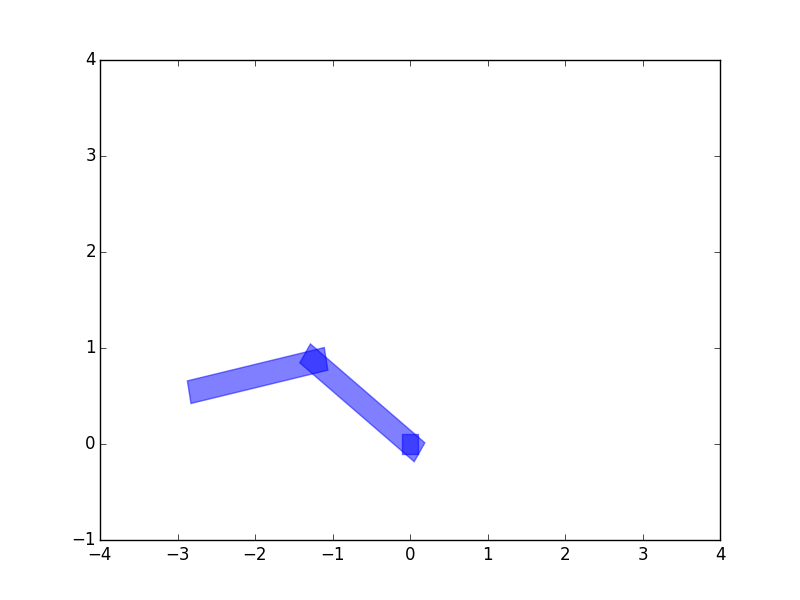
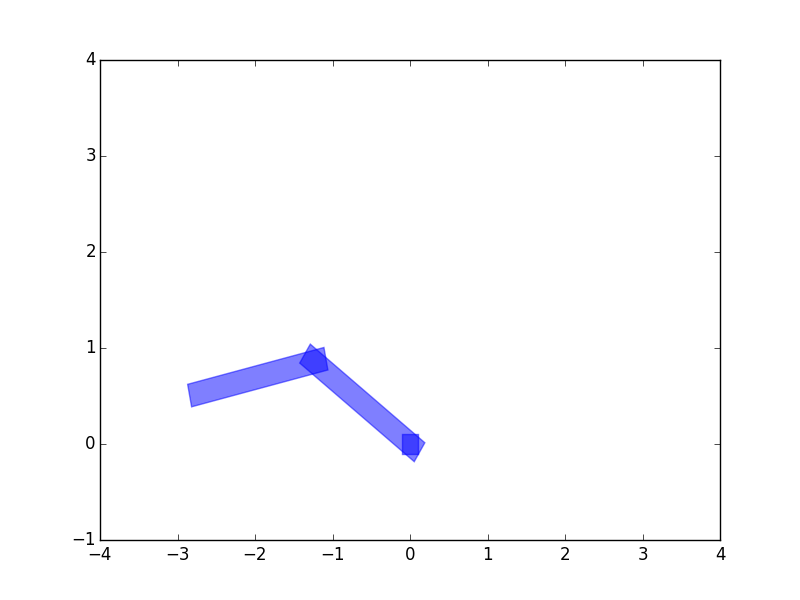
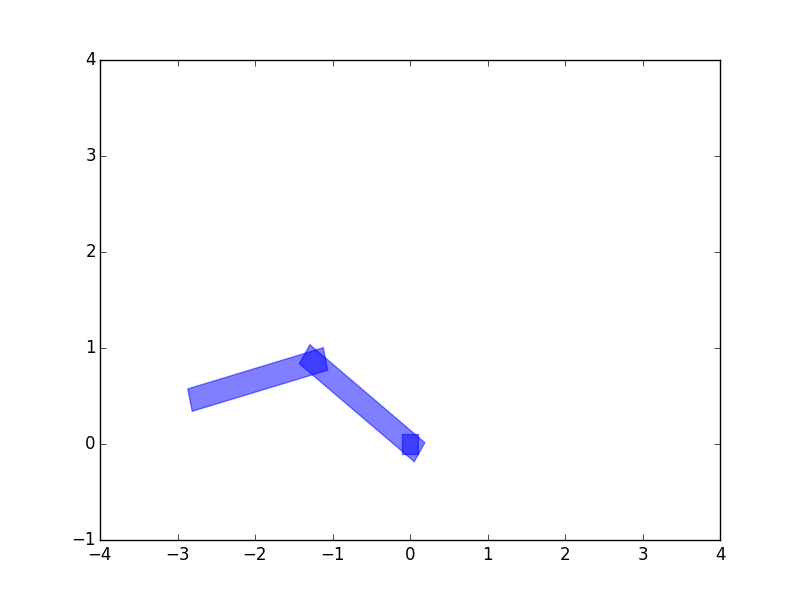
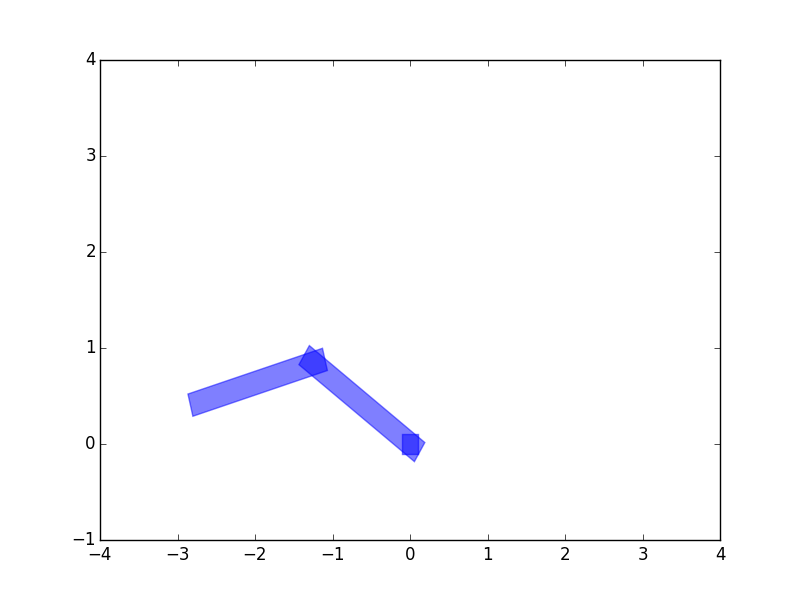
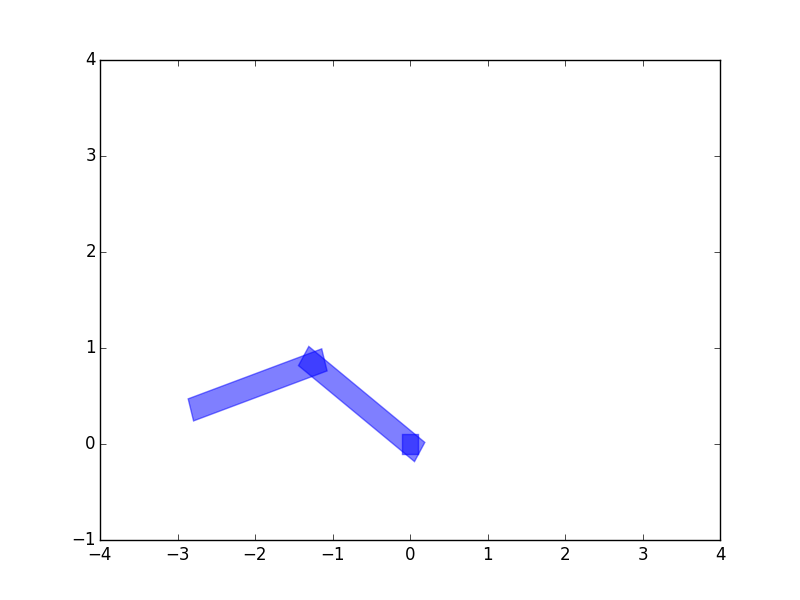
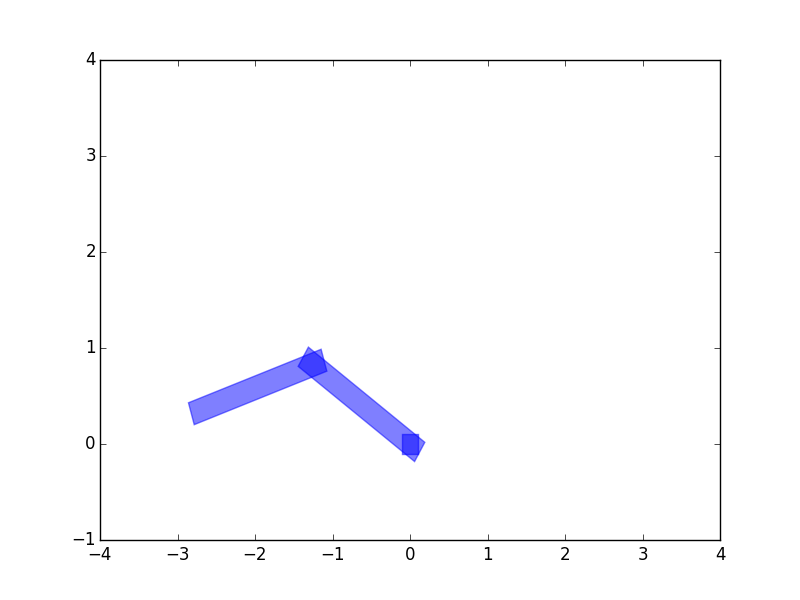
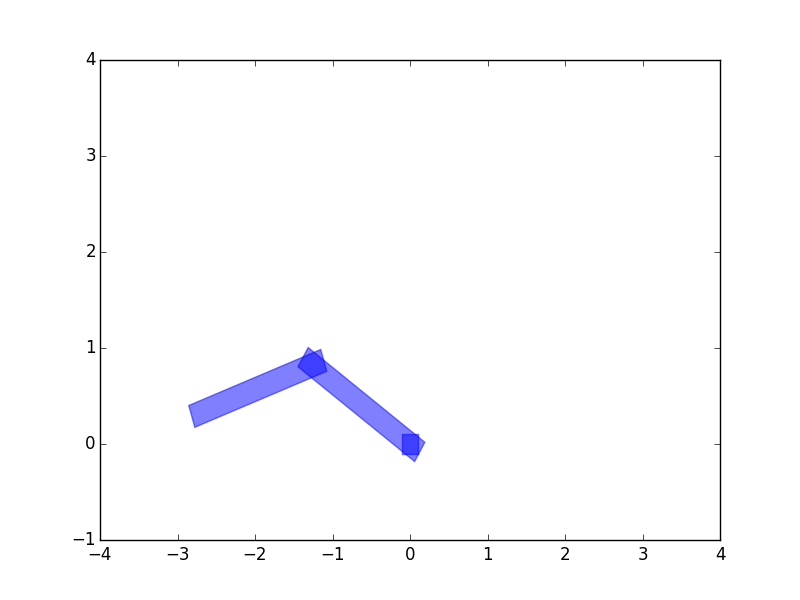
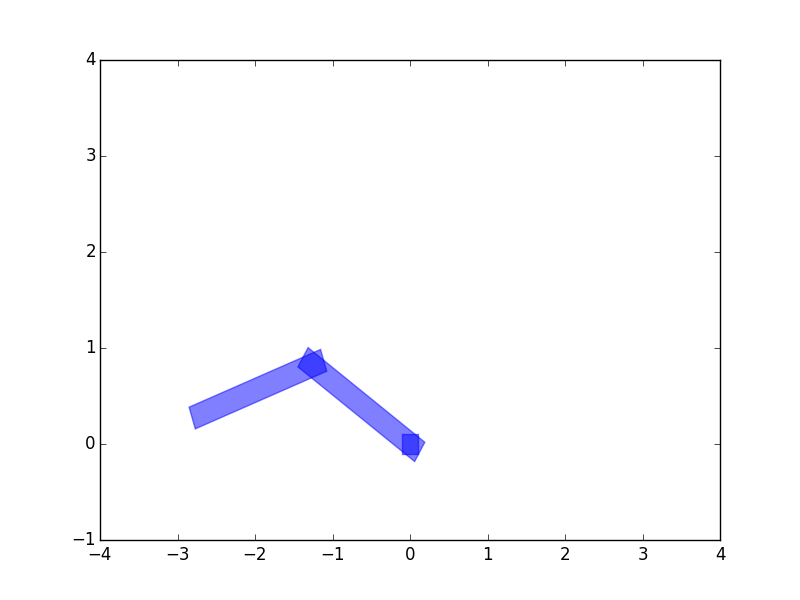
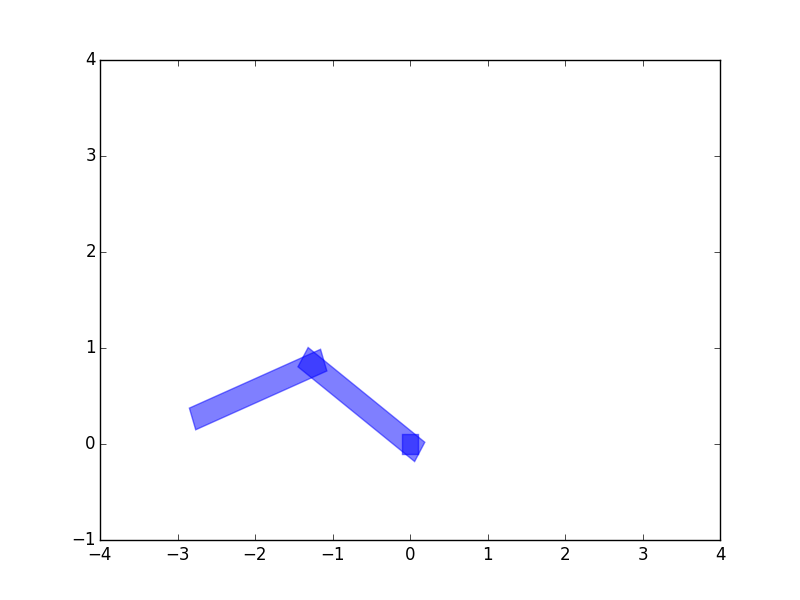
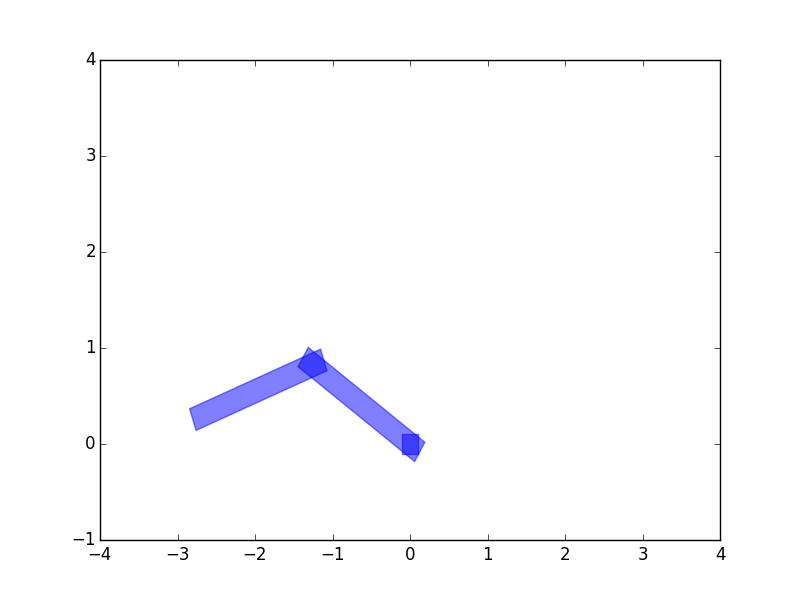
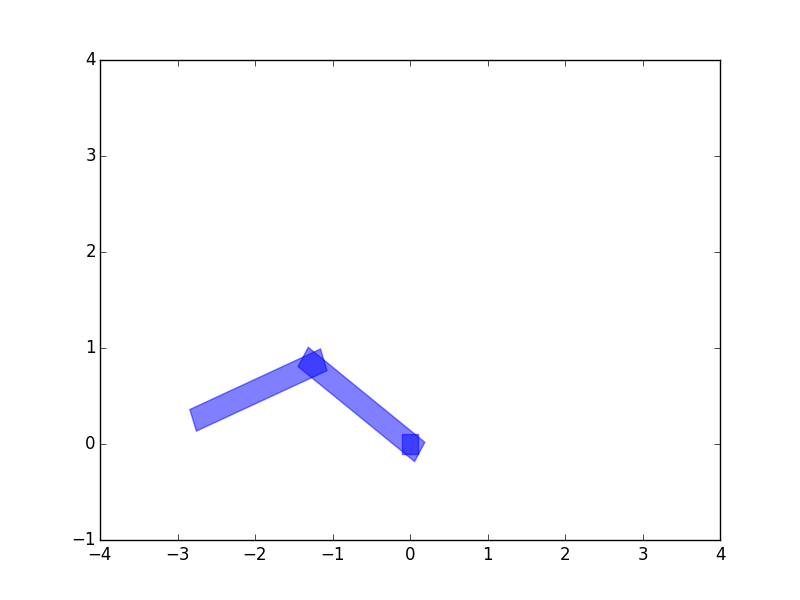
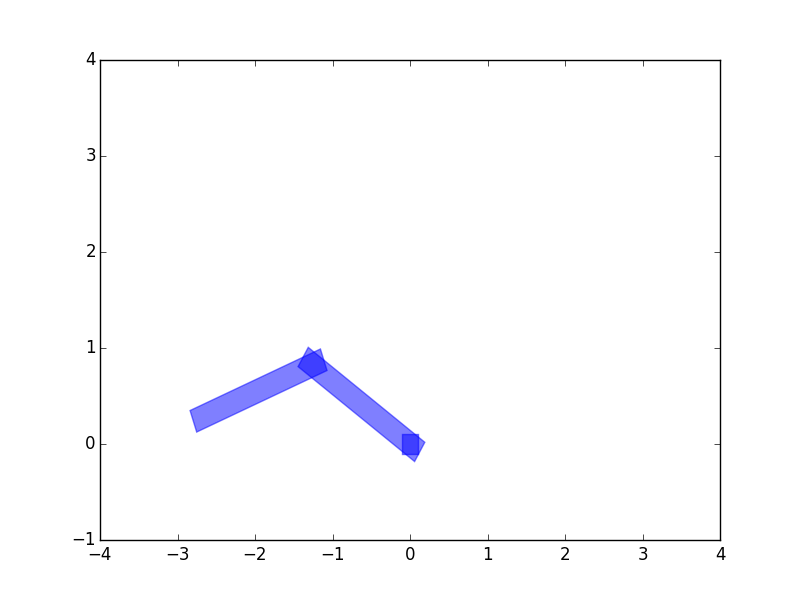
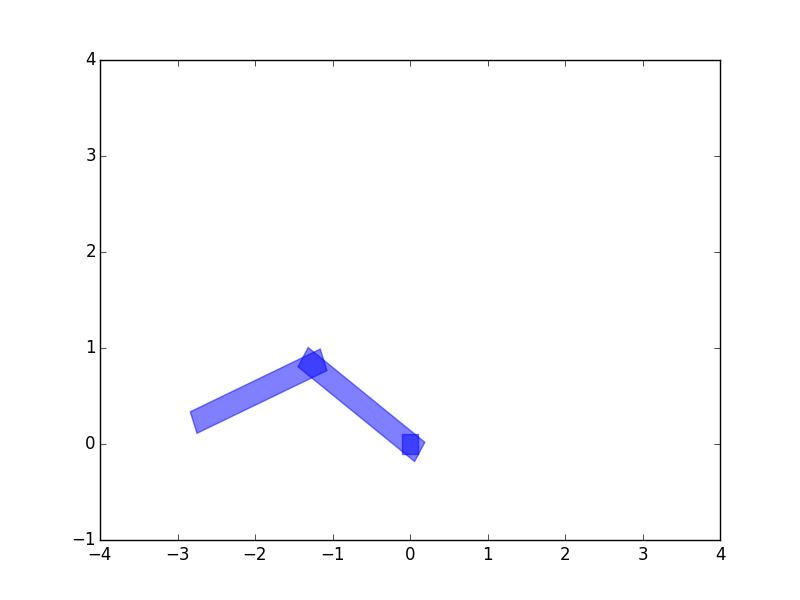
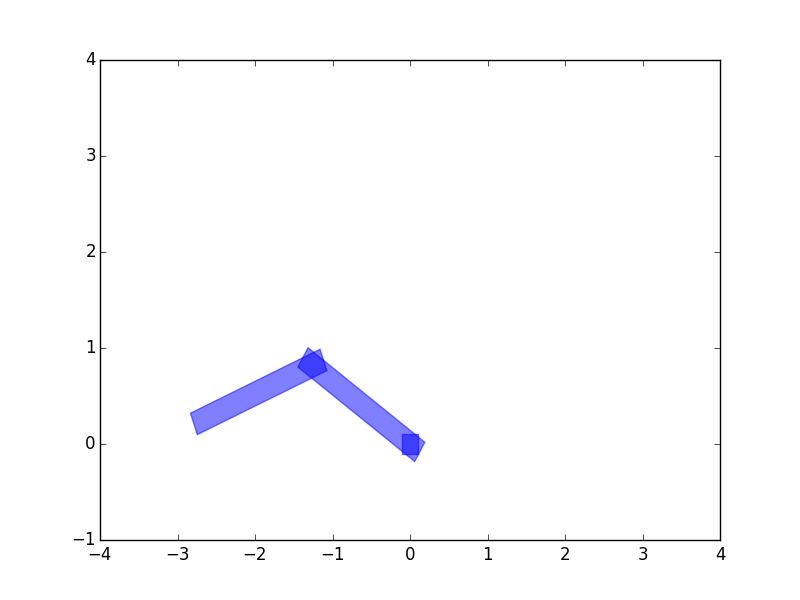
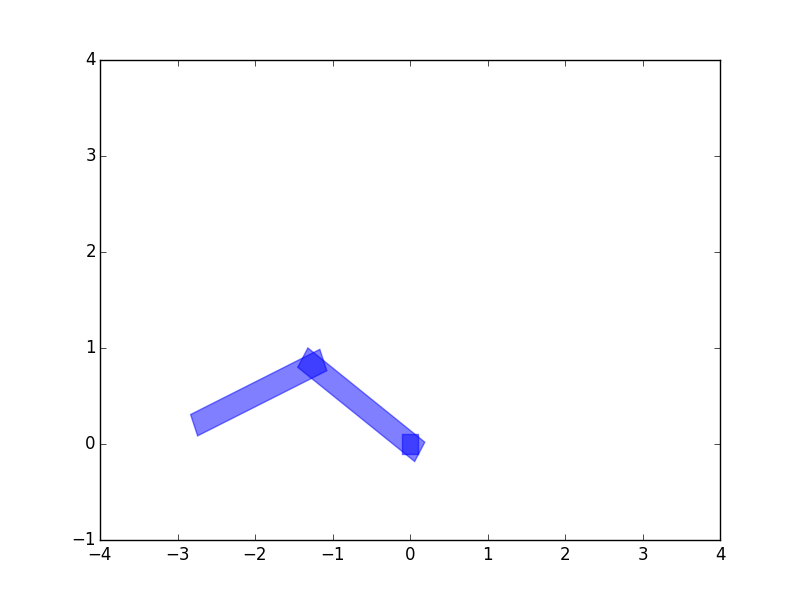
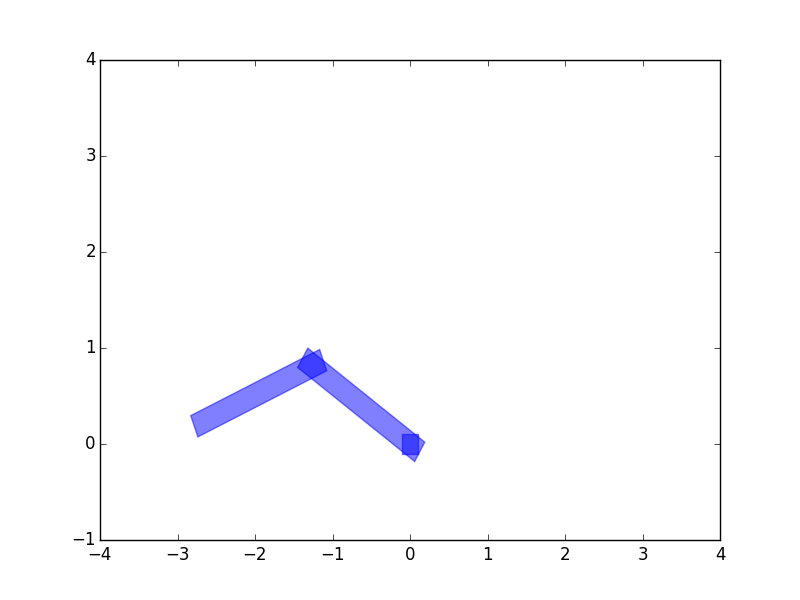
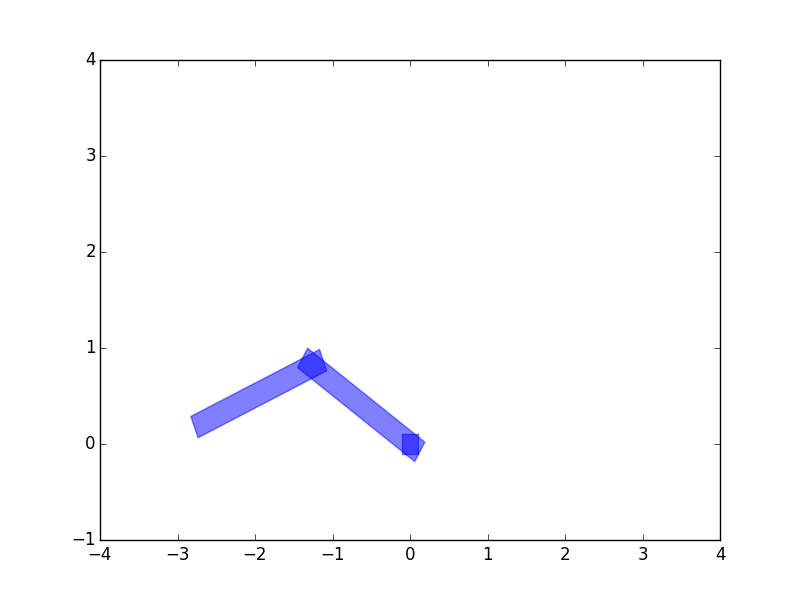
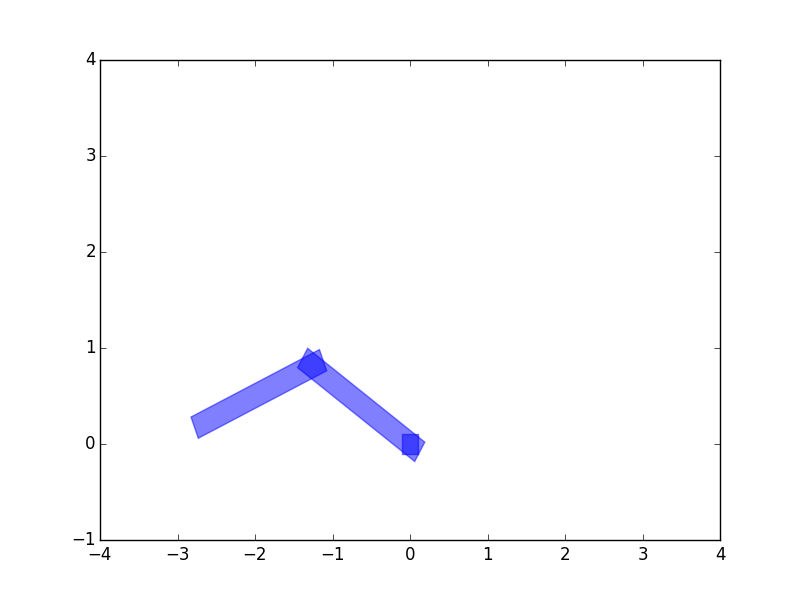
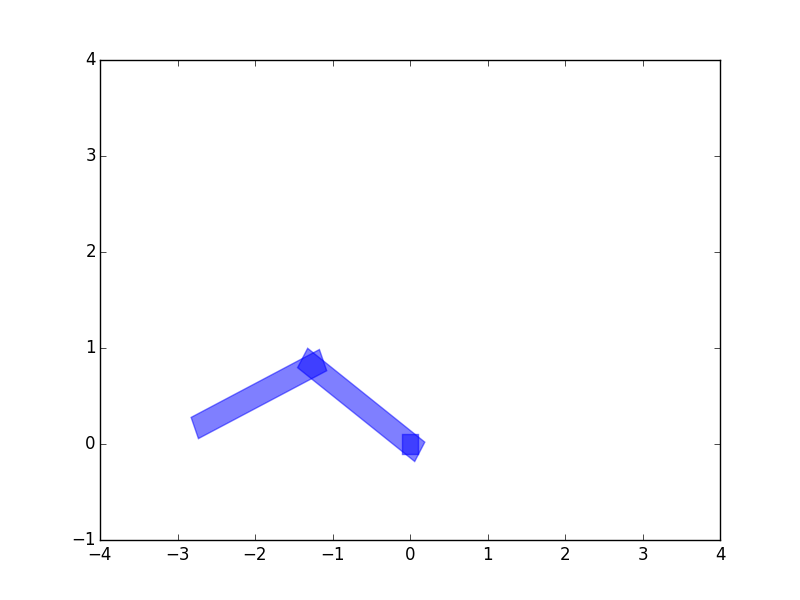
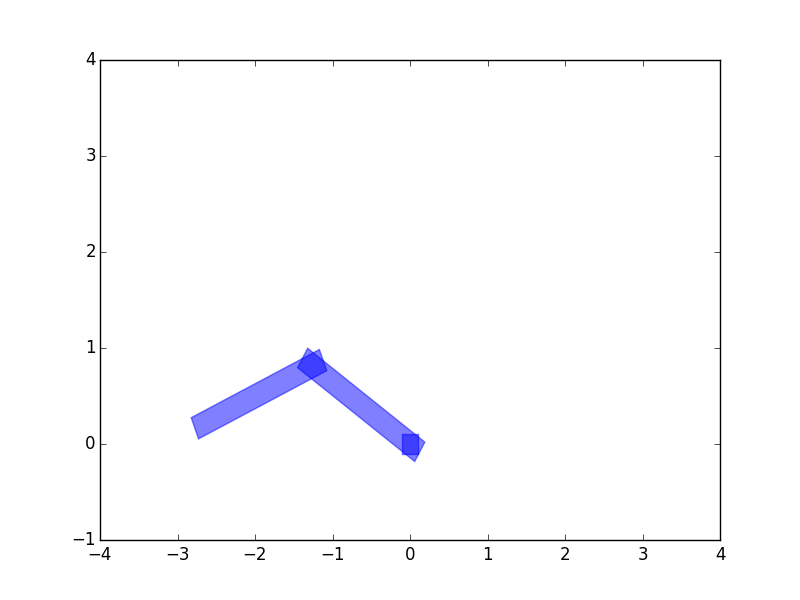
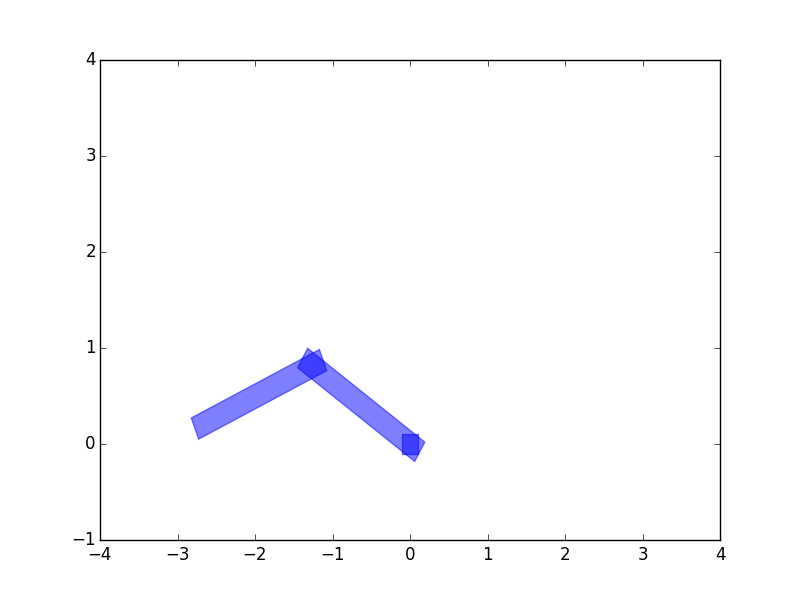
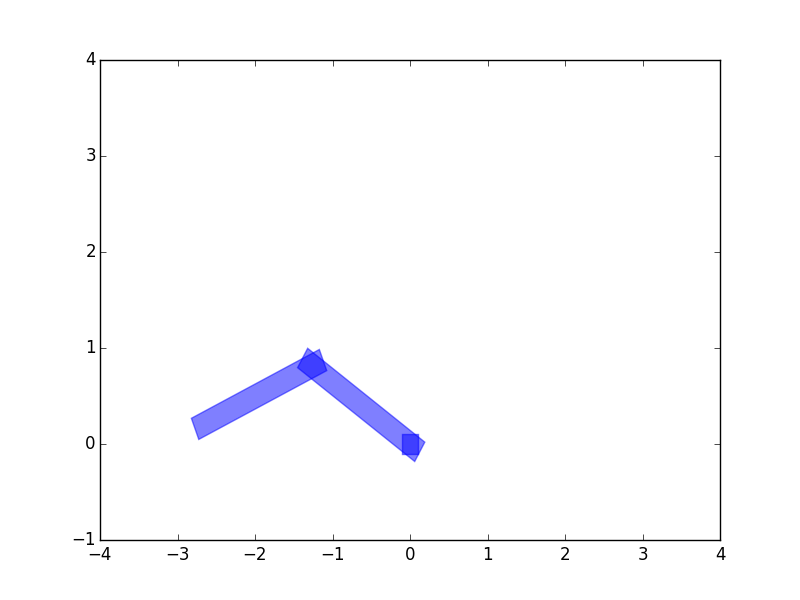
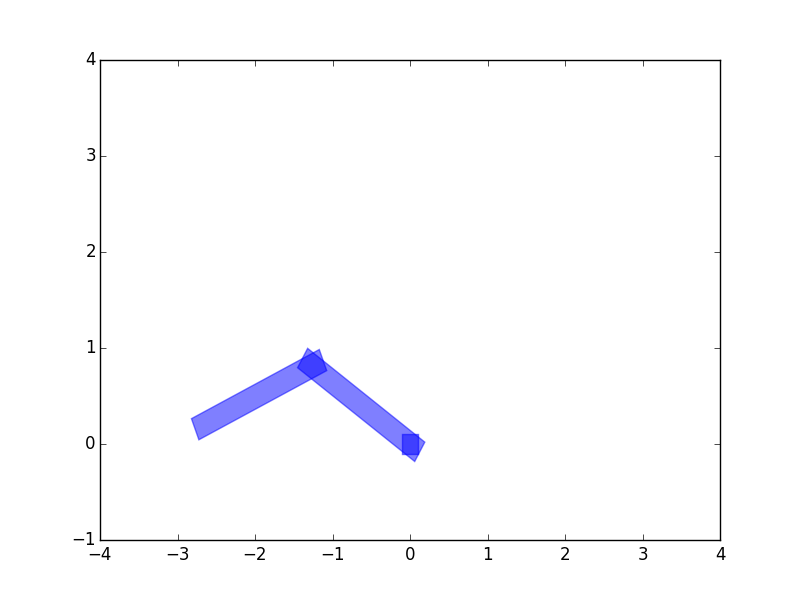
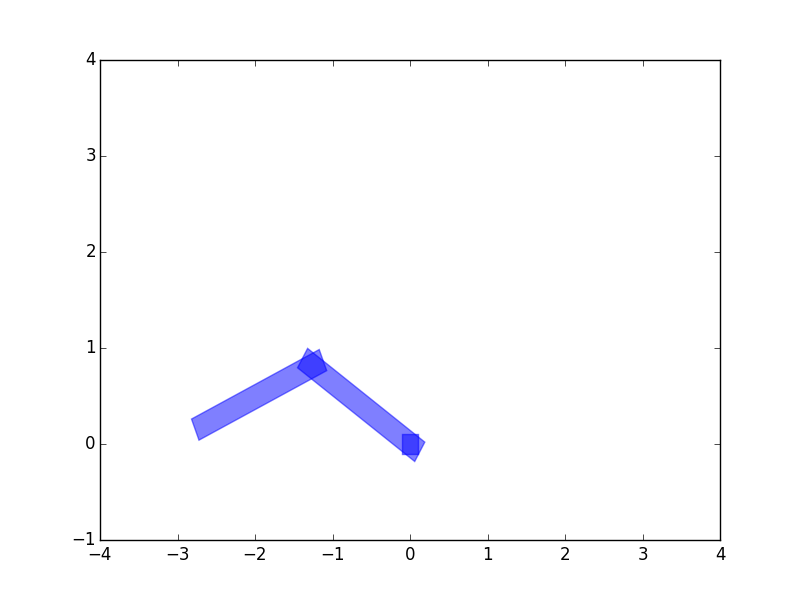
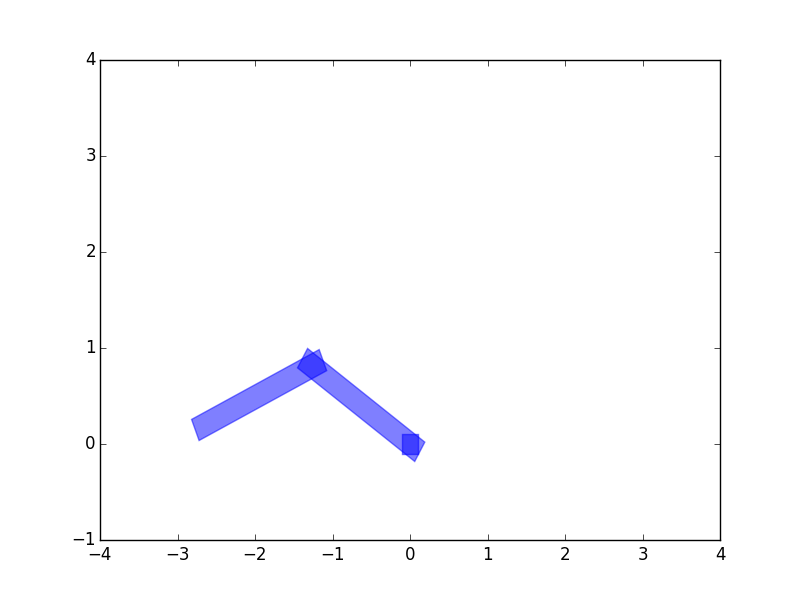
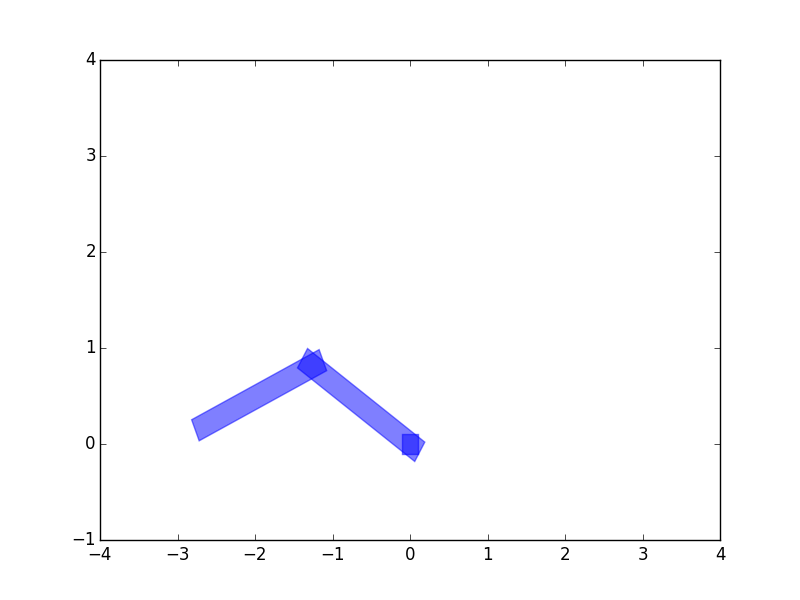
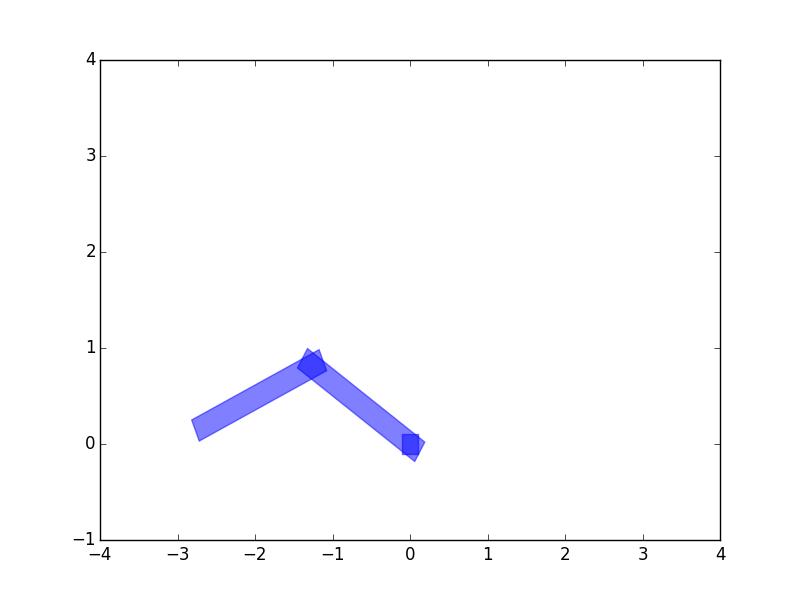
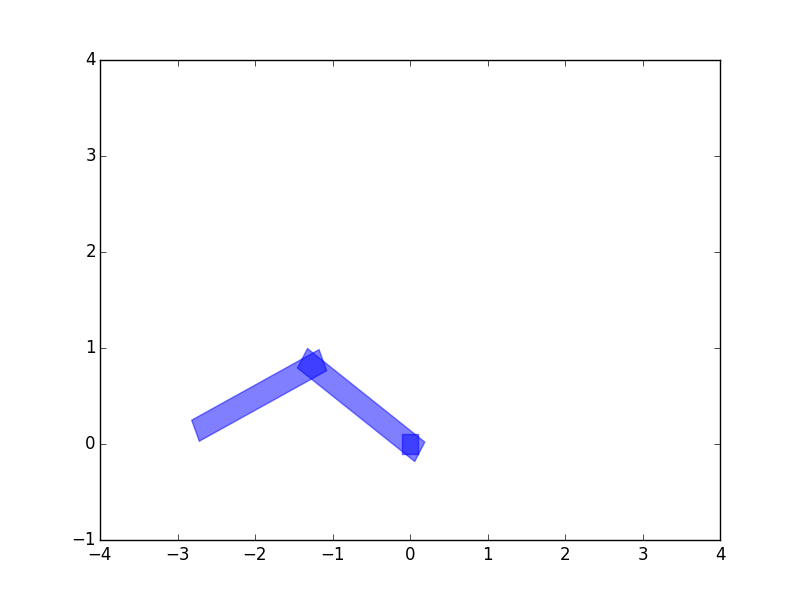
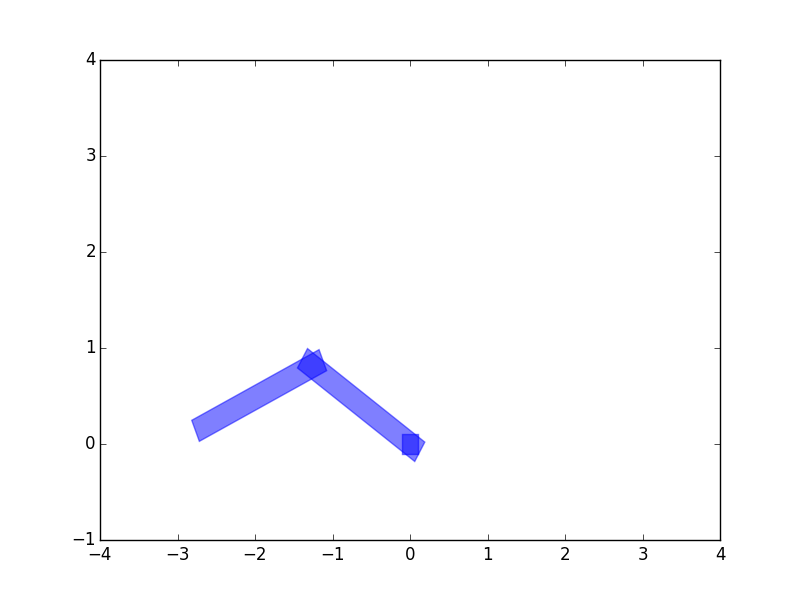
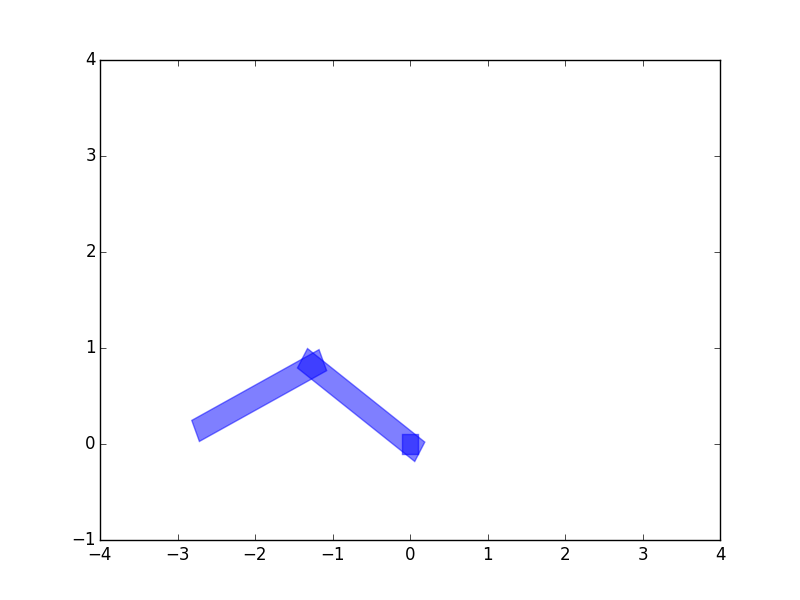
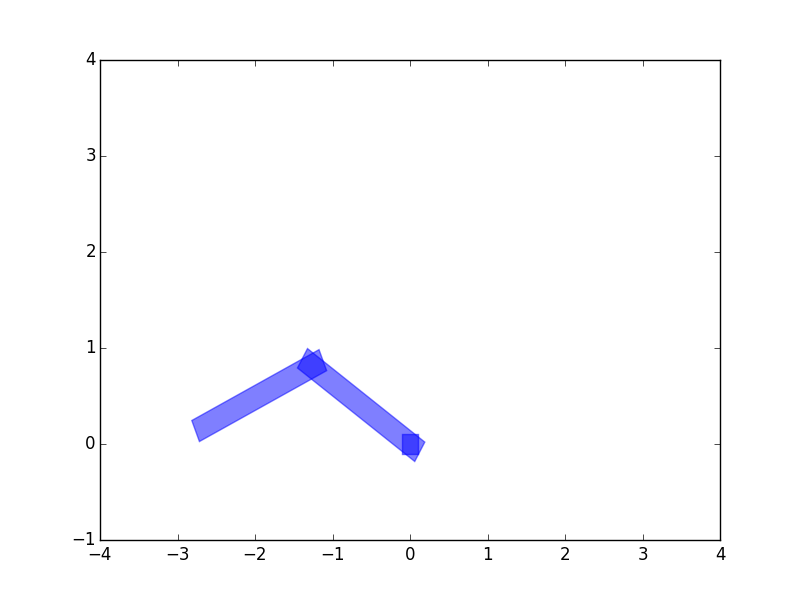
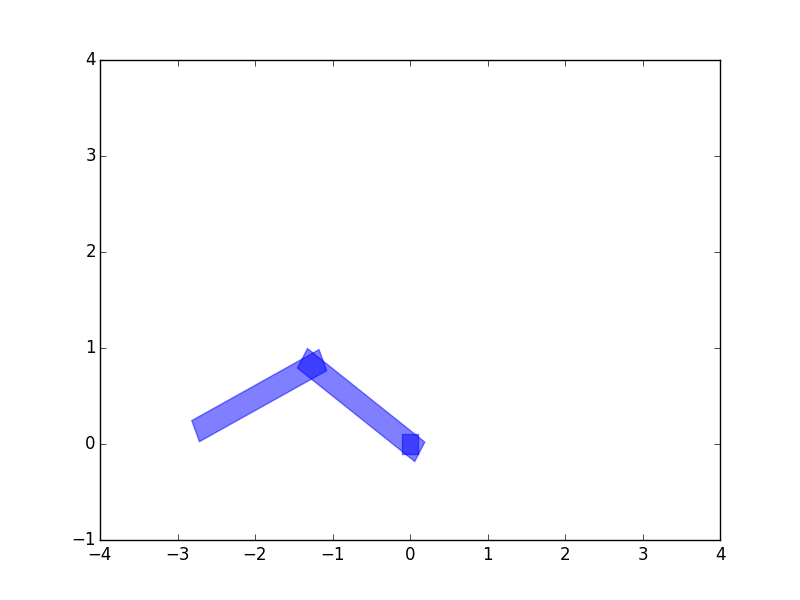
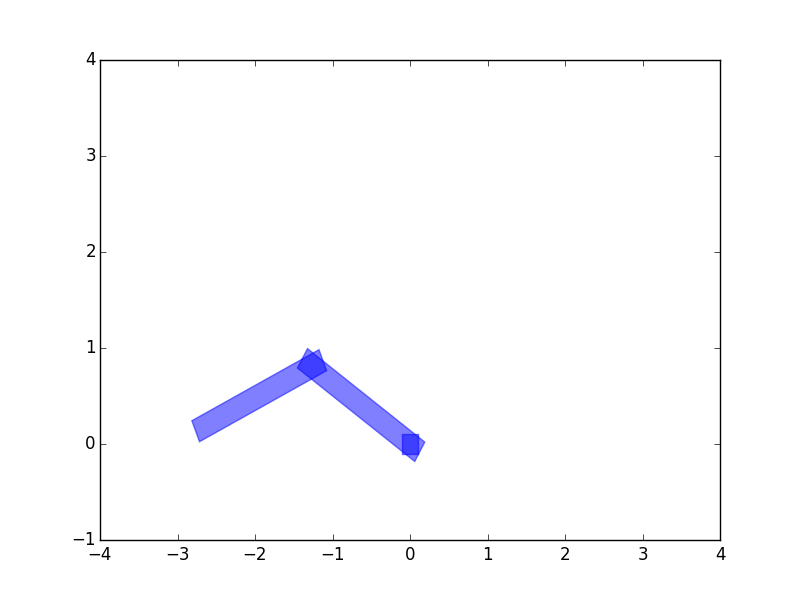
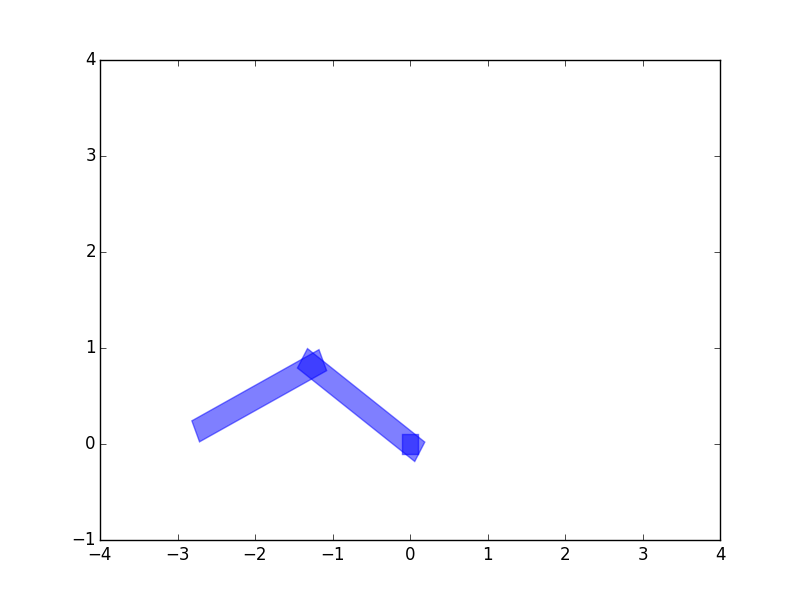
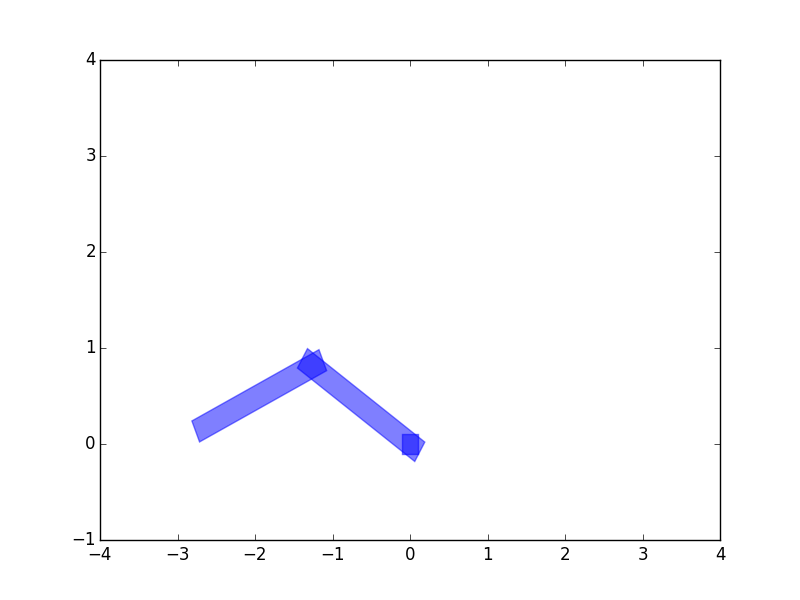
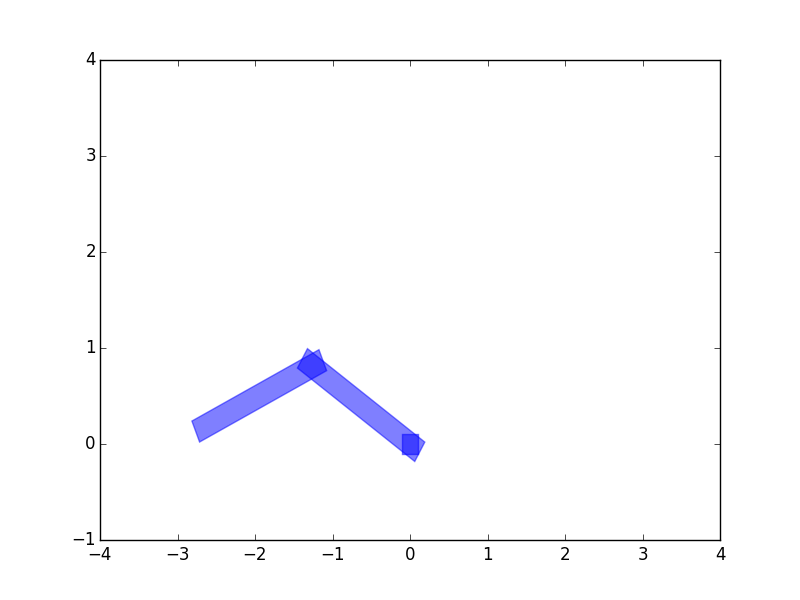
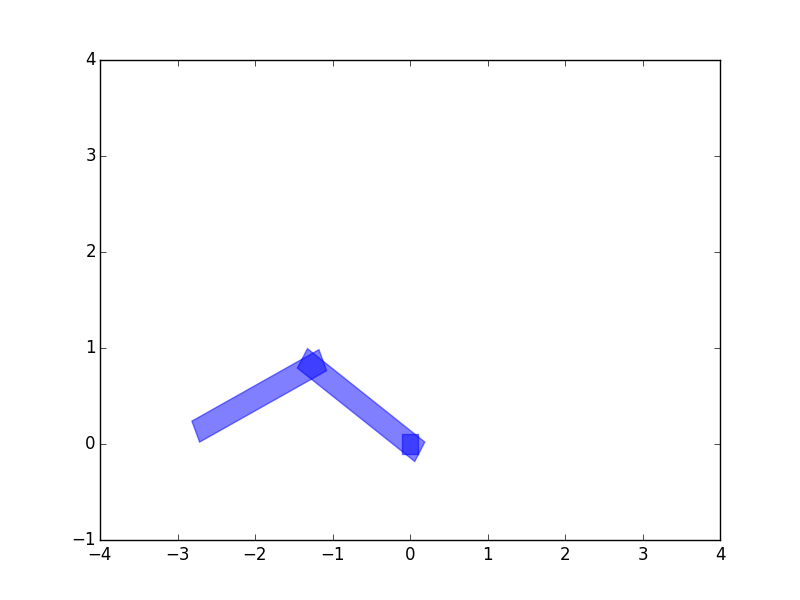
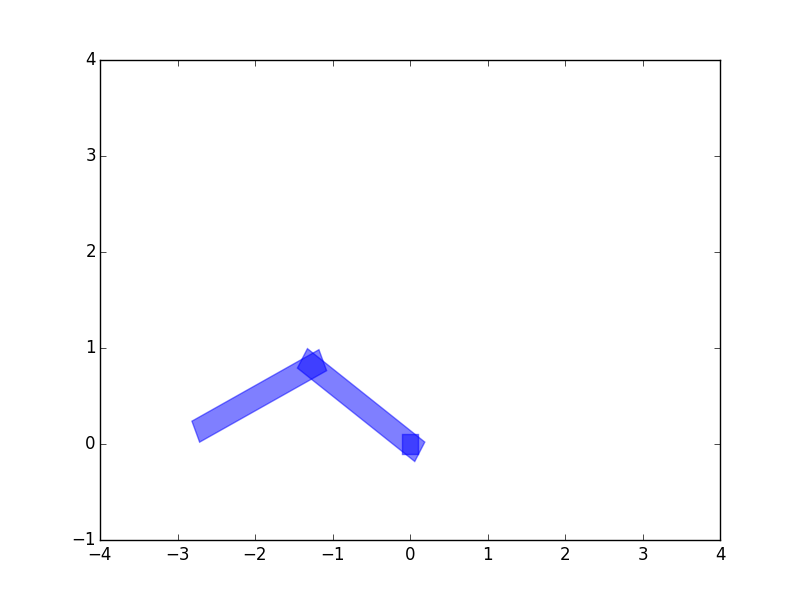
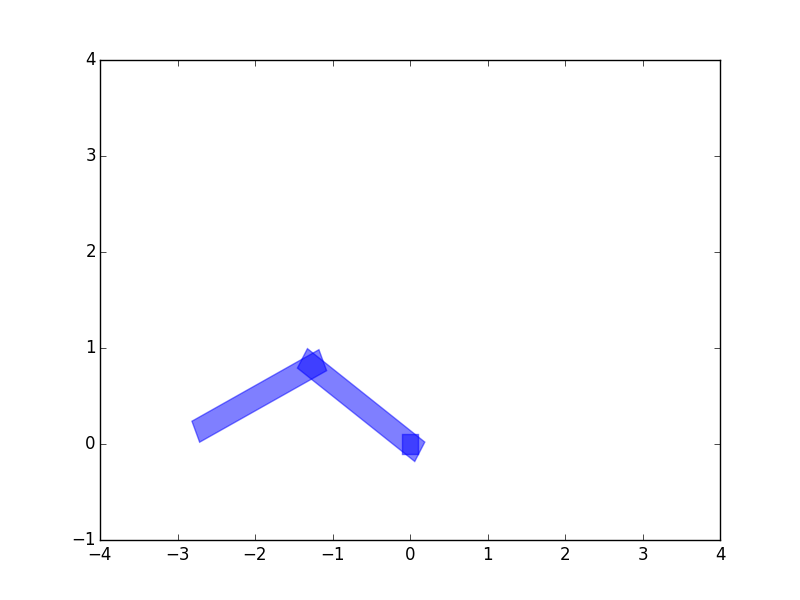
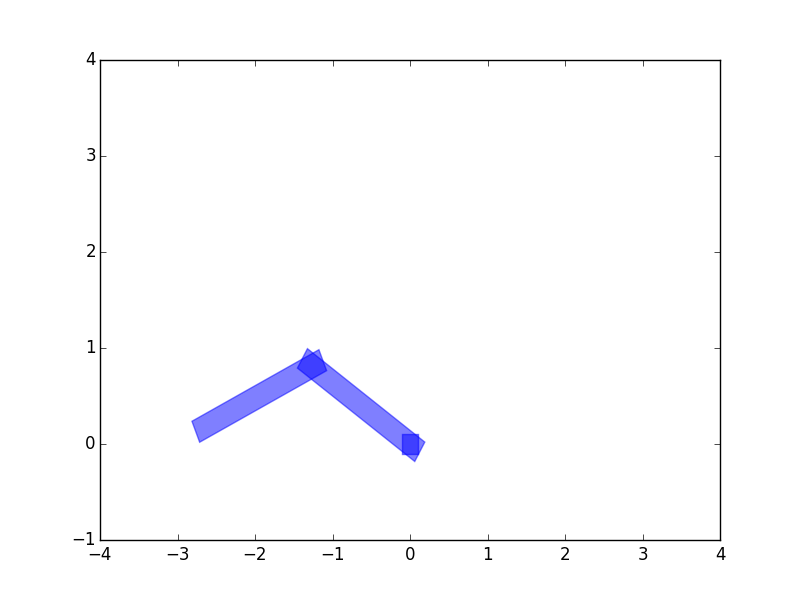
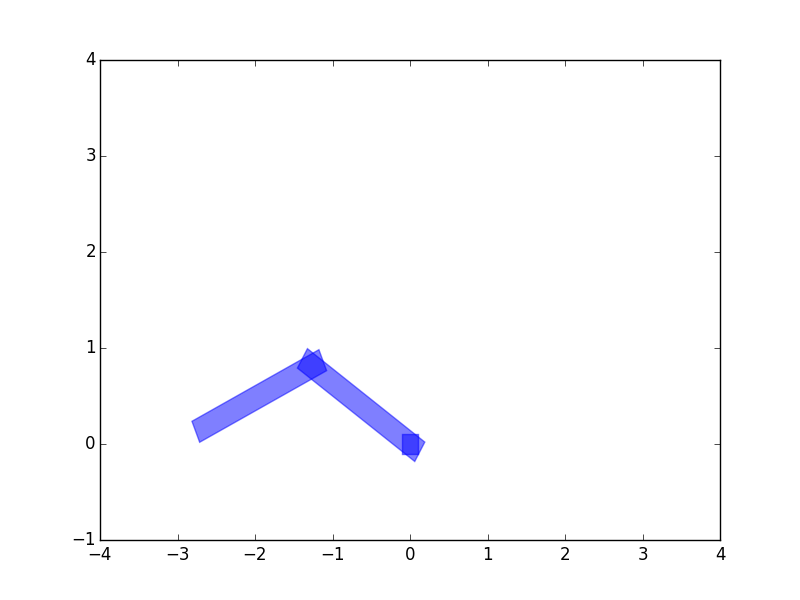
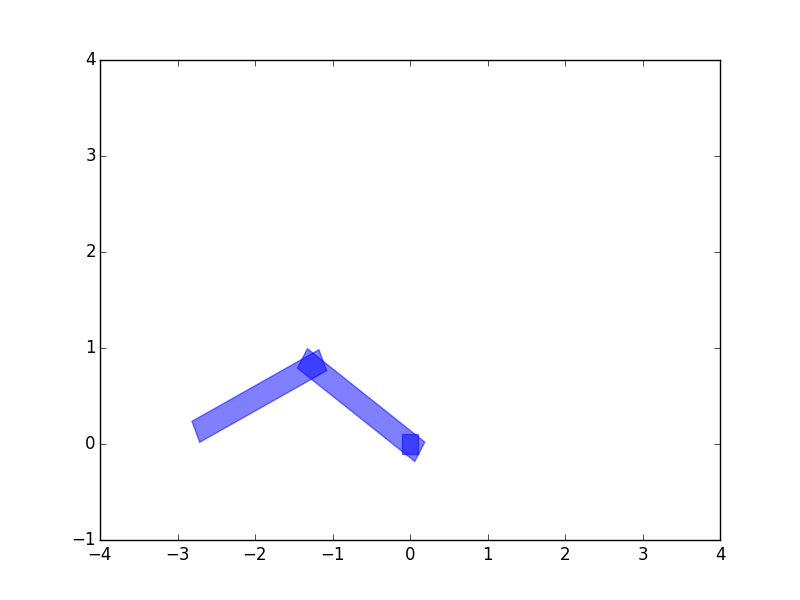
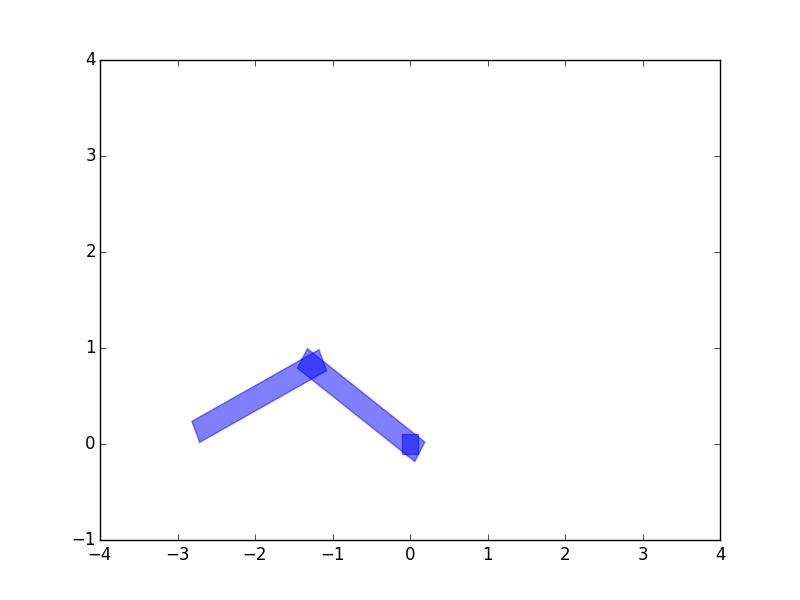
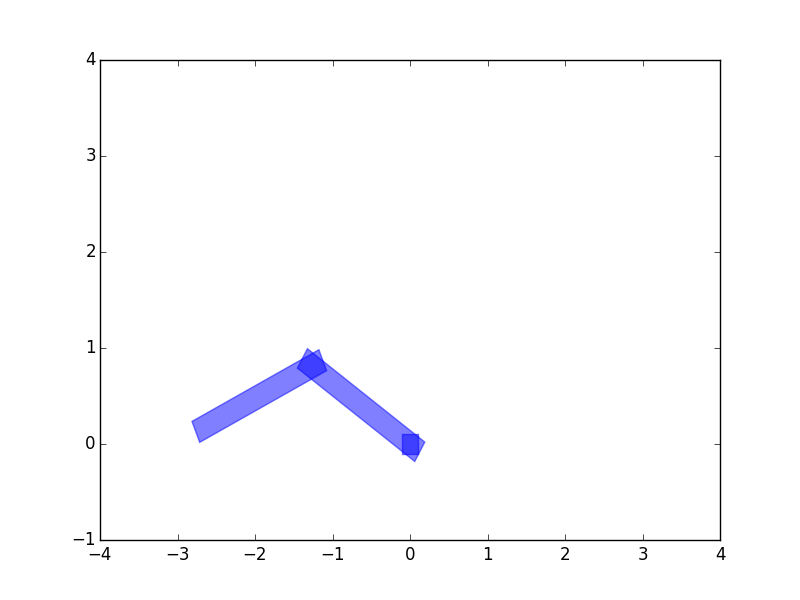
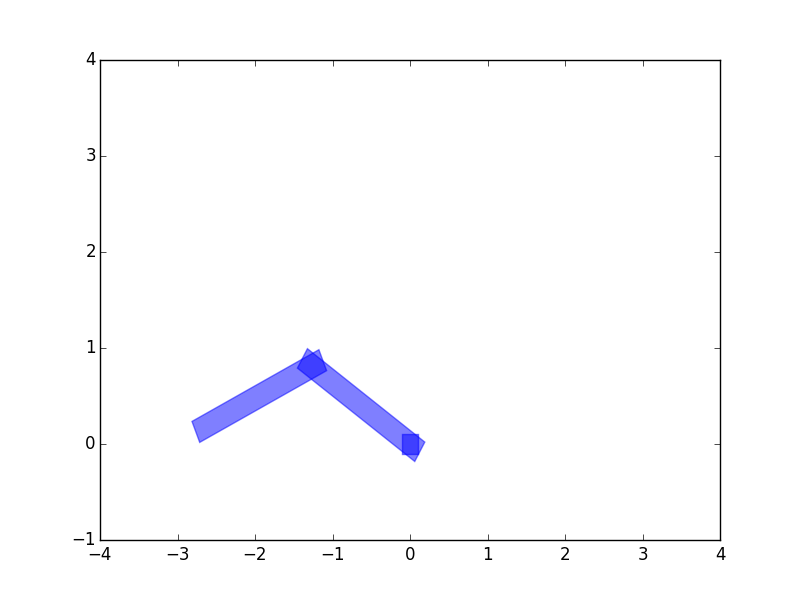
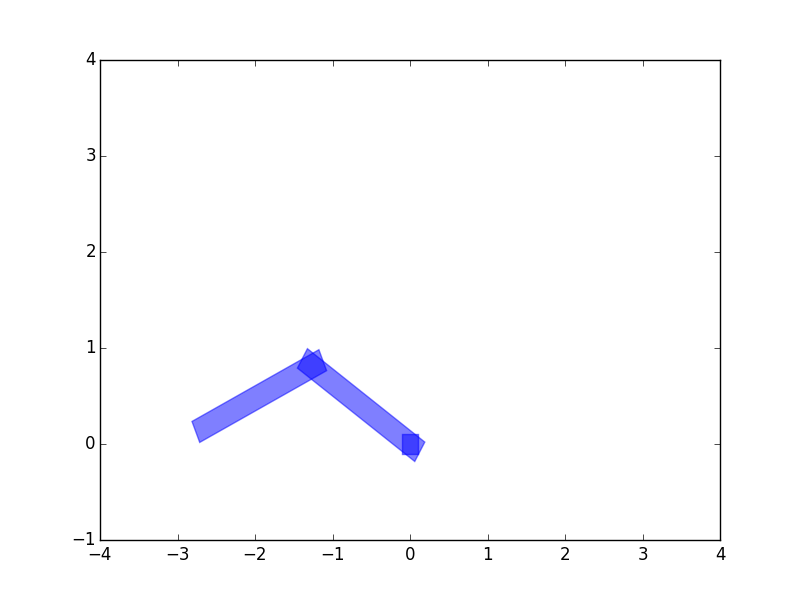
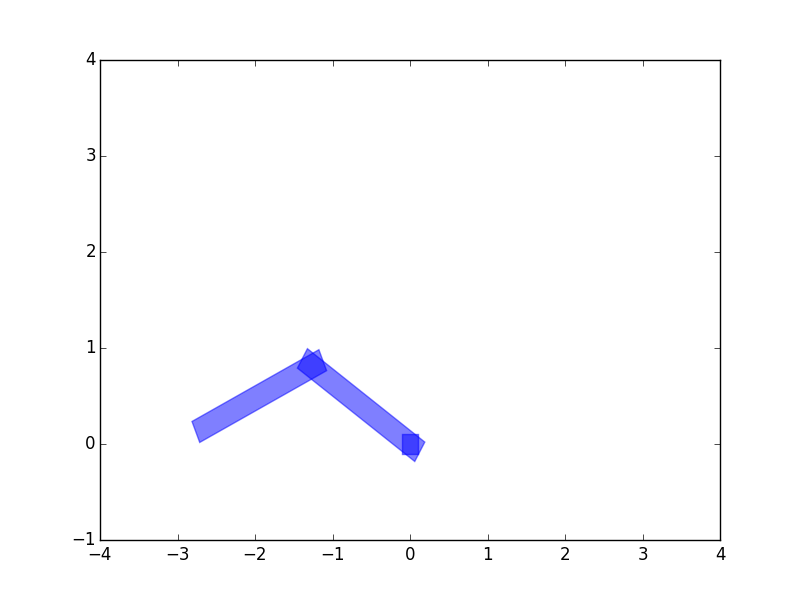
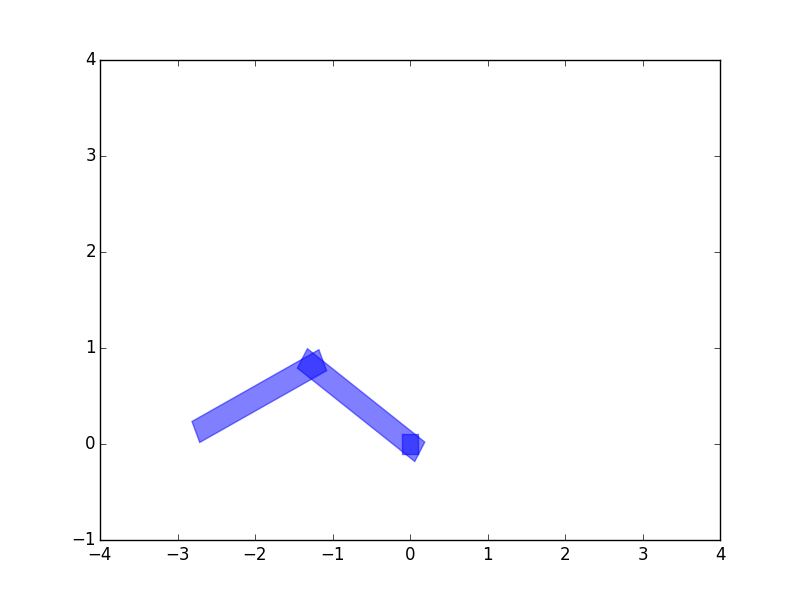
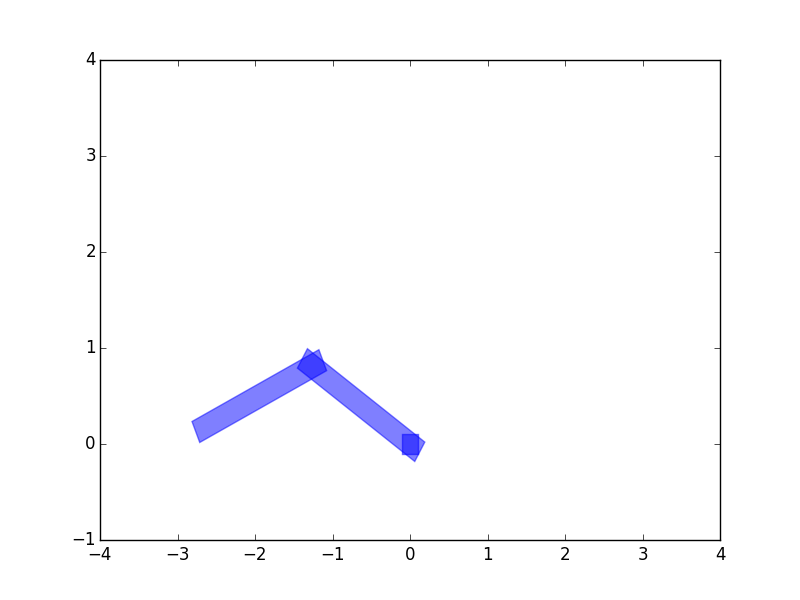
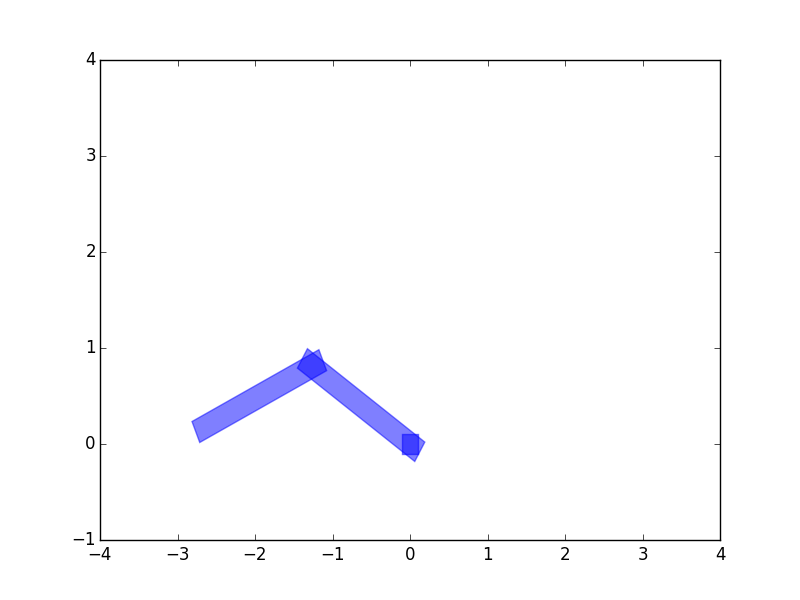
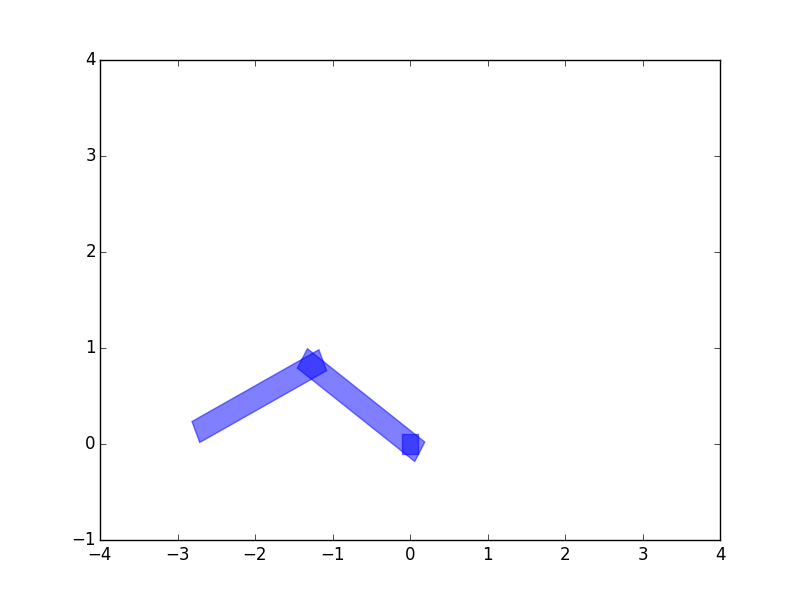
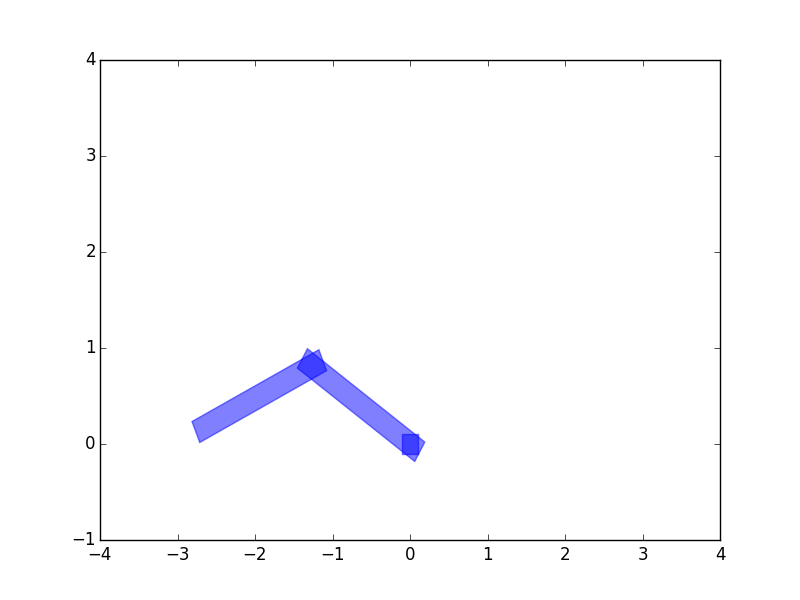
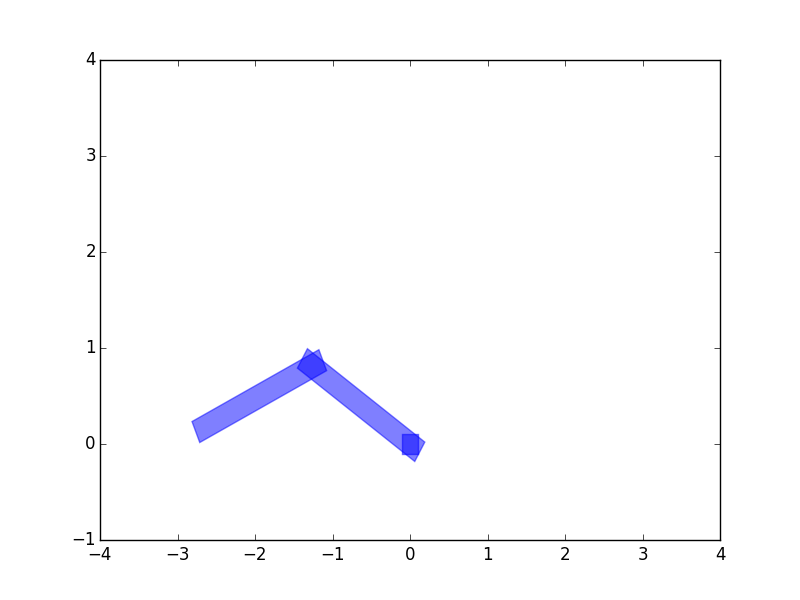
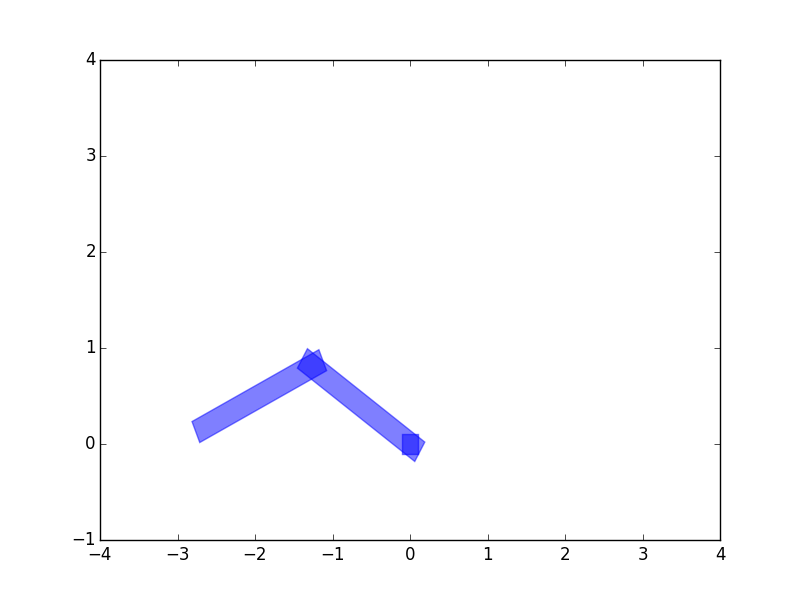
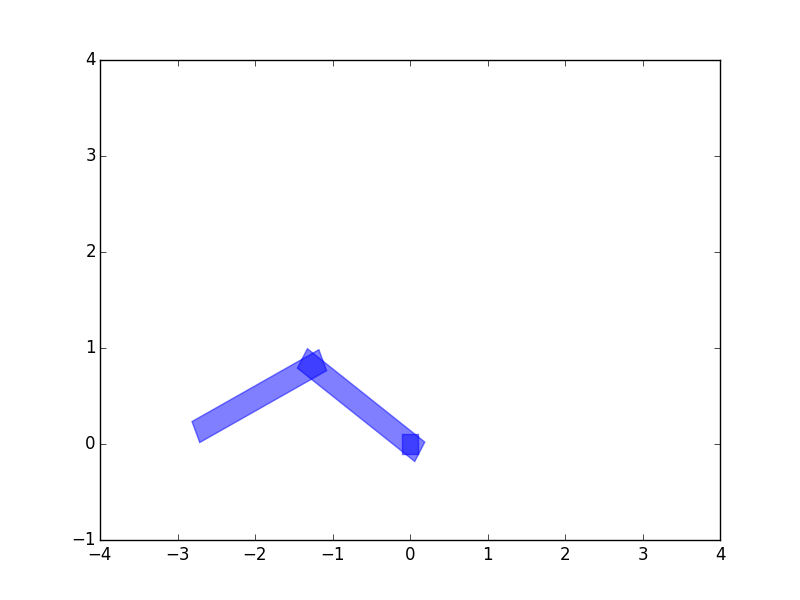
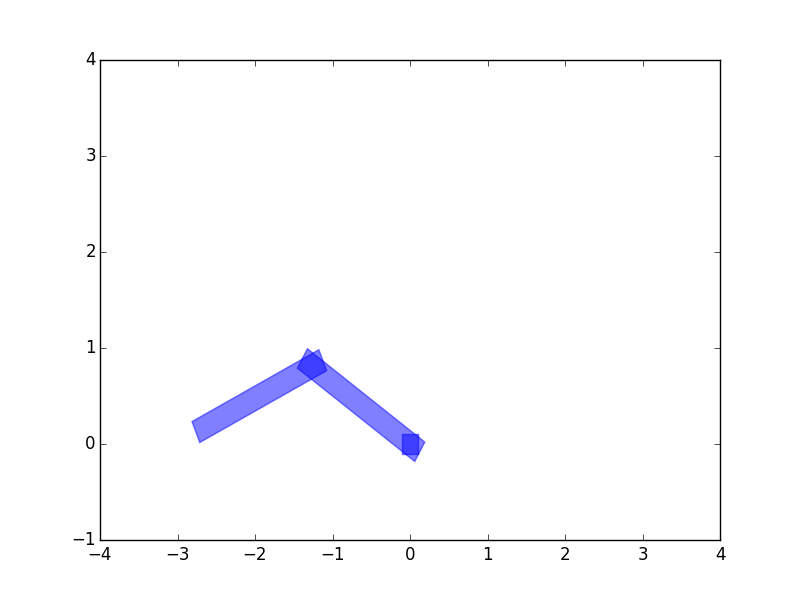
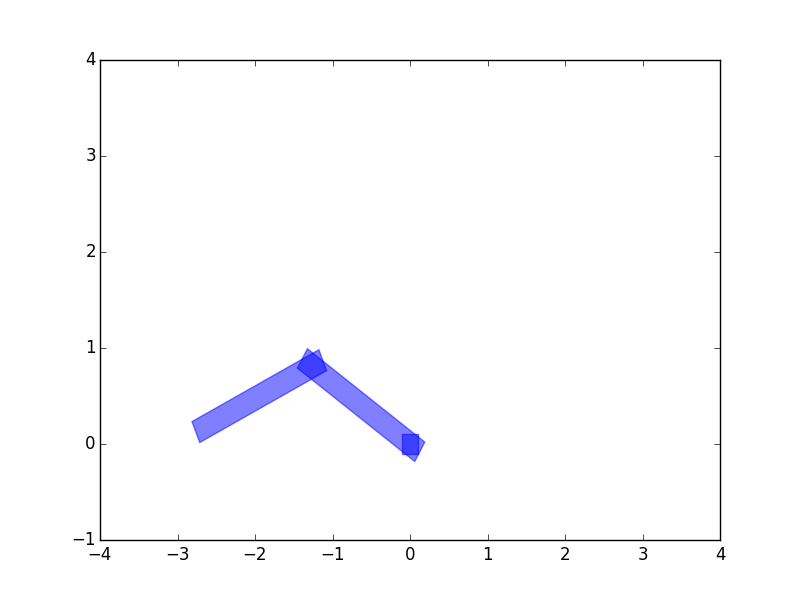
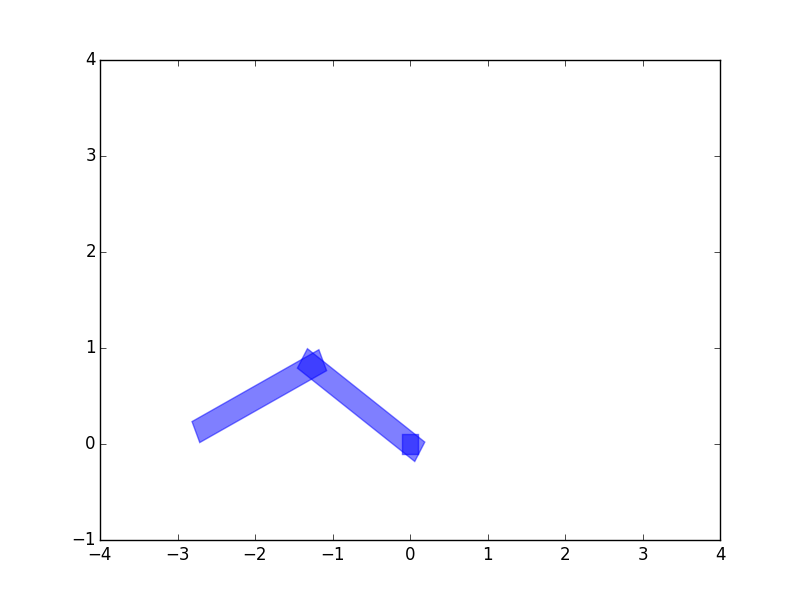
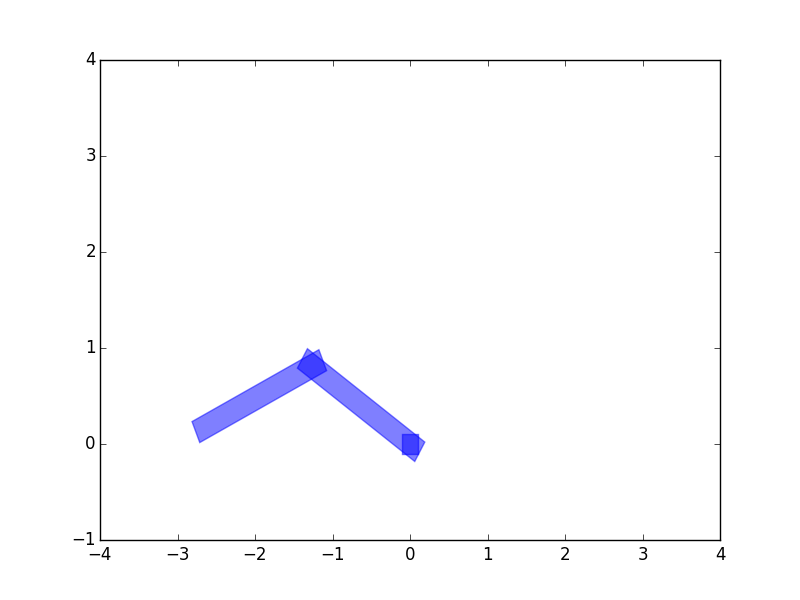
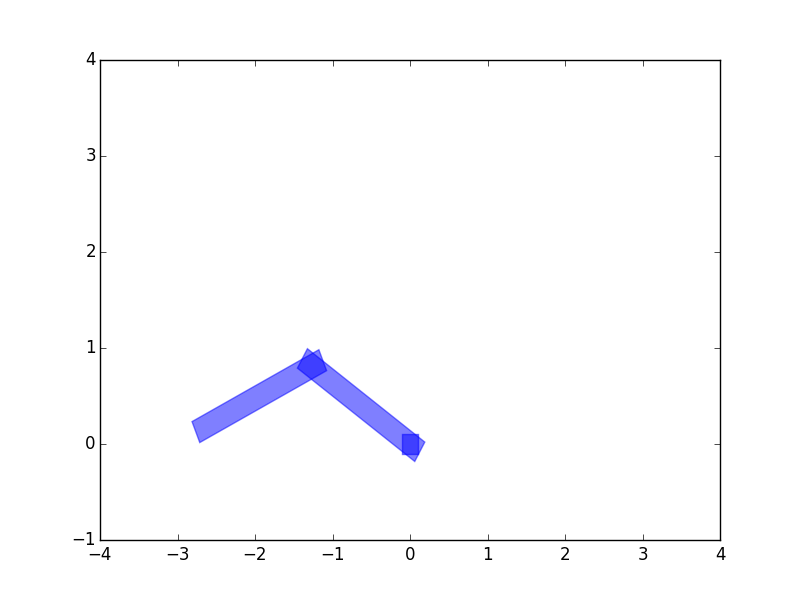
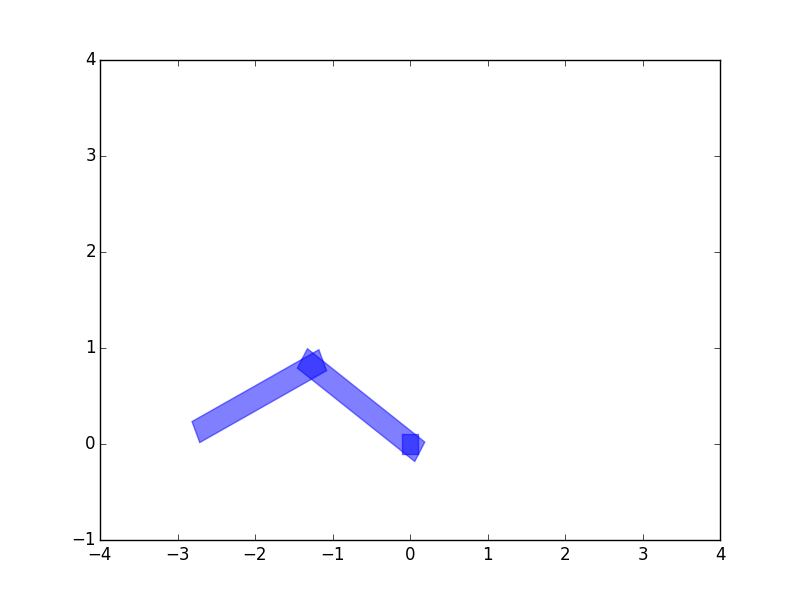
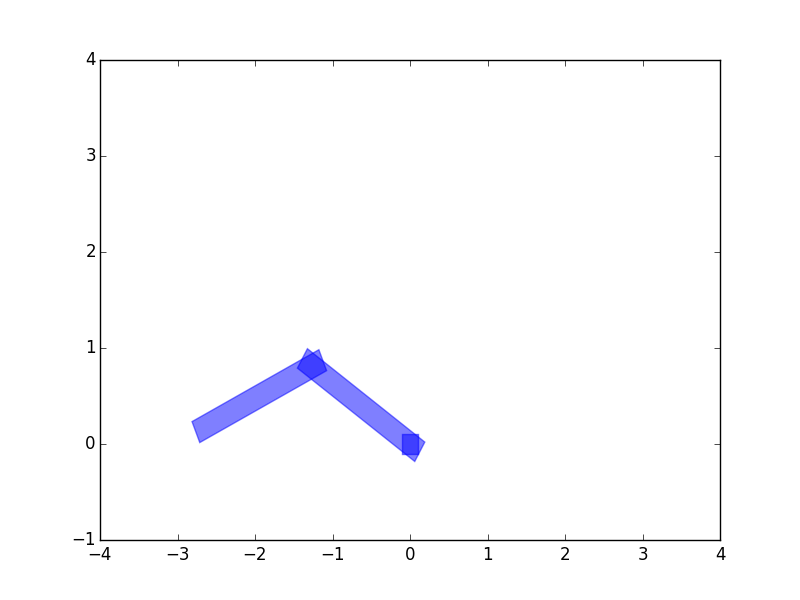
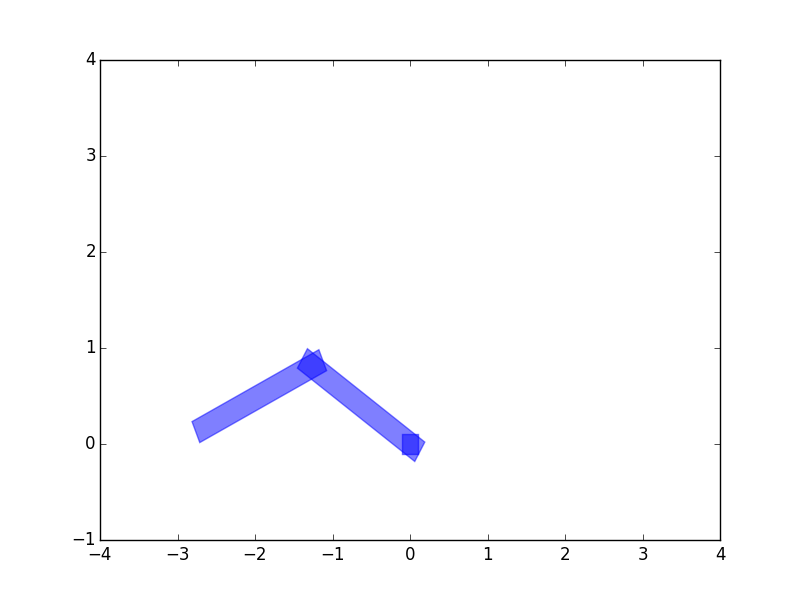
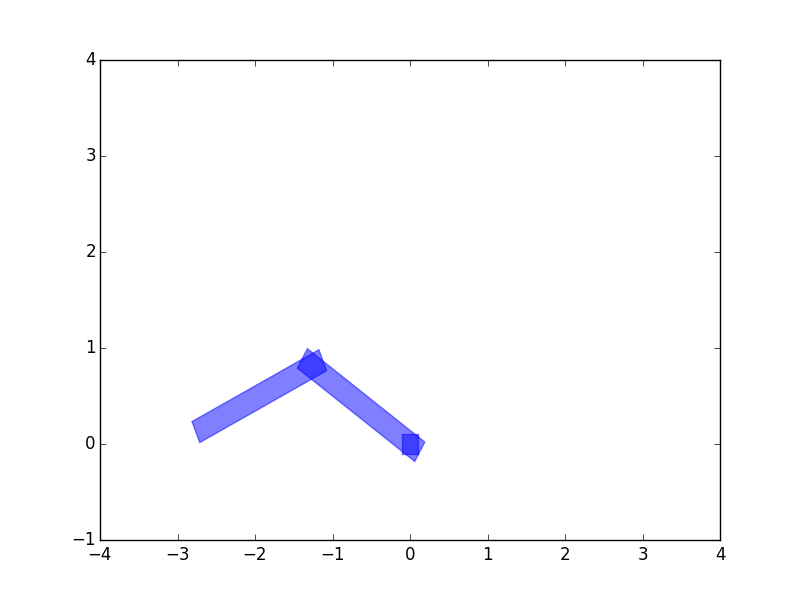
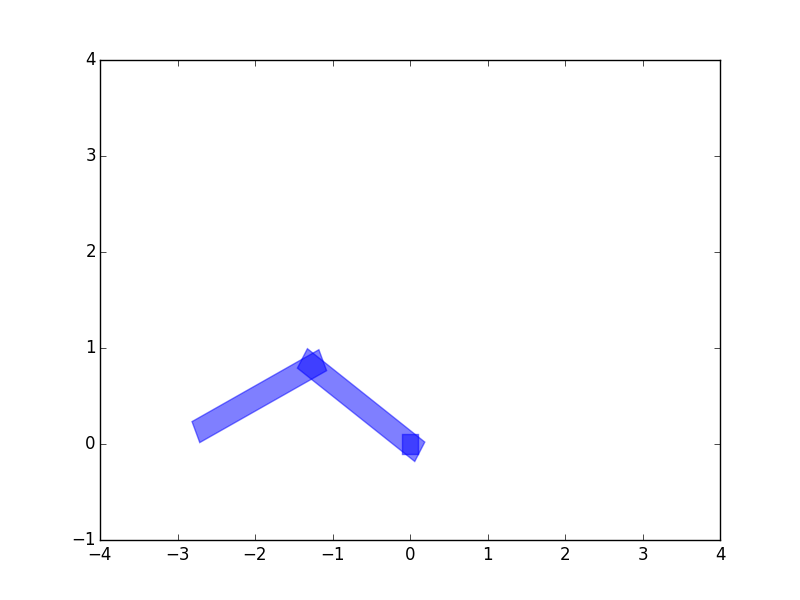
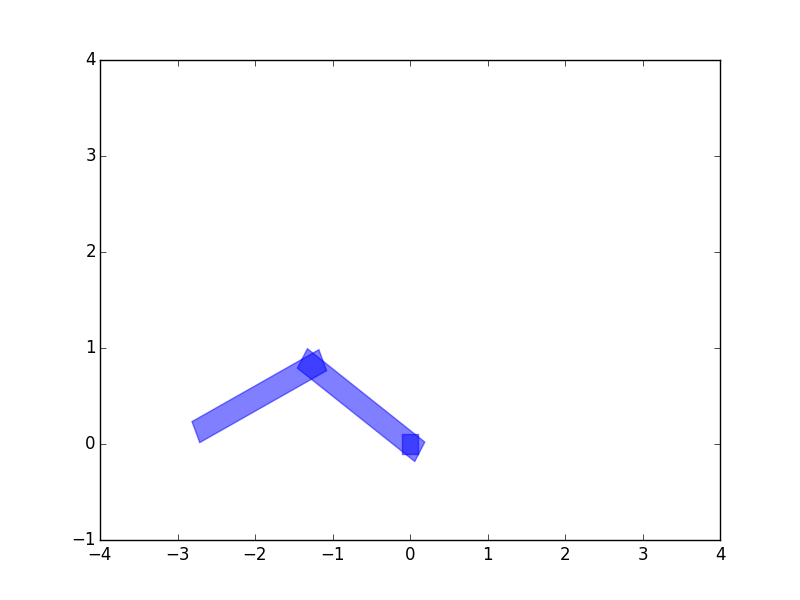
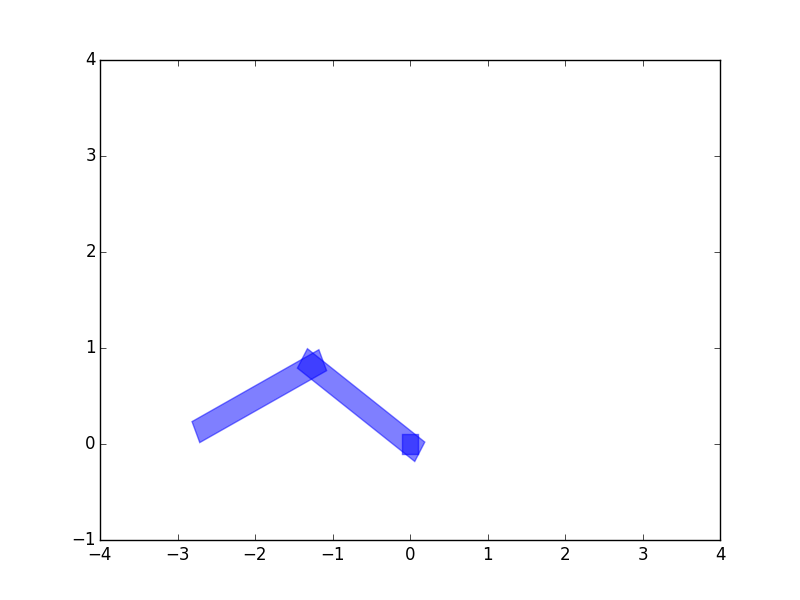
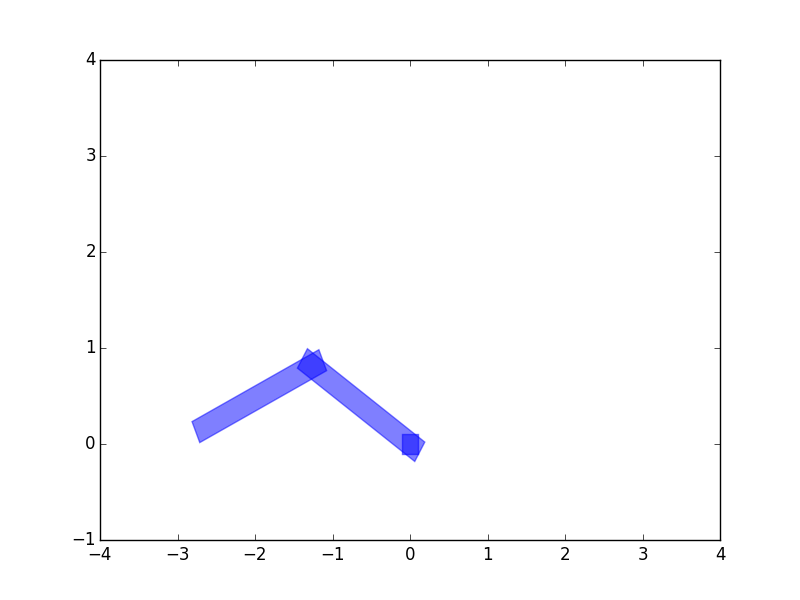
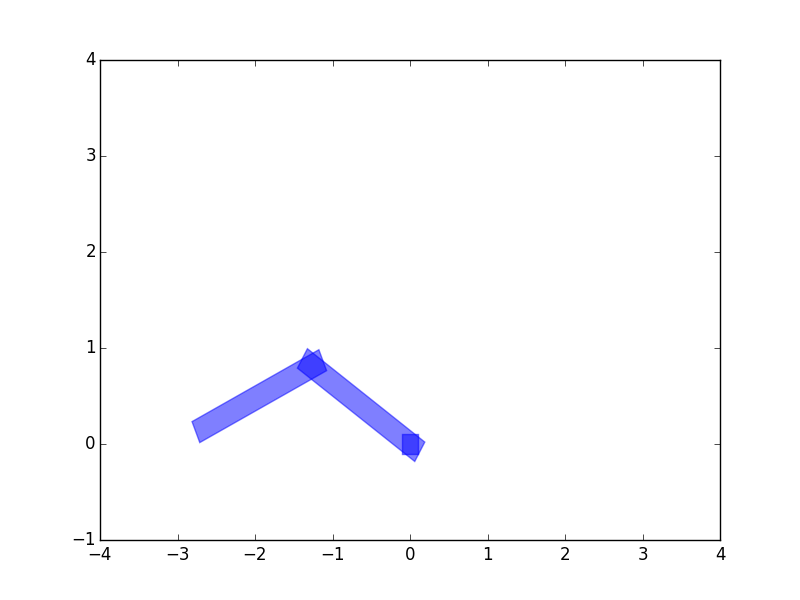
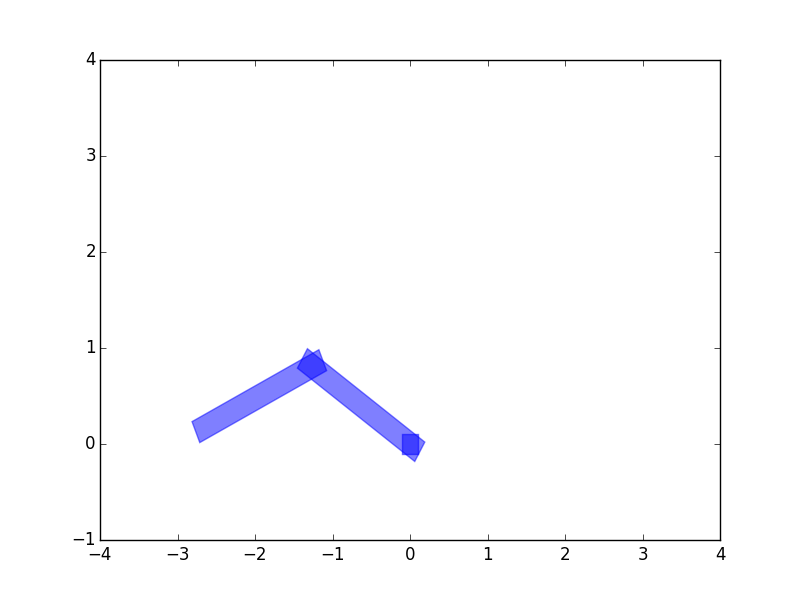
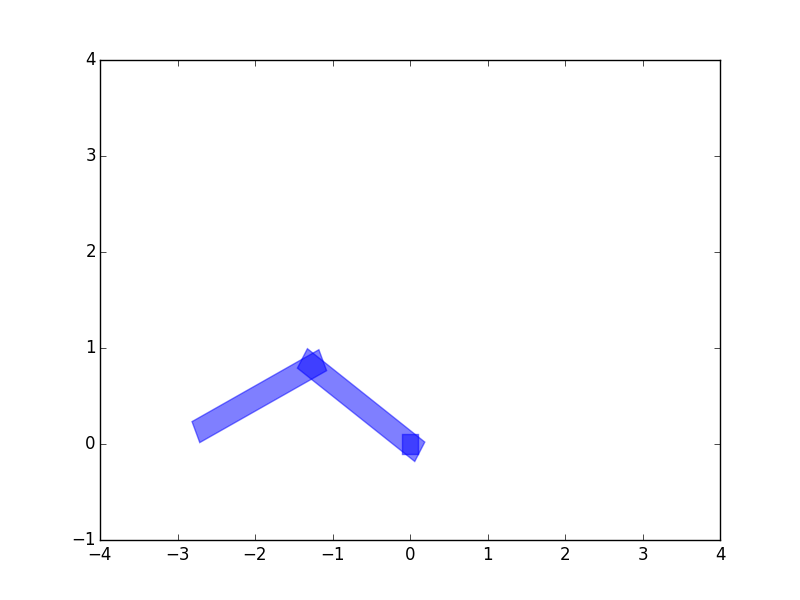
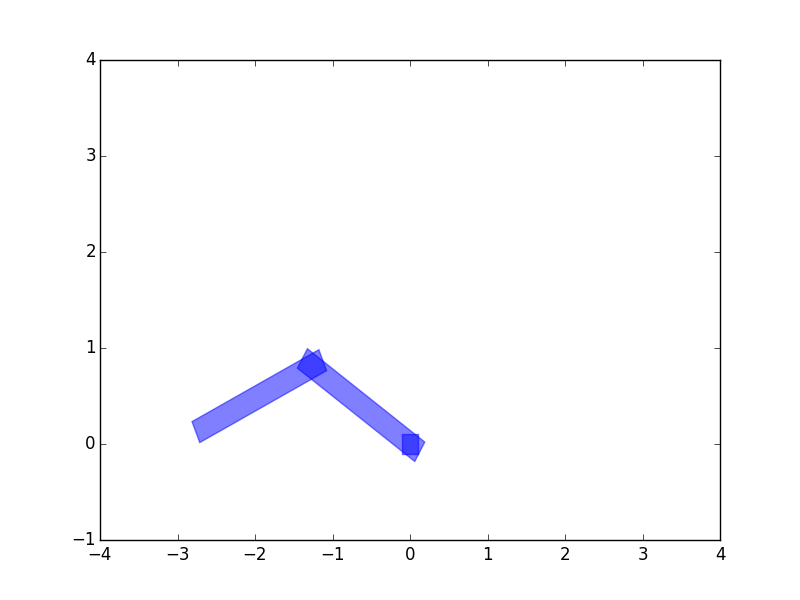
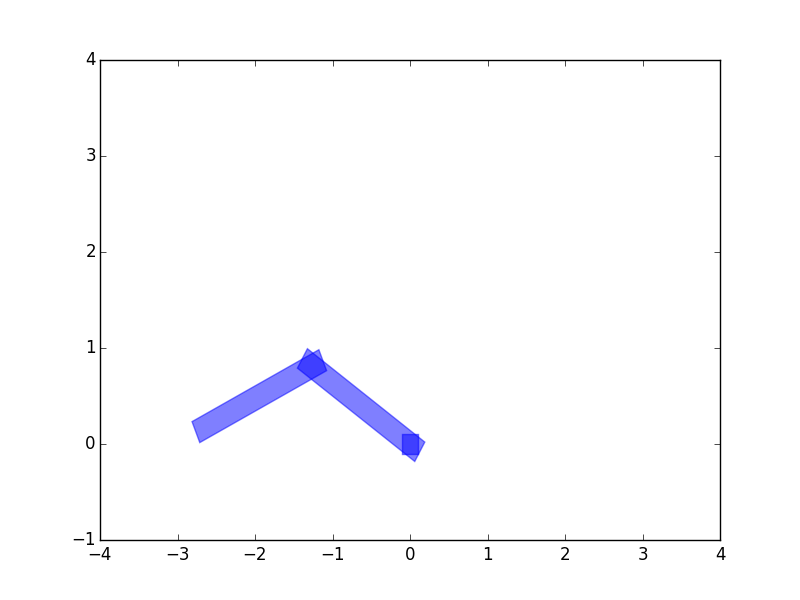
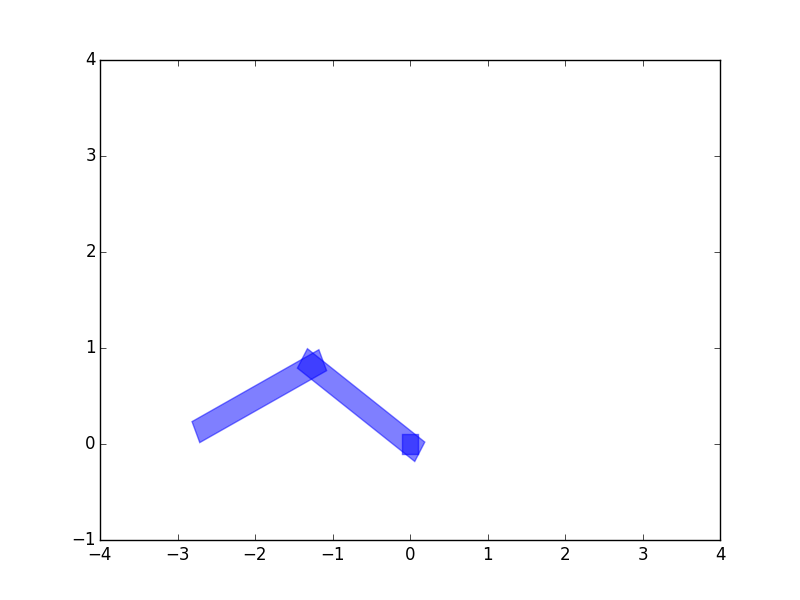
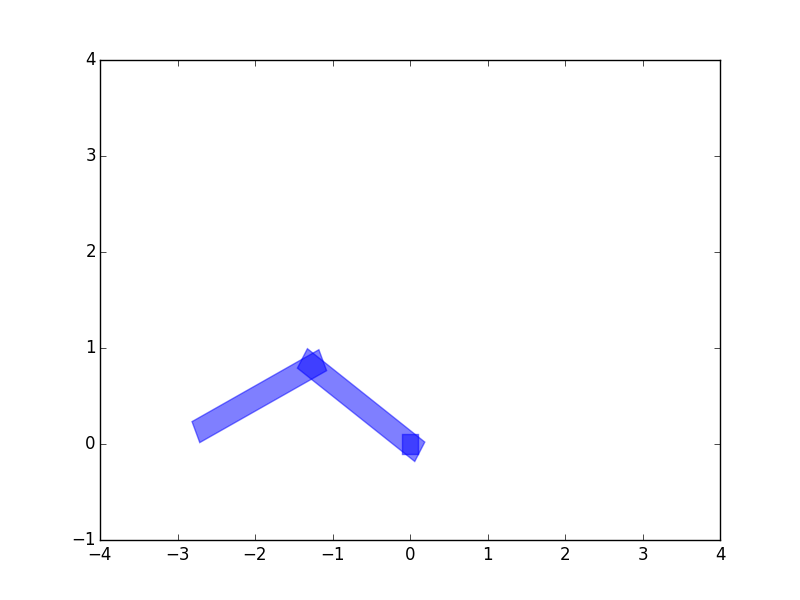
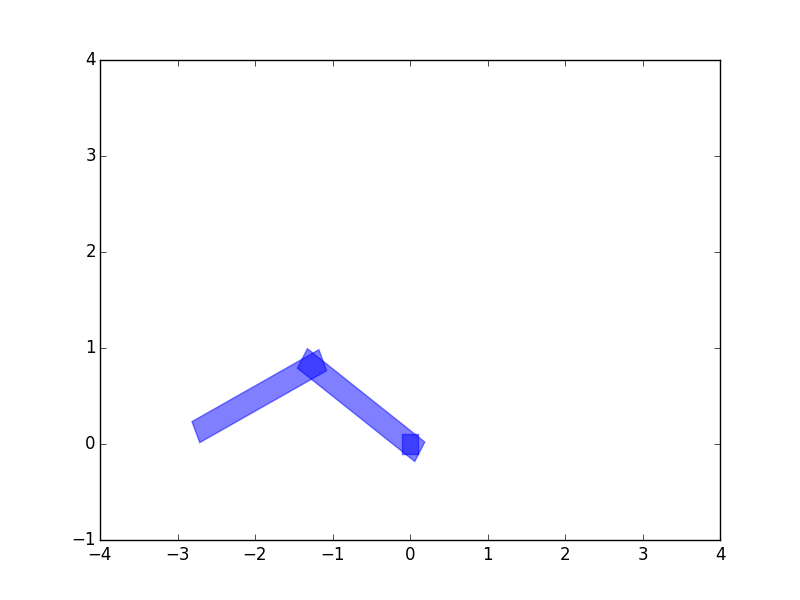
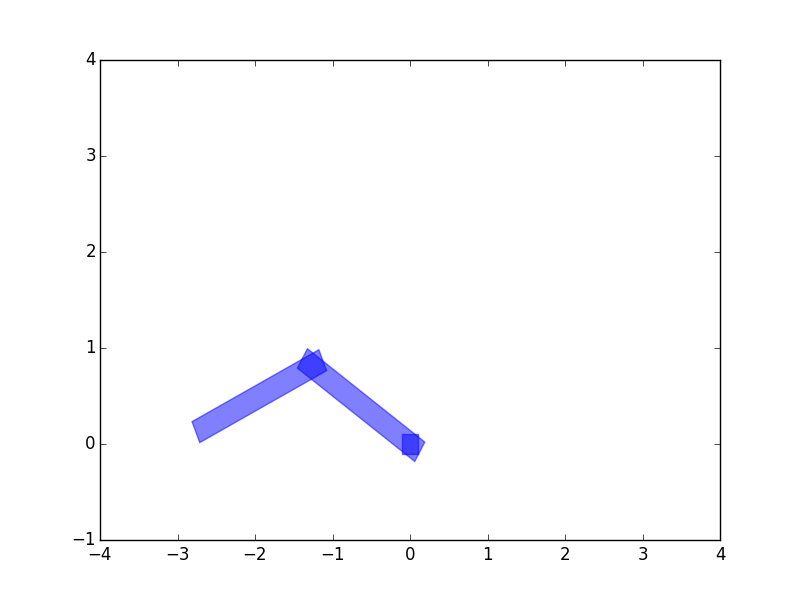
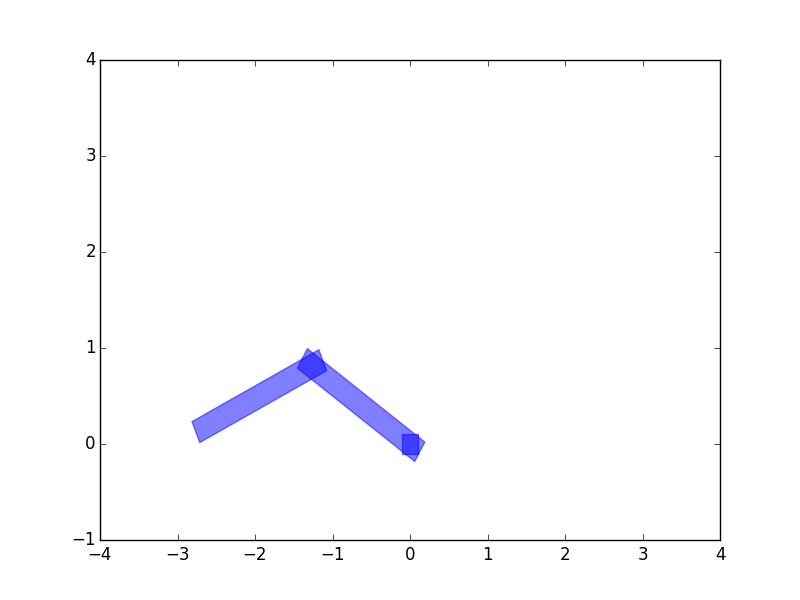
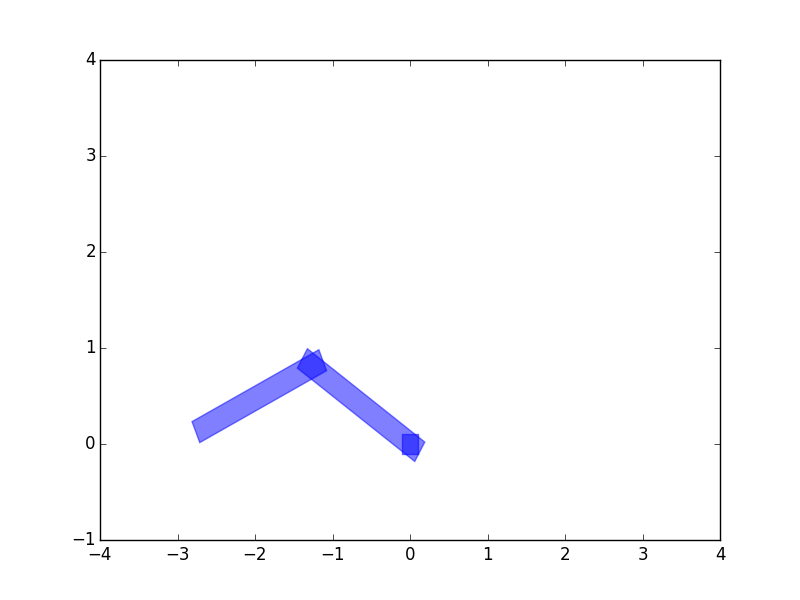
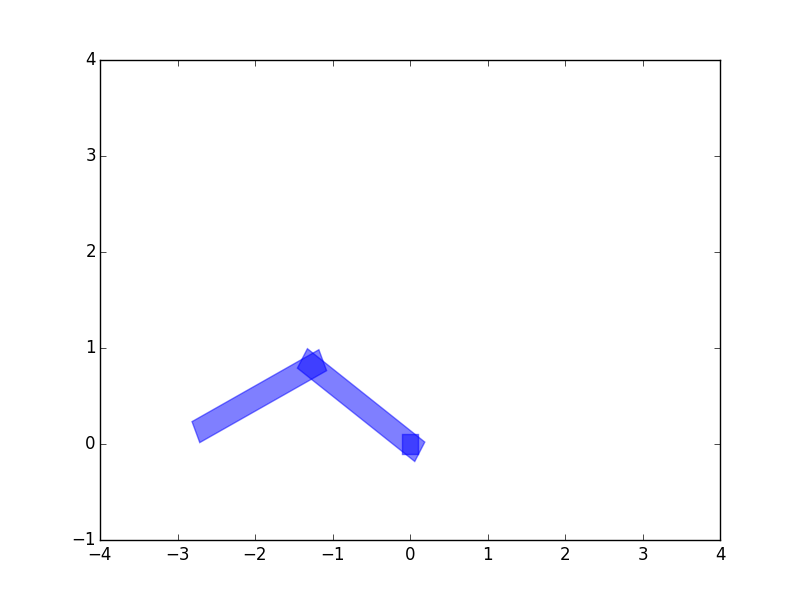
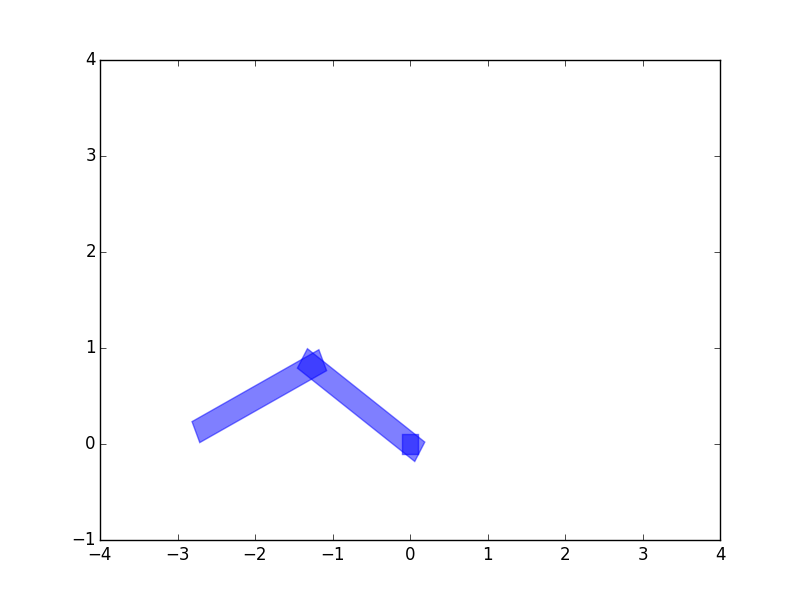
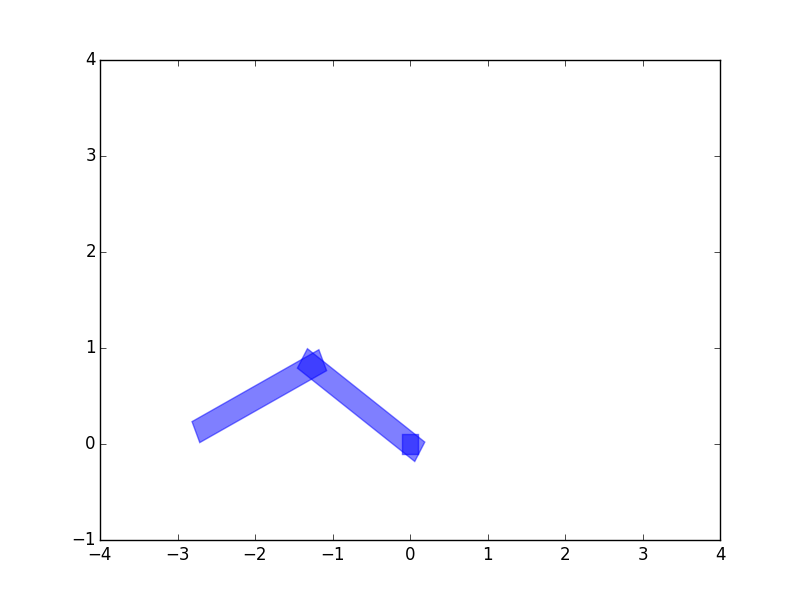
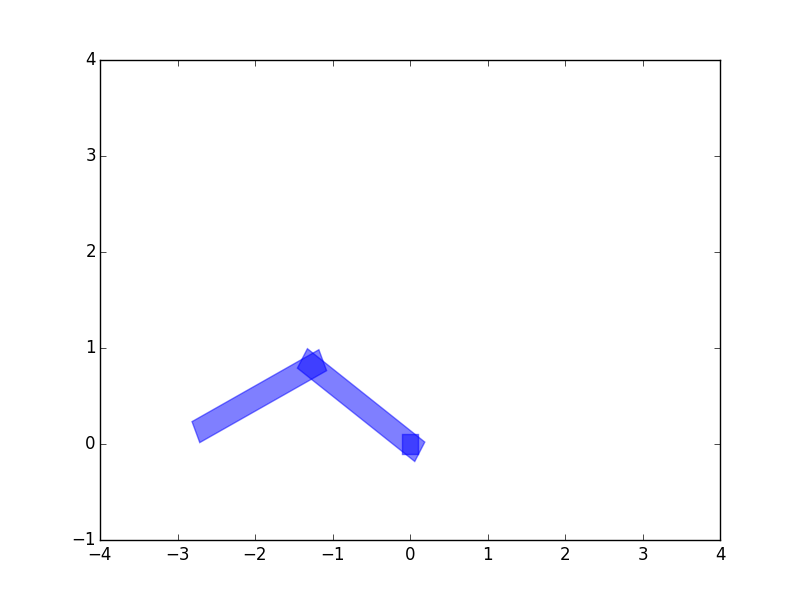
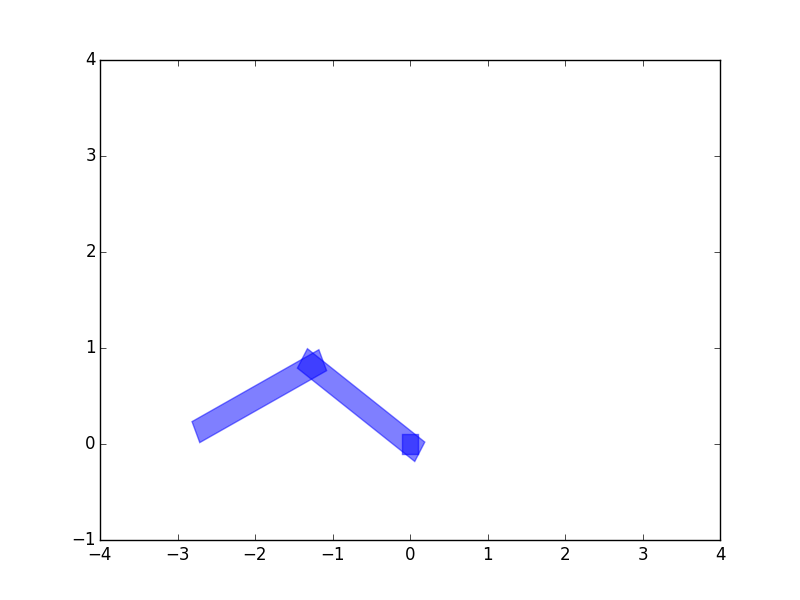
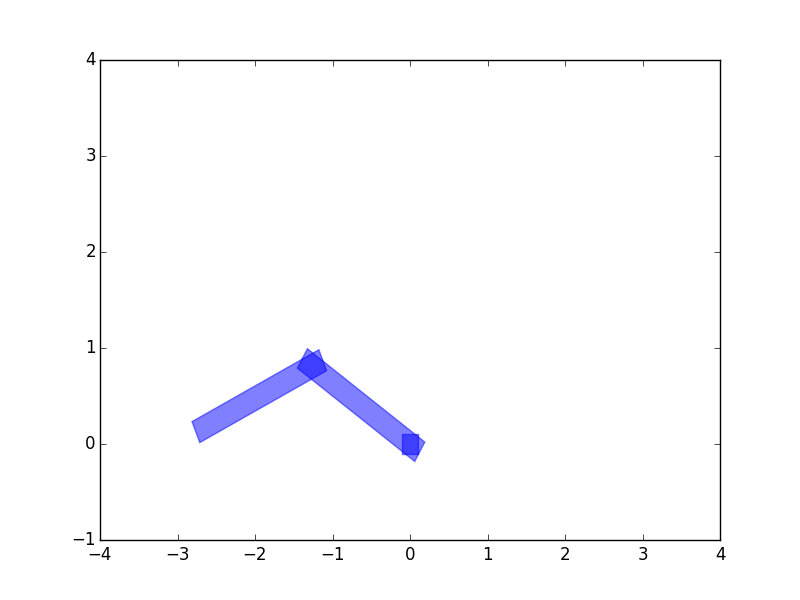
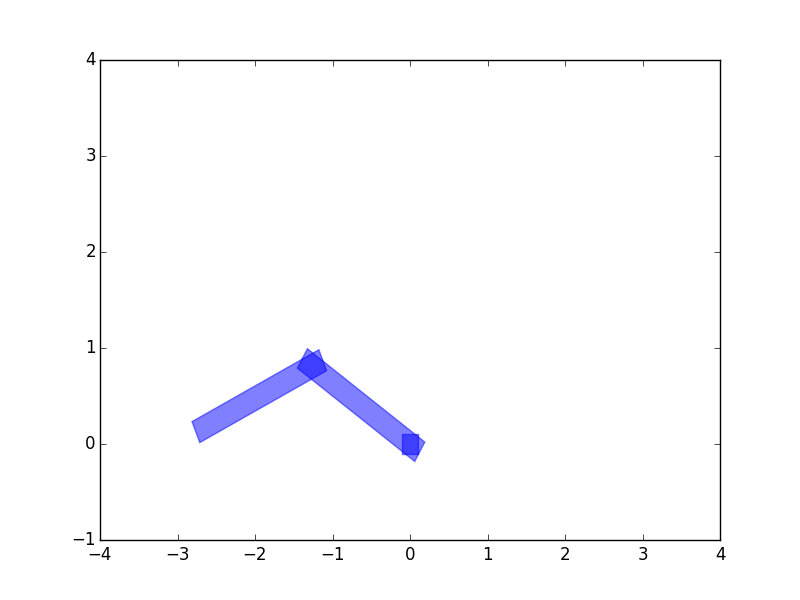
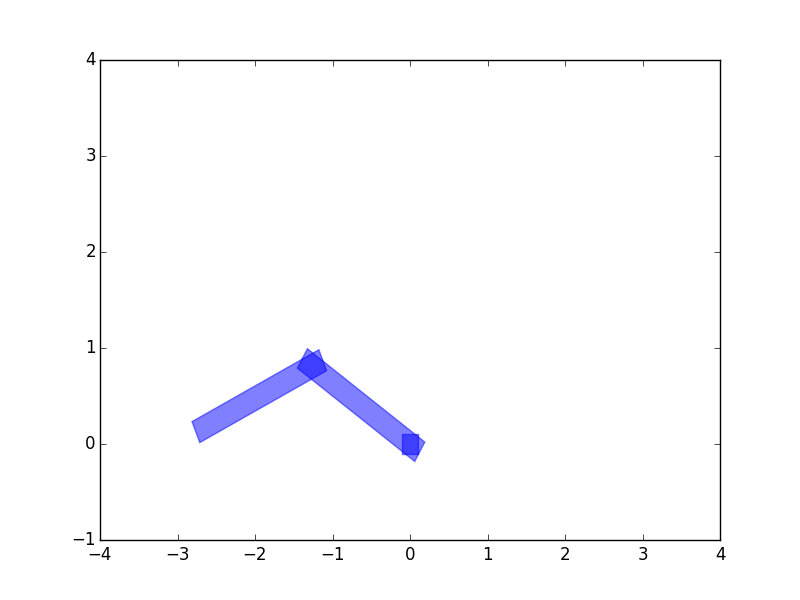
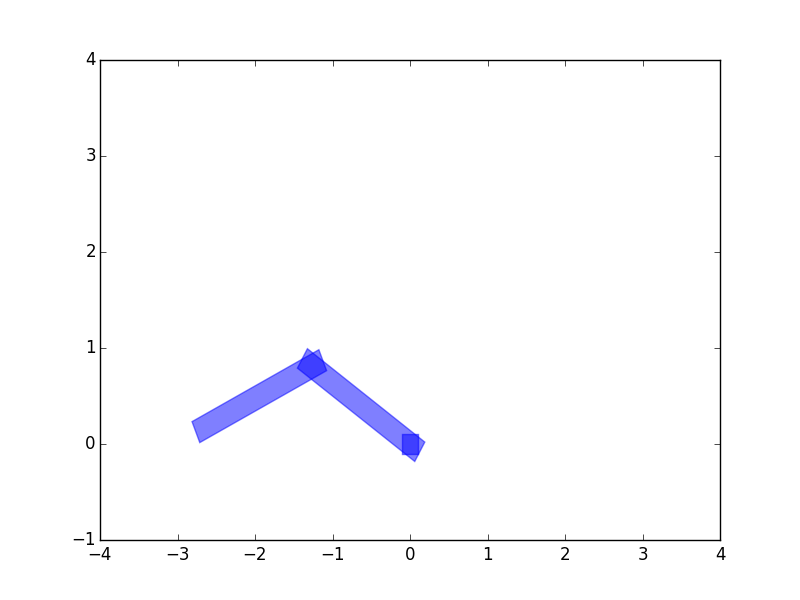
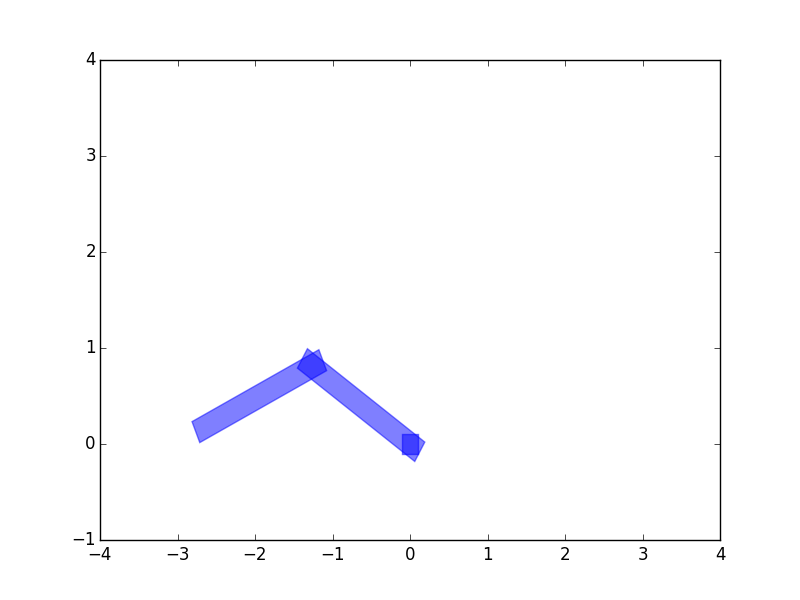
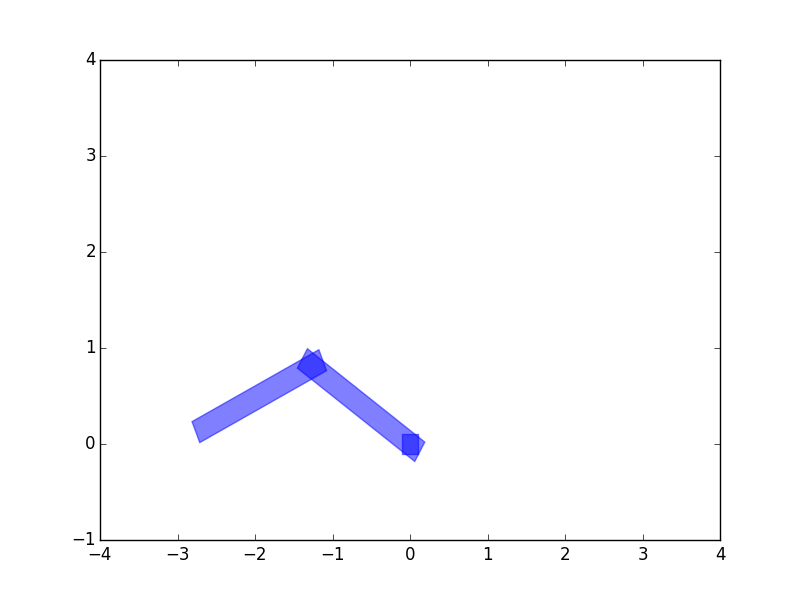
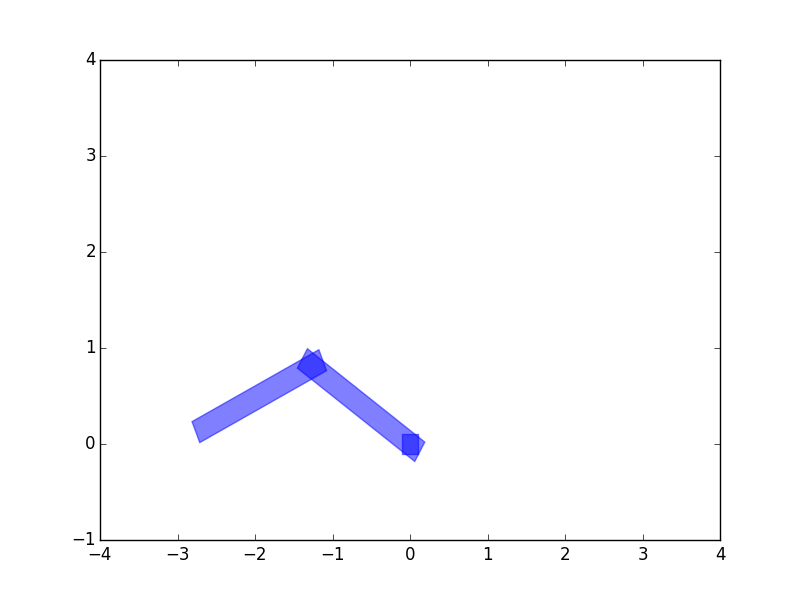
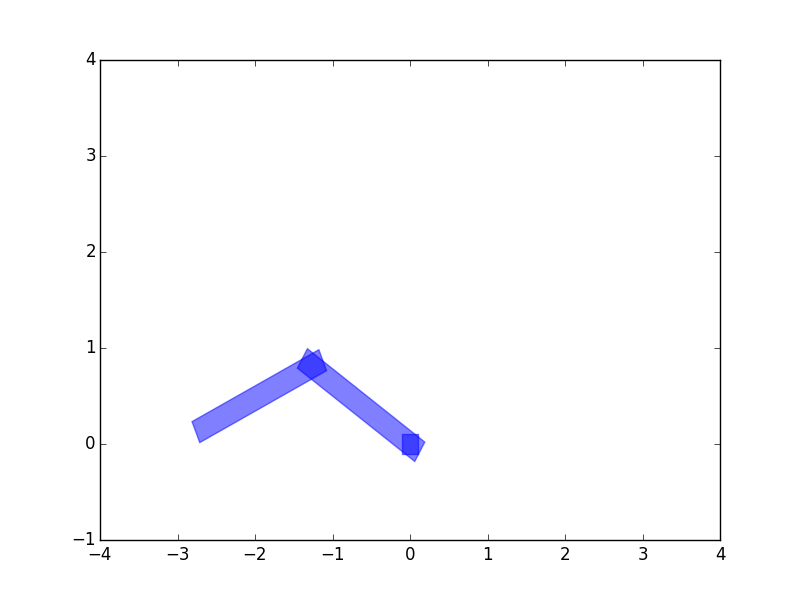
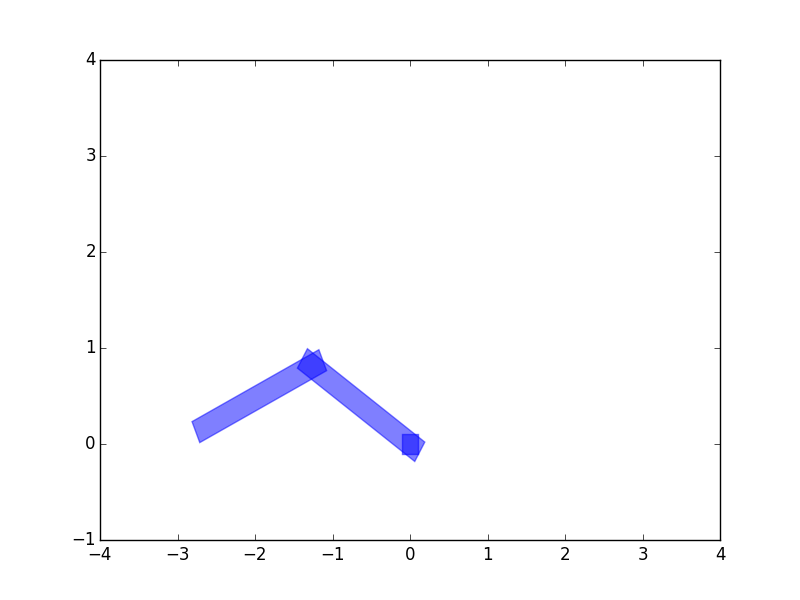
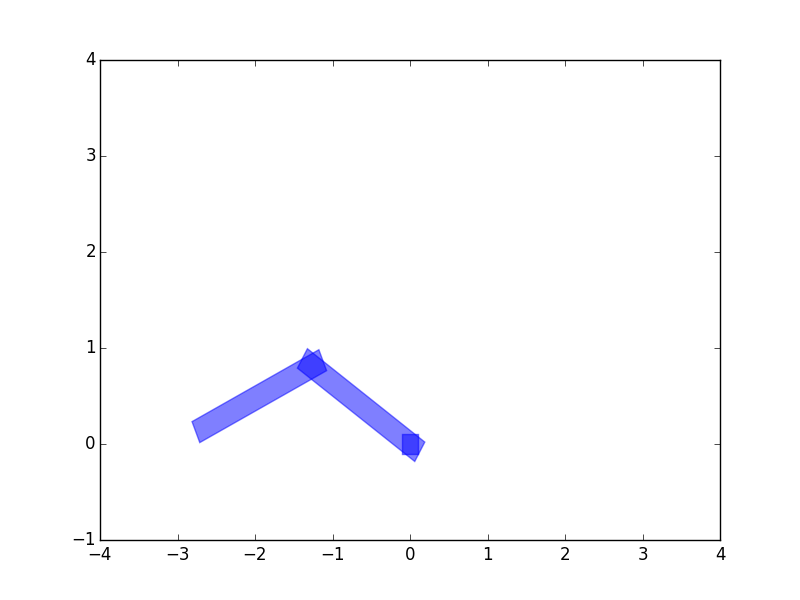
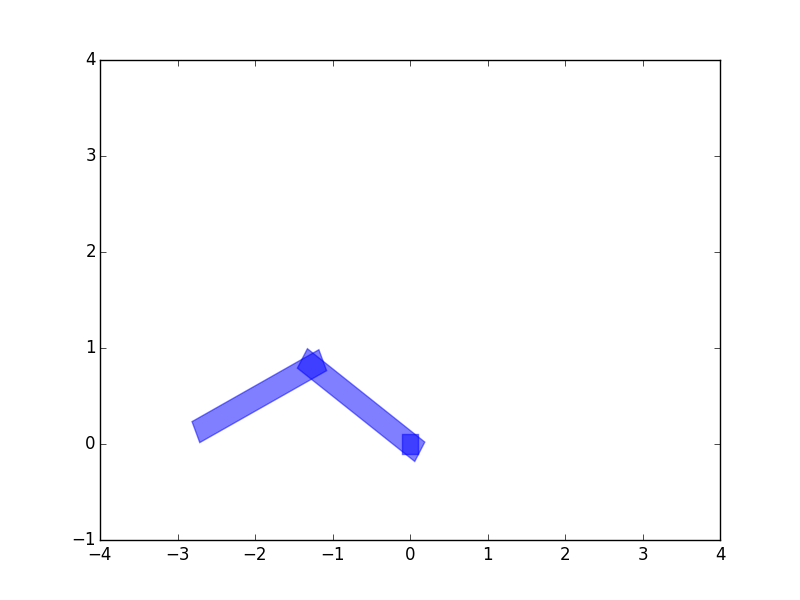
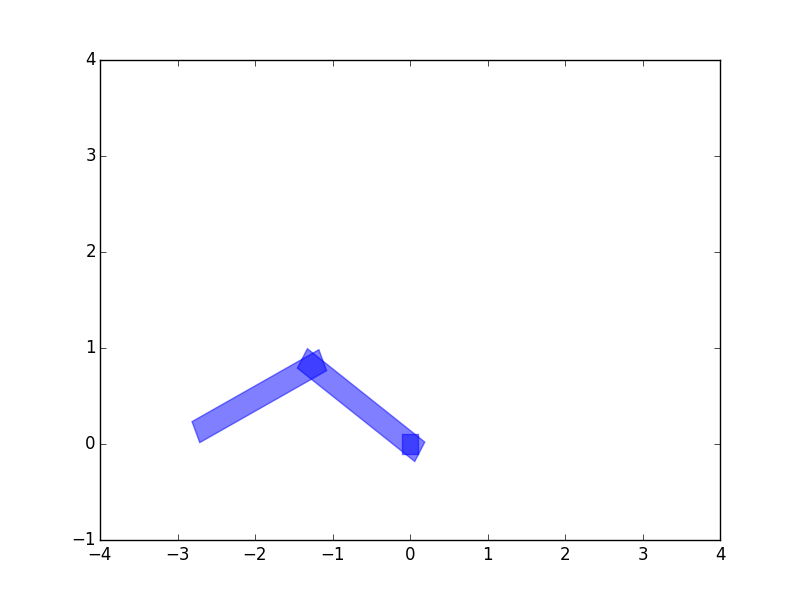
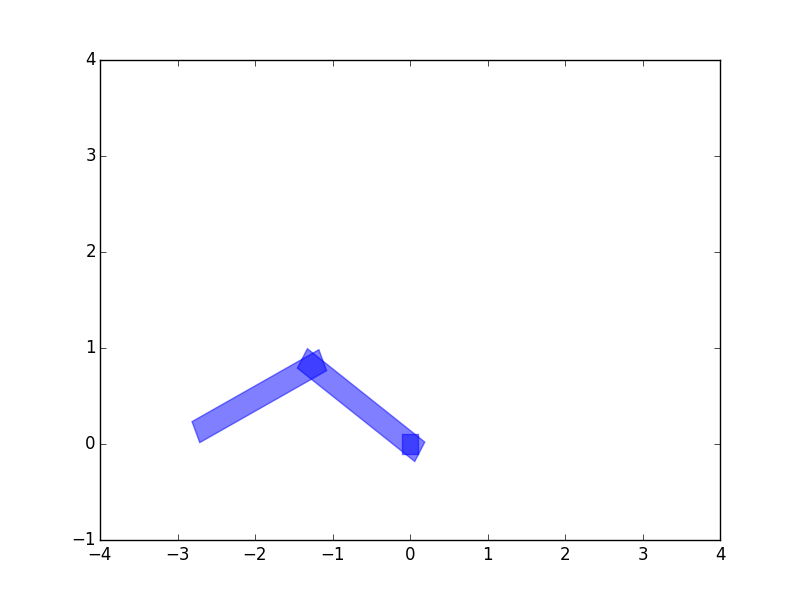
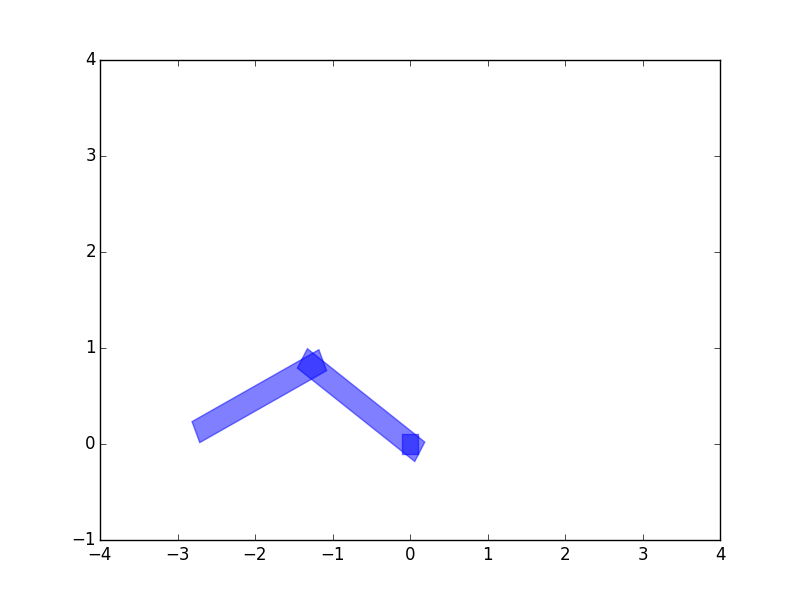
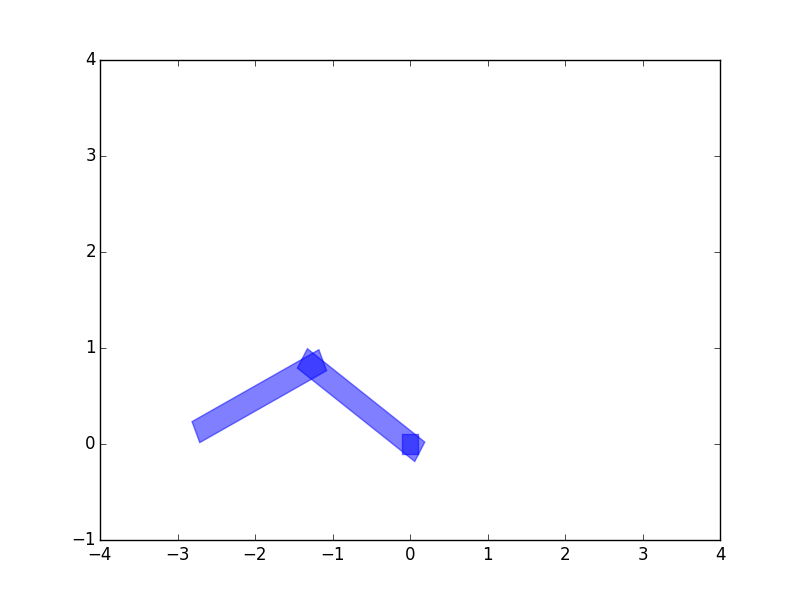
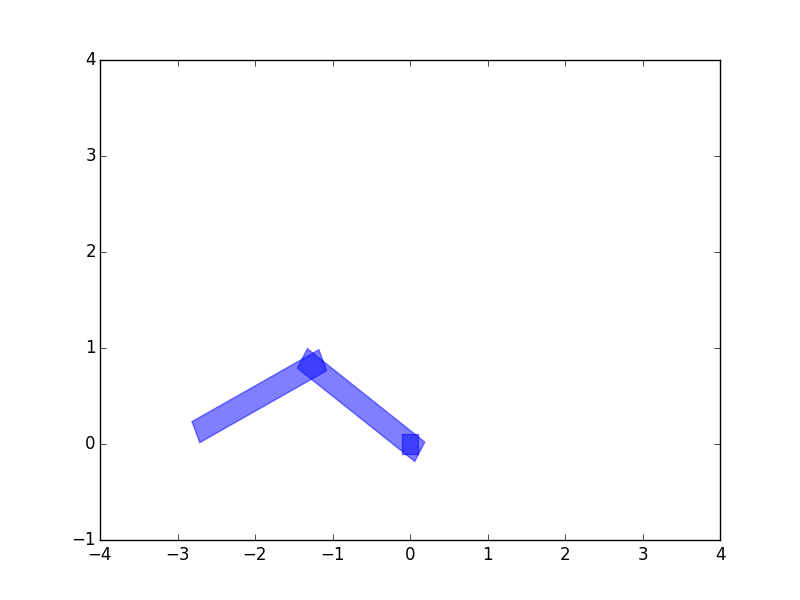
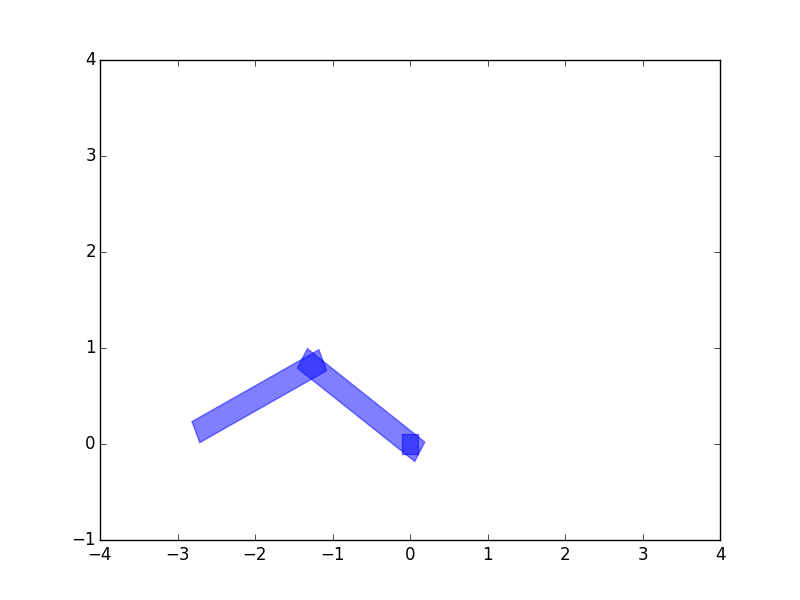
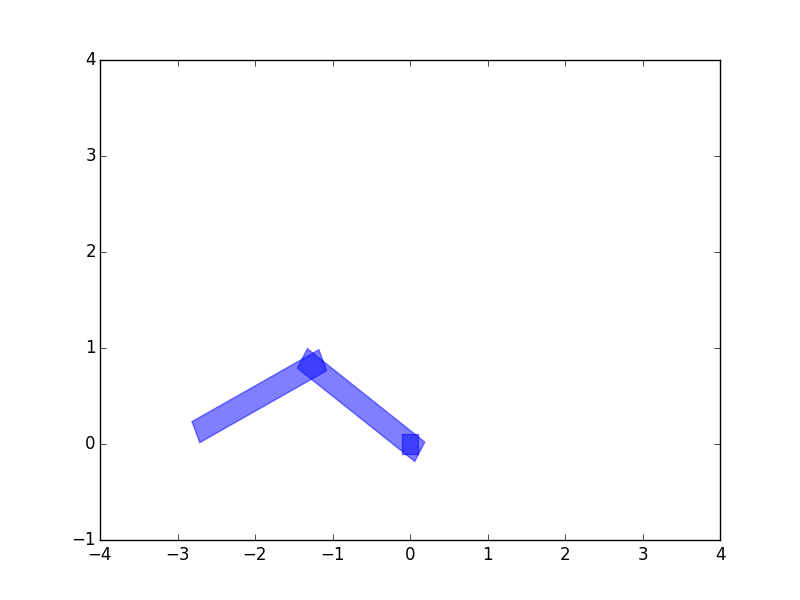
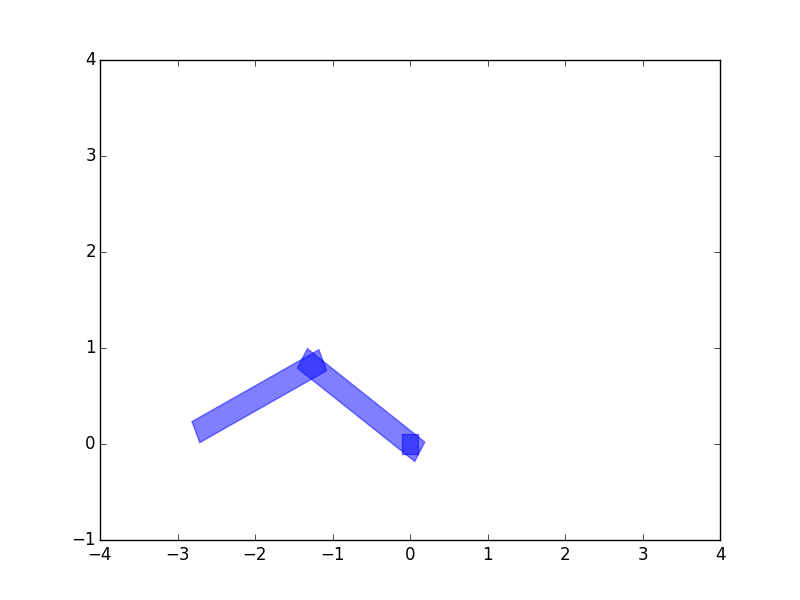
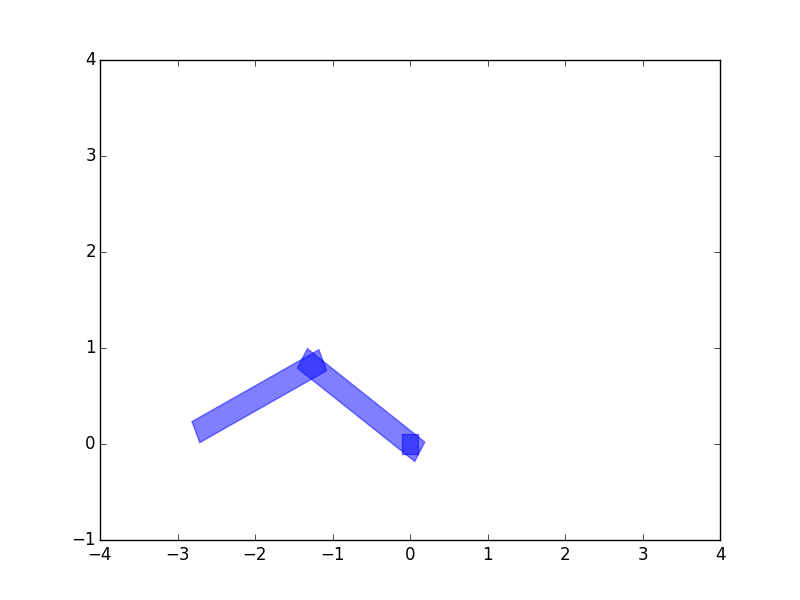
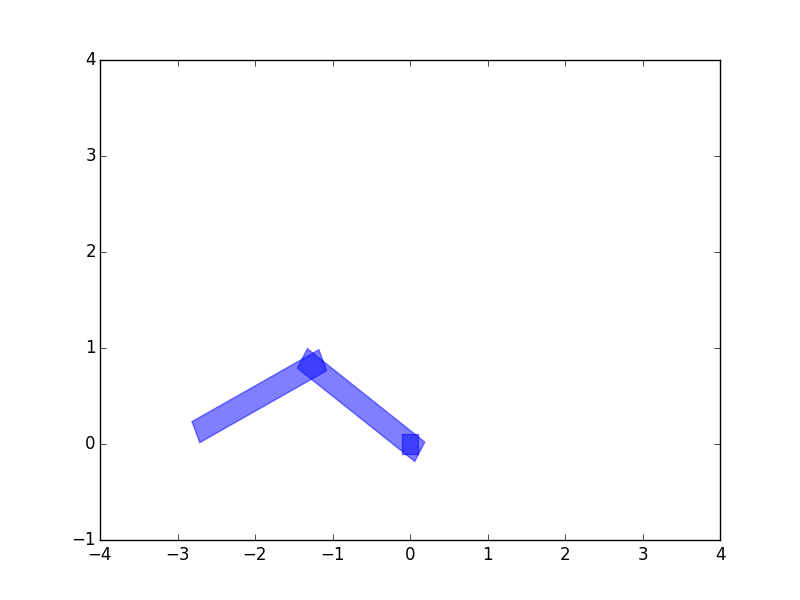
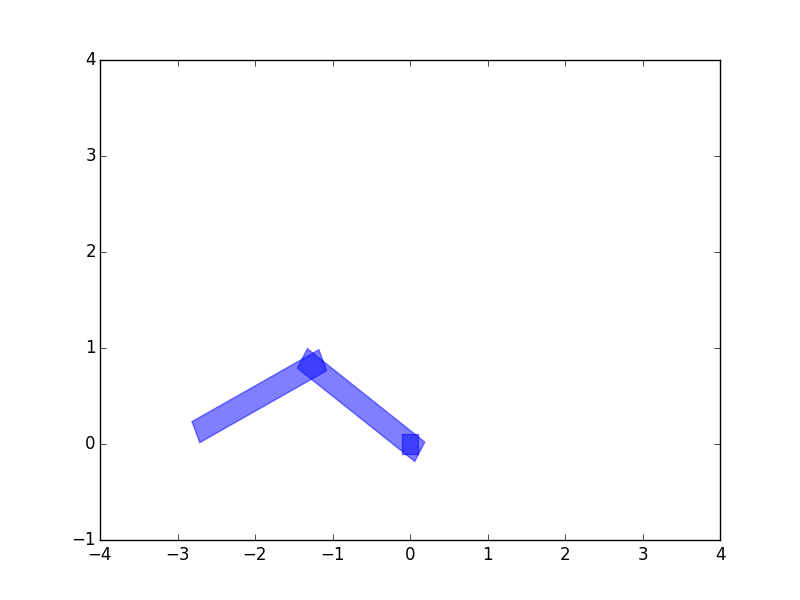
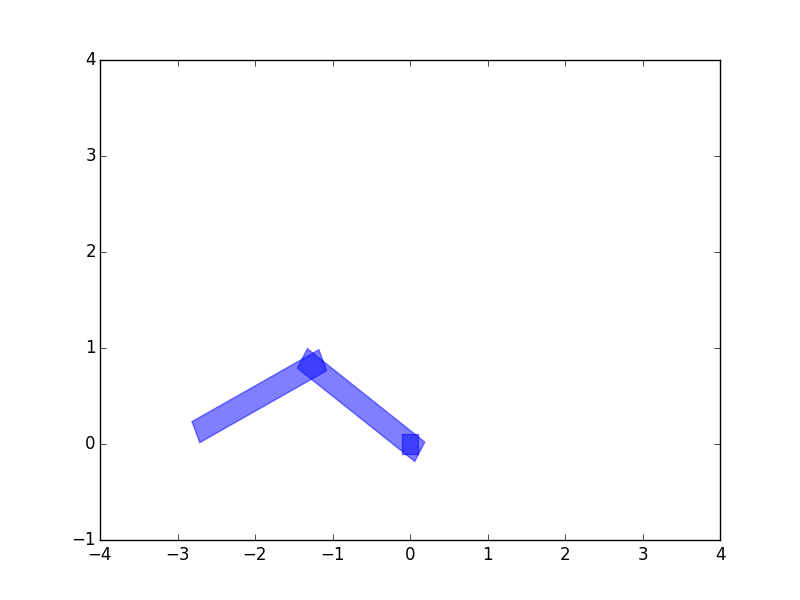
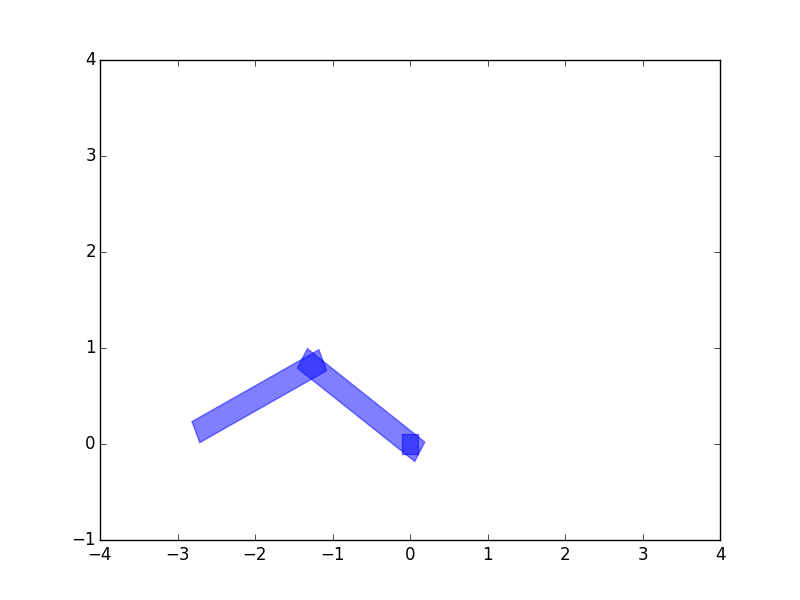
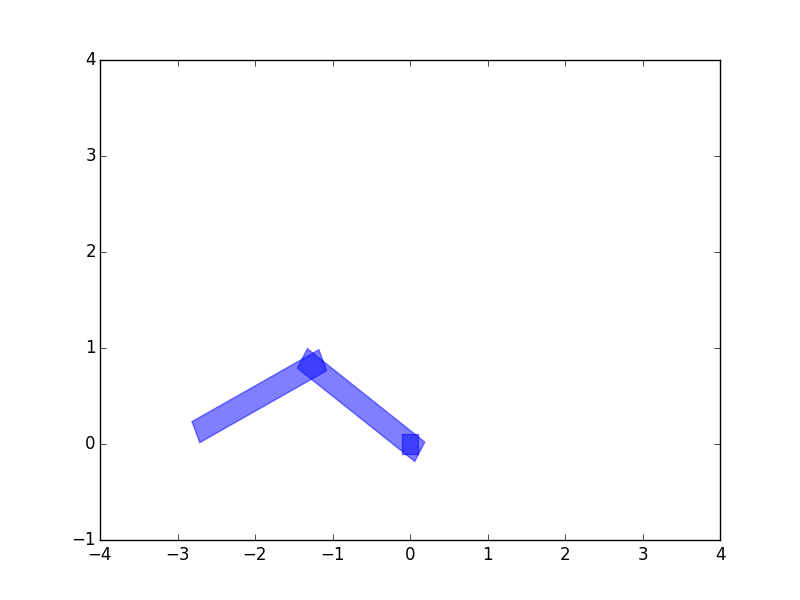
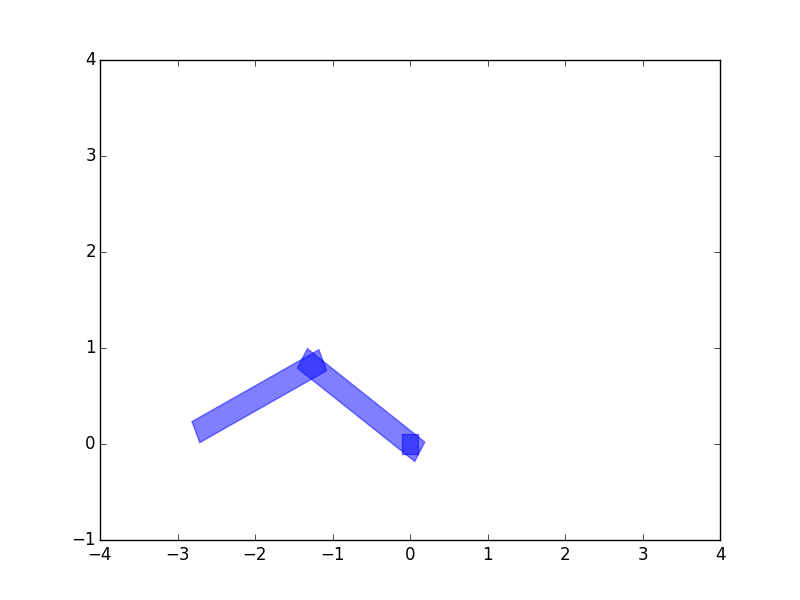
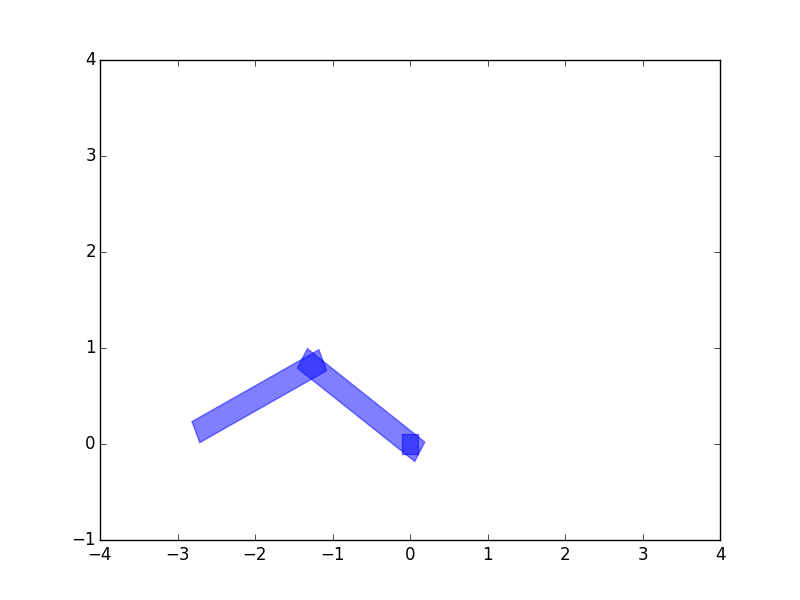
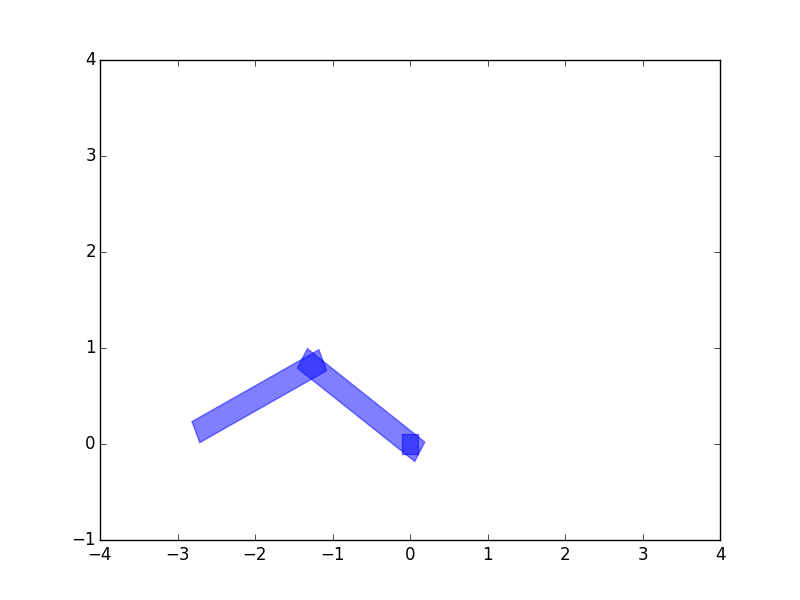
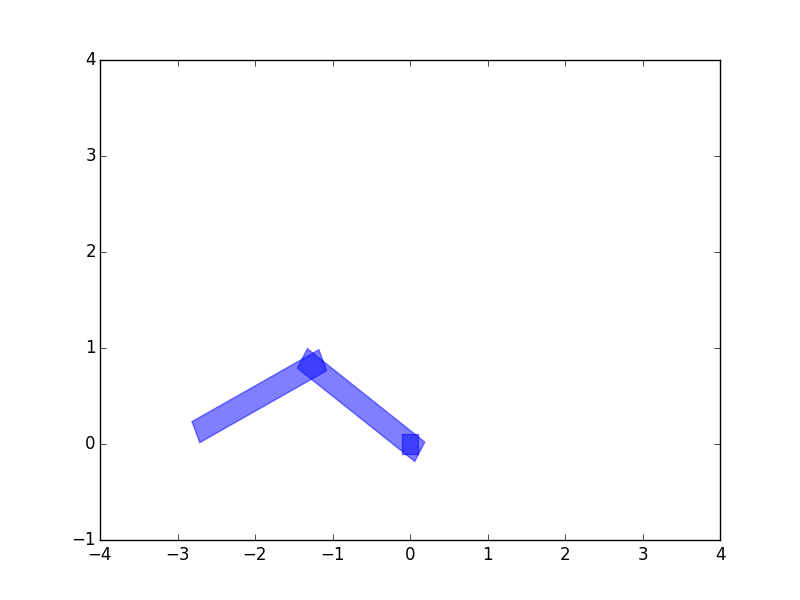
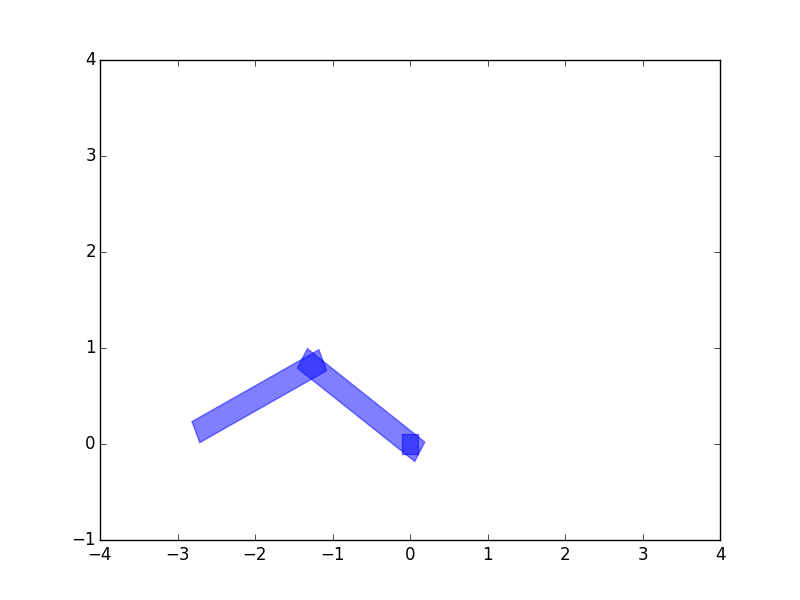
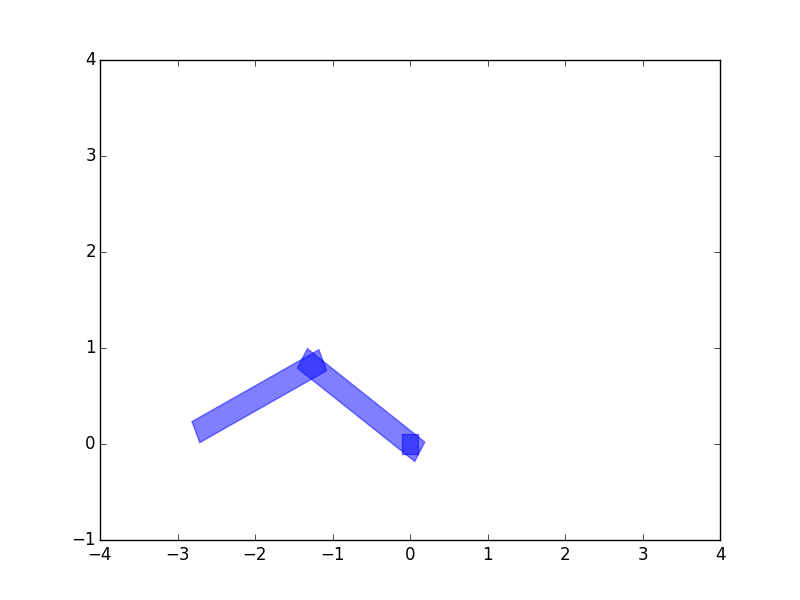
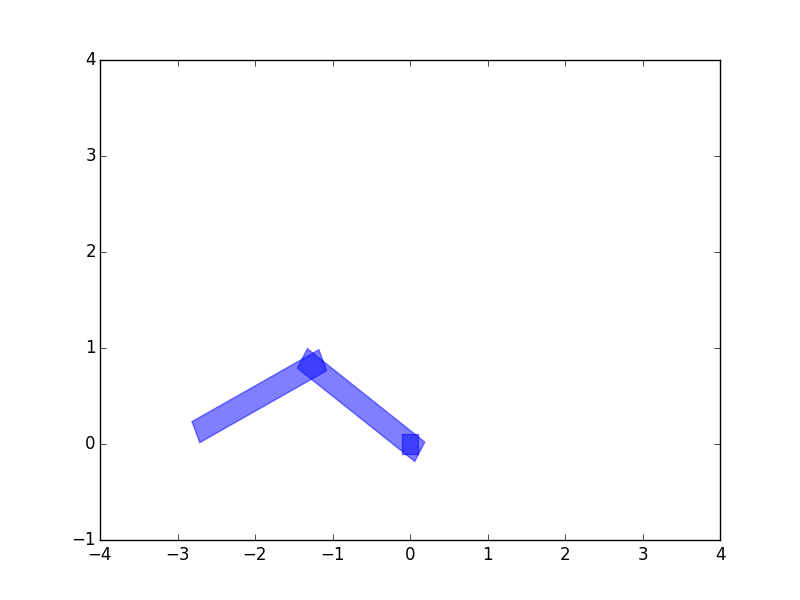
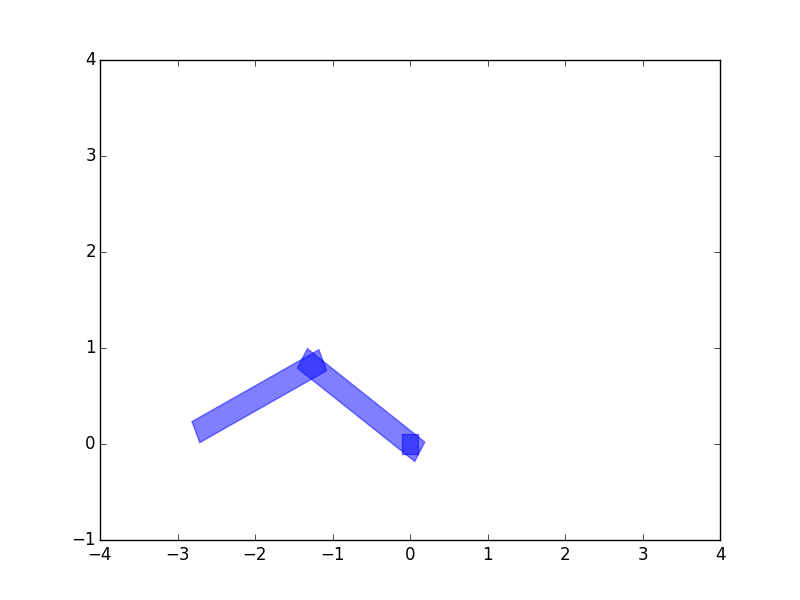
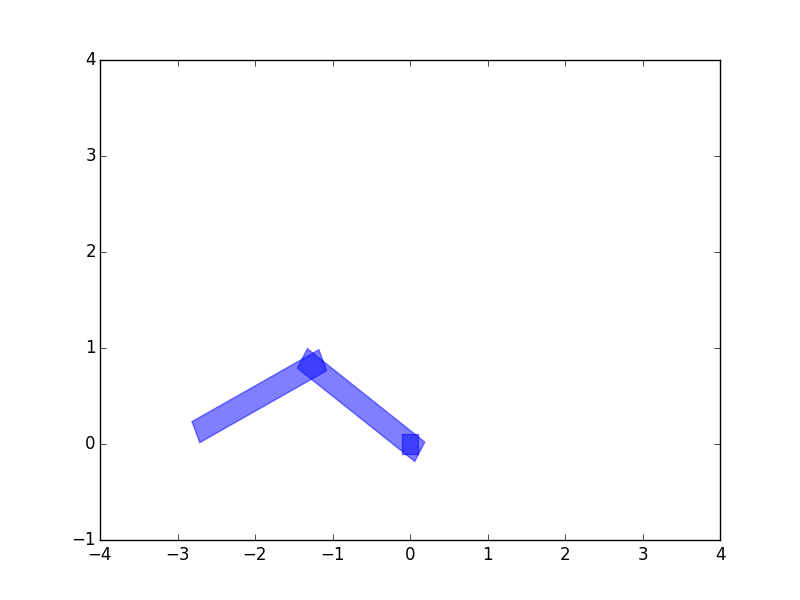
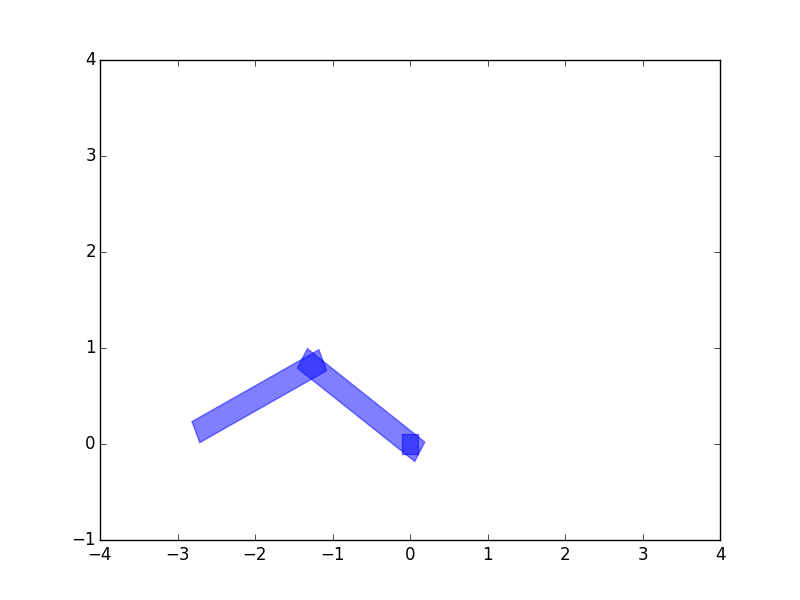
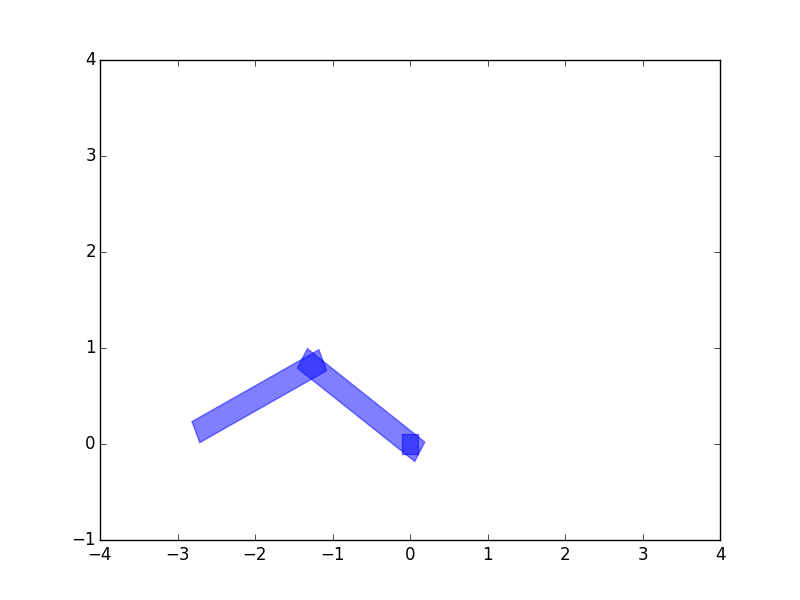
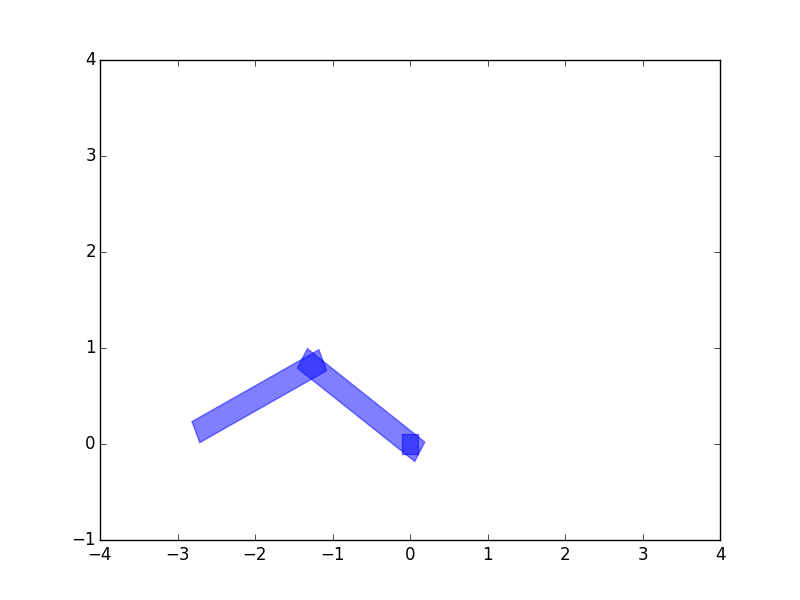
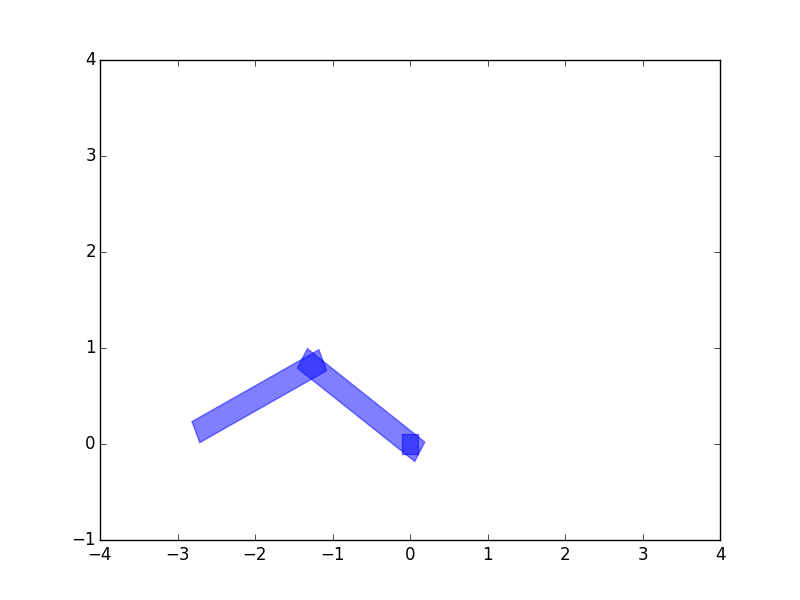
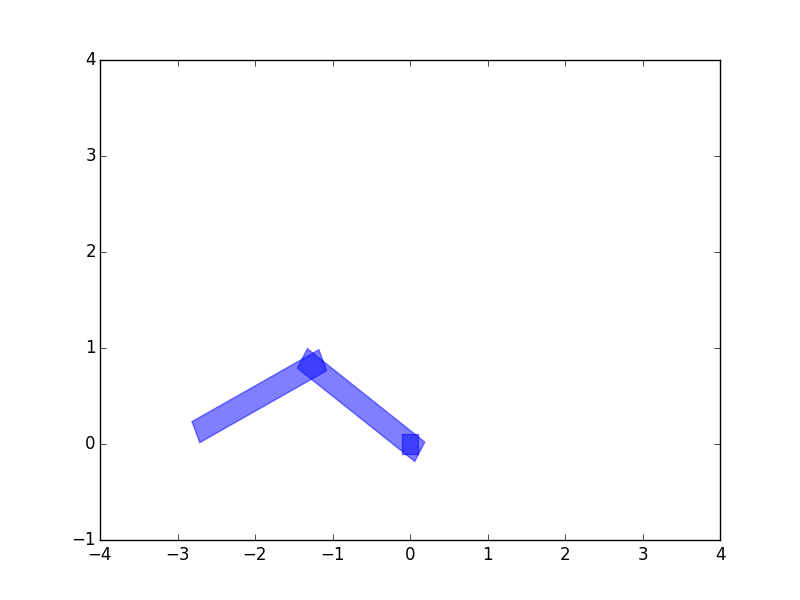
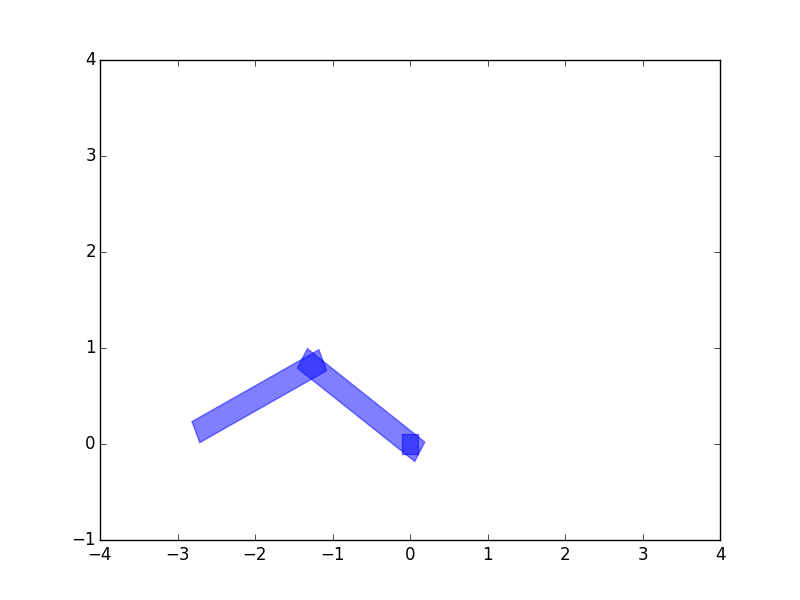
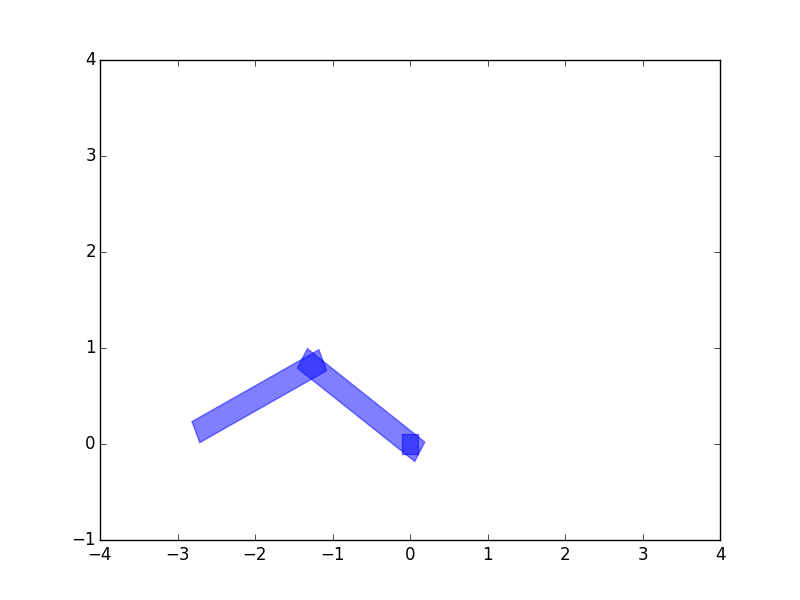
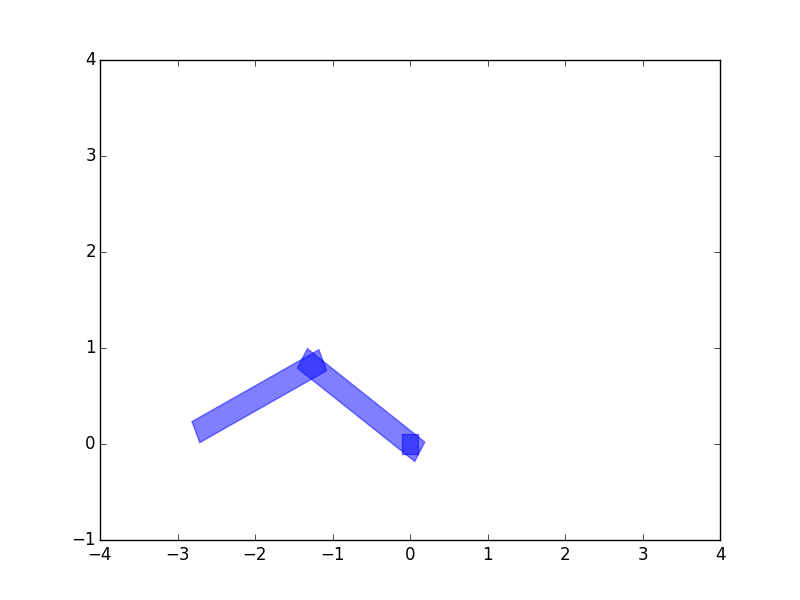
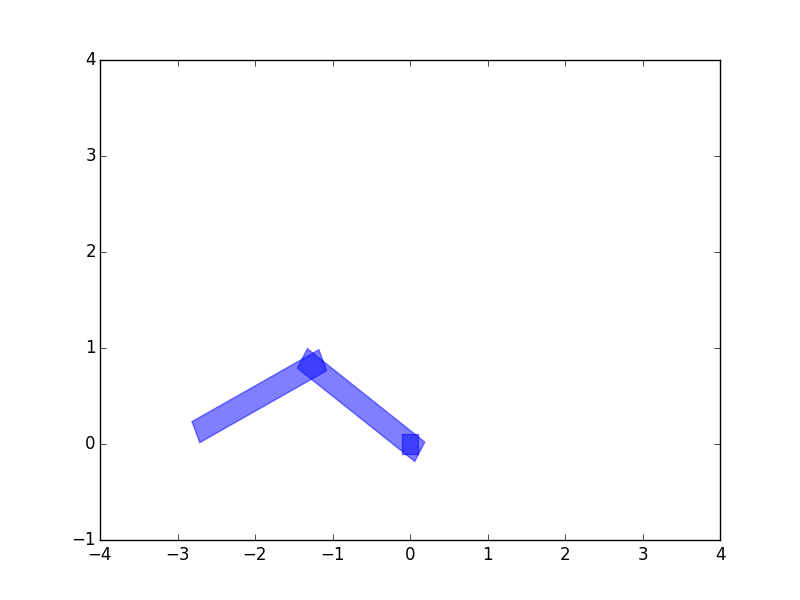
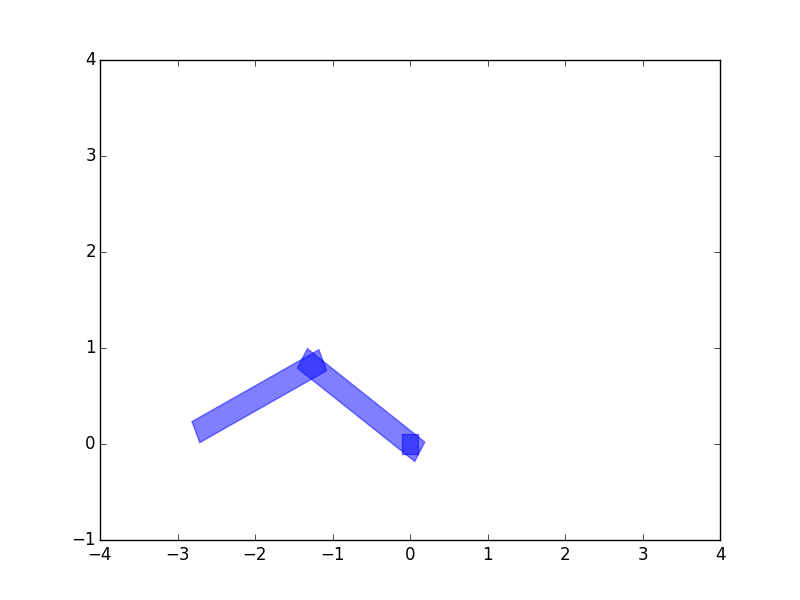
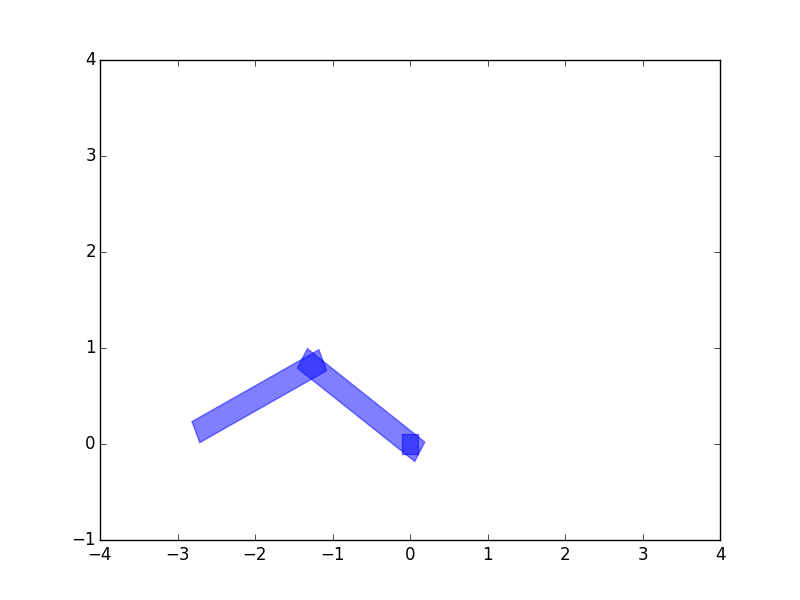
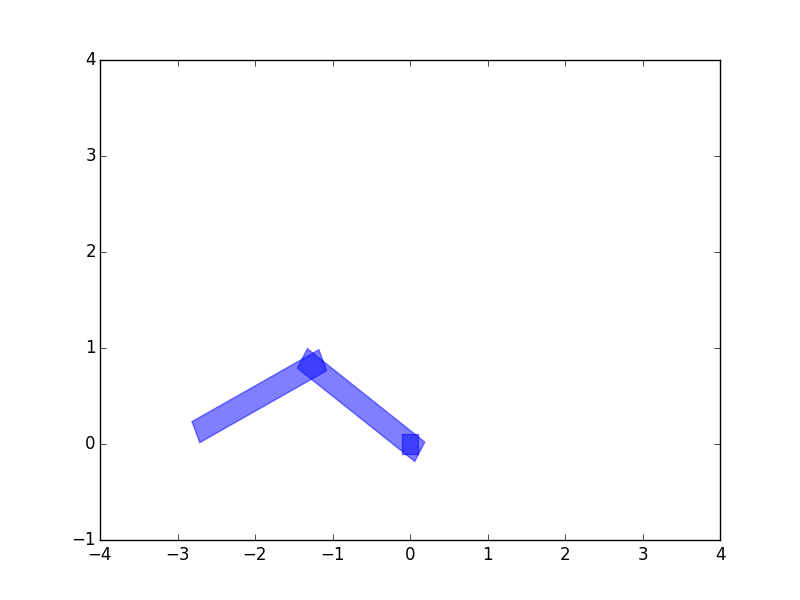
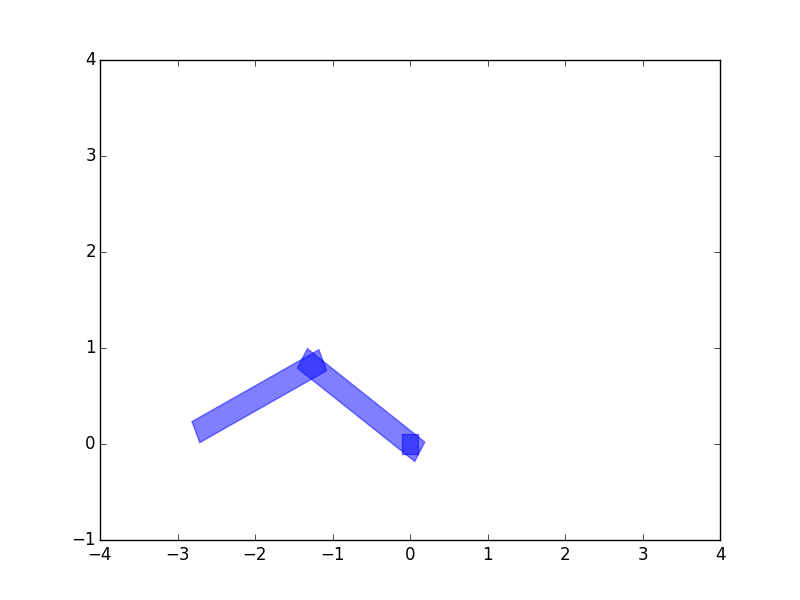
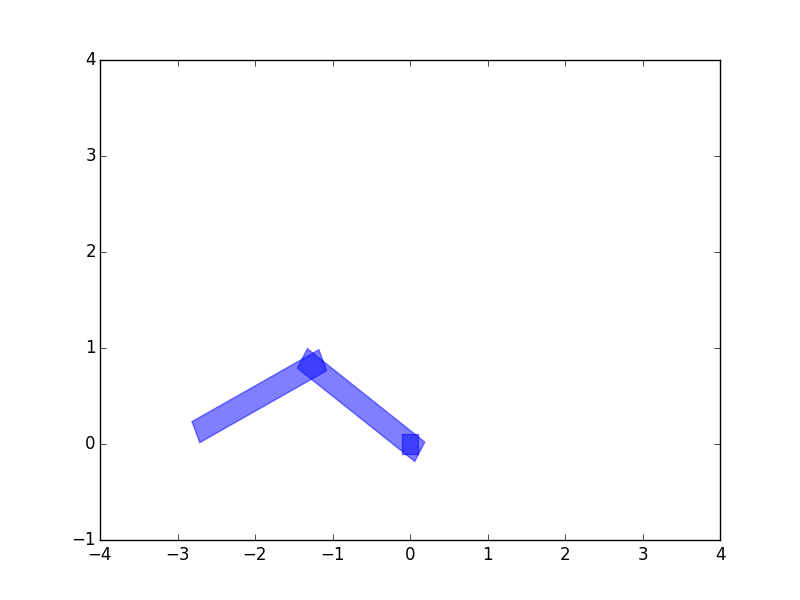
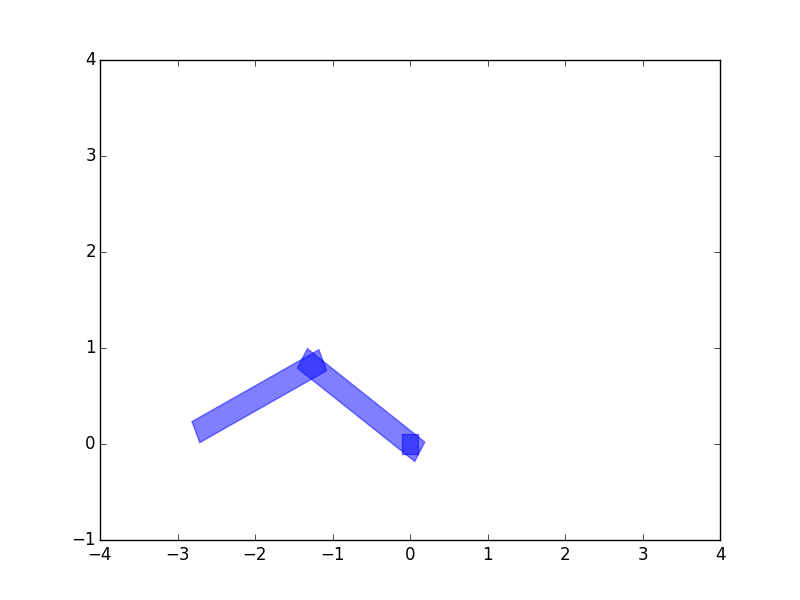
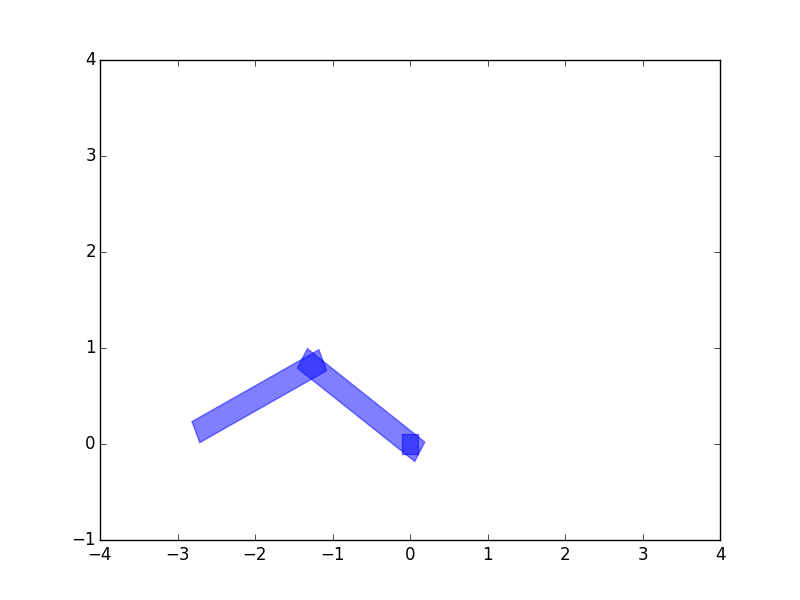
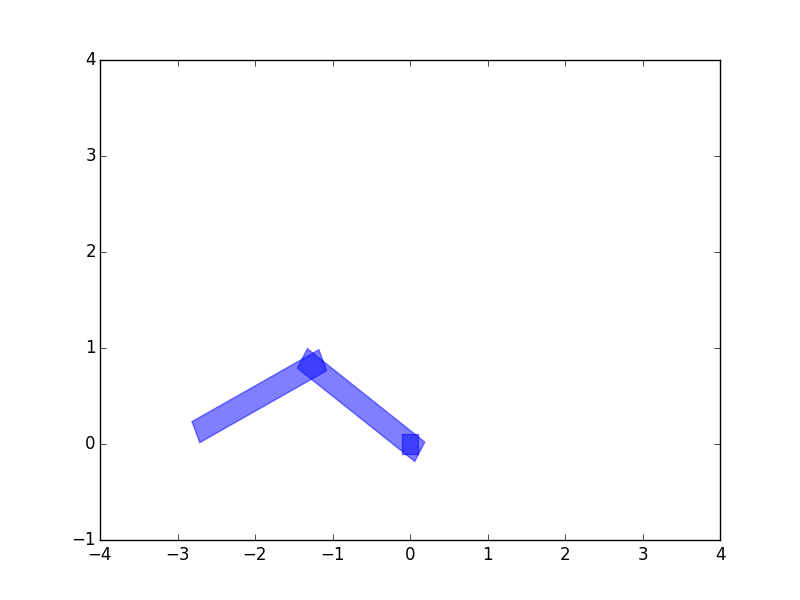
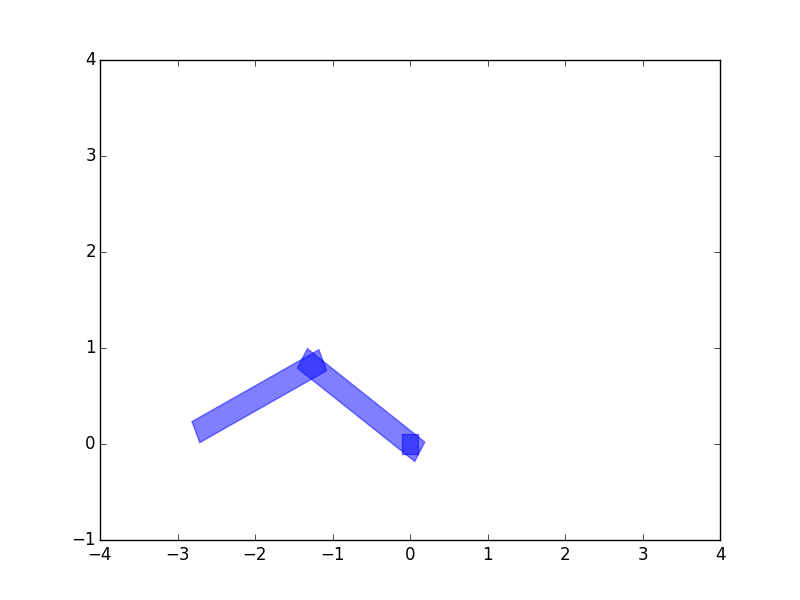
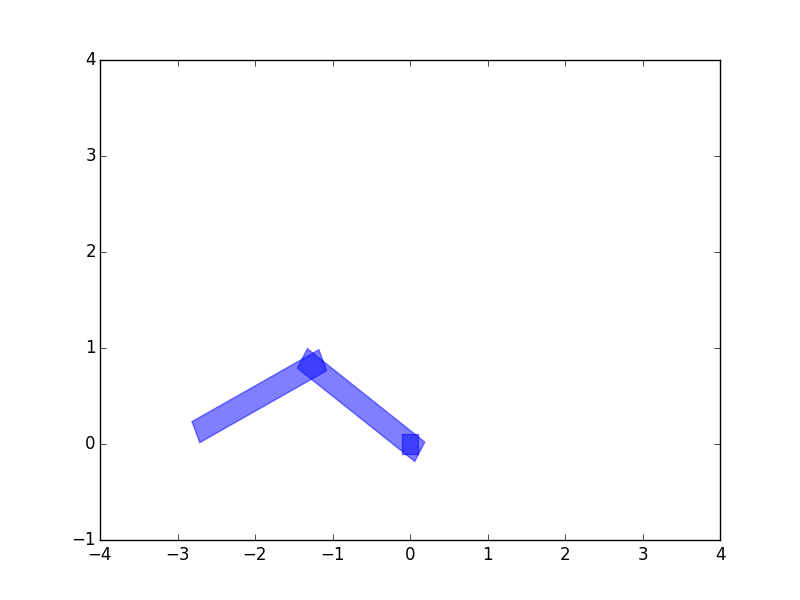
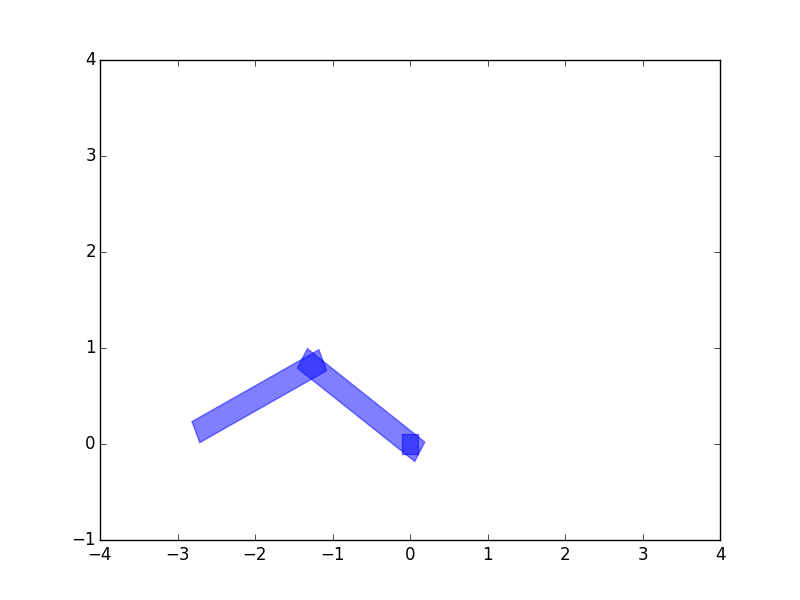

In [3]:
t = [1,1]
Box2DWorld.arm.setTargetJoints(t)
anim = Box2DWorld.animateWorld()
display_animation(anim)

In [4]:
Box2DWorld.arm.gotoTargetJoints([1,1])
print Box2DWorld.arm.getJointAngles()
print Box2DWorld.arm.getFinalPos()

[0.9979600310325623, 0.9603425860404968]
(-2.7881550788879395, 0.18954887986183167)


In [7]:
#t = np.random.rand(nparts)
lwpr_pred = model.predict_conf(np.asarray([-0.1,0.1]))
t = lwpr_pred[0]
print lwpr_pred

#Box2DWorld.arm.gotoTargetJoints(t)

print Box2DWorld.arm.getJointAngles()
print Box2DWorld.arm.getFinalPos()

#Box2DWorld.arm.setTargetJoints(t)
#anim = Box2DWorld.animateWorld()
#display_animation(anim)

(array([-2.46770347,  5.42692765]), array([  3.70472476e+15,   3.38166891e+15]))
[0.9979600310325623, 0.9603425860404968]
(-2.7881550788879395, 0.18954887986183167)


#### Debugging

In [5]:

print Box2DWorld.world.bodies[3].joints[0].joint

b2RevoluteJoint(active=True,
                anchorA=b2Vec2(1,1.5),
                anchorB=b2Vec2(1,1.5),
                angle=0.0,
                bodyA=b2Body(active=True,
                             angle=0.0,
                             angularDamping=1.0,
                             angularVelocity=0.0,
                             awake=True,
                             bullet=False,
                             contacts=[],
                             fixedRotation=False,...  ),
                bodyB=b2Body(active=True,
                             angle=0.0,
                             angularDamping=1.0,
                             angularVelocity=0.0,
                             awake=True,
                             bullet=False,
                             contacts=[],
                             fixedRotation=False,...  ),
                limitEnabled=True,
                limits=(-1.5707499980926514, 1.5707499980926514),
                lowerLimit=-1.5707499

In [5]:
Box2DWorld.lines.set_data([0,1,2],[0,0,0])
plt.ion()
plt.show()

In [6]:
x, y = np.random.rand(2, 30)